In [26]:
import os
from pprint import pprint
import networkx as nx
import matplotlib.pyplot as plt


quads = open('quads.txt', 'r').readlines()
quads = [i.strip().split('\t') for i in quads]

start, end = 0, len(quads)
for idx, i in enumerate(quads):
    if '--All Quads--' in i[0]:
        start=idx
    if '------------------------------------' in i[0]:
        end = idx

quads = quads[start+1:end]



        
        
  
    
blocks = [[]]
next_block = [[]]

functions = {}

skip_f = False


idx = -1
returnto = []
labels = {}
mode="read" #read

# for i in quads:
#     print(i)

function_trig = []
print("\n\nFLow graph")
while idx<len(quads):
    print(idx, quads[idx])
    
    idx+=1
    if idx>=len(quads):
        break
    
    ith_quad = quads[idx]
    
    if 'BeginF' == ith_quad[1]:
        functions[ith_quad[2]] = idx
        skip_f = True
        
    if 'EndF' == ith_quad[1]:
        print("Return to", returnto)
        if skip_f:
            skip_f = False
            continue
        else:
            idx = returnto.pop()
            blocks[-1].append(ith_quad)
            blocks.append([])
            continue
		
        
    if skip_f:
        continue
    
    
    if 'Label' == ith_quad[1]:
        if len(blocks[-1]) != 0:
            blocks.append([])
        labels[ith_quad[-1]] = len(blocks)-1
        
    if 'If False' == ith_quad[1]  or  'goto' == ith_quad[1]:
        blocks[-1].append(ith_quad)
        blocks.append([])
        continue
        
    blocks[-1].append(ith_quad)

    if 'Call' == ith_quad[1]:
        if ith_quad[2] not in function_trig:
            function_trig.append(ith_quad[2])
        else:
            continue
        if len(blocks[-1]) != 0:
            blocks.append([])
        returnto.append(idx)
        
        fname = ith_quad[2]
        blocks[-1].append(quads[functions[fname]])
        idx = functions[fname]
        
shift=0
for idx, block in enumerate(blocks):
    if len(block) == 0:
        blocks.pop(idx-shift)
        shift+=1



FLow graph
-1 ['115', 'Call', 'quick_sort', '3', 'T190']
0 ['0', '=', '1', '-', 'T10']
1 ['1', '-', 'T10', '-', 'T11']
2 ['2', '=', 'T11', '-', 'low']
3 ['-1', '=', '10', '-', 'T14']
4 ['-1', '=', 'T14', '-', 'x']
5 ['-1', '=', '10', '-', 'T17']
6 ['-1', '=', 'T17', '-', 'y']
7 ['7', '=', '1', '-', 'T20']
8 ['8', '-', 'T20', '-', 'T21']
9 ['9', '=', 'T21', '-', 'high']
10 ['10', '=', '1', '-', 'T24']
11 ['11', '-', 'T24', '-', 'T25']
12 ['12', '=', 'T25', '-', 'temp']
13 ['13', '=', '1', '-', 'T28']
14 ['14', '-', 'T28', '-', 'T29']
15 ['15', '=', 'T29', '-', 'temp1']
16 ['-1', '=', '1', '-', 'T32']
17 ['-1', '-', 'T32', '-', 'T33']
18 ['-1', '=', 'T33', '-', 'idx']
19 ['19', '=', '1', '-', 'T36']
20 ['20', '-', 'T36', '-', 'T37']
21 ['21', '=', 'T37', '-', 'start']
22 ['22', '=', '1', '-', 'T40']
23 ['23', '-', 'T40', '-', 'T41']
24 ['24', '=', 'T41', '-', 'end']
25 ['25', 'BeginF', 'quick_sort', '-', '-']
26 ['26', '=', 'low', '-', 'T45']
27 ['27', '=', 'high', '-', 'T46']
28 ['28'

In [27]:
blocks

[[['0', '=', '1', '-', 'T10'],
  ['1', '-', 'T10', '-', 'T11'],
  ['2', '=', 'T11', '-', 'low'],
  ['-1', '=', '10', '-', 'T14'],
  ['-1', '=', 'T14', '-', 'x'],
  ['-1', '=', '10', '-', 'T17'],
  ['-1', '=', 'T17', '-', 'y'],
  ['7', '=', '1', '-', 'T20'],
  ['8', '-', 'T20', '-', 'T21'],
  ['9', '=', 'T21', '-', 'high'],
  ['10', '=', '1', '-', 'T24'],
  ['11', '-', 'T24', '-', 'T25'],
  ['12', '=', 'T25', '-', 'temp'],
  ['13', '=', '1', '-', 'T28'],
  ['14', '-', 'T28', '-', 'T29'],
  ['15', '=', 'T29', '-', 'temp1'],
  ['-1', '=', '1', '-', 'T32'],
  ['-1', '-', 'T32', '-', 'T33'],
  ['-1', '=', 'T33', '-', 'idx'],
  ['19', '=', '1', '-', 'T36'],
  ['20', '-', 'T36', '-', 'T37'],
  ['21', '=', 'T37', '-', 'start'],
  ['22', '=', '1', '-', 'T40'],
  ['23', '-', 'T40', '-', 'T41'],
  ['24', '=', 'T41', '-', 'end'],
  ['112', 'Param', 'array', '-', '-'],
  ['113', 'Param', ' array', '-', '-'],
  ['114', 'Param', ' 0', '-', '-'],
  ['115', 'Call', 'quick_sort', '3', 'T190']],
 [['25',

In [28]:
from pyvis.network import Network
plt.rcParams["figure.figsize"] = (28,28)
import networkx as nx

connections = []
edge = []
edge_labels = []
G = nx.DiGraph()
block_names = []
for idx, i in enumerate(blocks):
    # block_names.append(f"Block {idx}:\n"+'\n'.join([str(j) for j in i]))
    block_names.append(f"Block {idx}")
    G.add_node(block_names[-1])
    
for idx, (b_name, code_) in enumerate(zip(block_names, blocks)):
    if 'goto' in  code_[-1][1]:
        l = code_[-1][-1]
        G.add_edge(block_names[idx], block_names[labels[l]], label="goto")
        edge.append((block_names[idx], block_names[labels[l]]))
        edge_labels.append("goto")
        continue
    
    if 'If False' in code_[-1][1]:
        l = code_[-1][-1]
        G.add_edge(block_names[idx], block_names[labels[l]], label="If False")
        edge.append((block_names[idx], block_names[labels[l]]))
        edge_labels.append("If False")
        
    
    if idx+1<len(block_names):
        G.add_edge(block_names[idx], block_names[idx+1], label="next")
        edge.append((block_names[idx], block_names[idx+1]))
        edge_labels.append("next")




for i, j in zip(block_names, blocks):
    pprint(i)
    print("==============")
    
    
        


'Block 0'
'Block 1'
'Block 2'
'Block 3'
'Block 4'
'Block 5'
'Block 6'
'Block 7'
'Block 8'
'Block 9'
'Block 10'
'Block 11'
'Block 12'
'Block 13'
'Block 14'
'Block 15'
'Block 16'


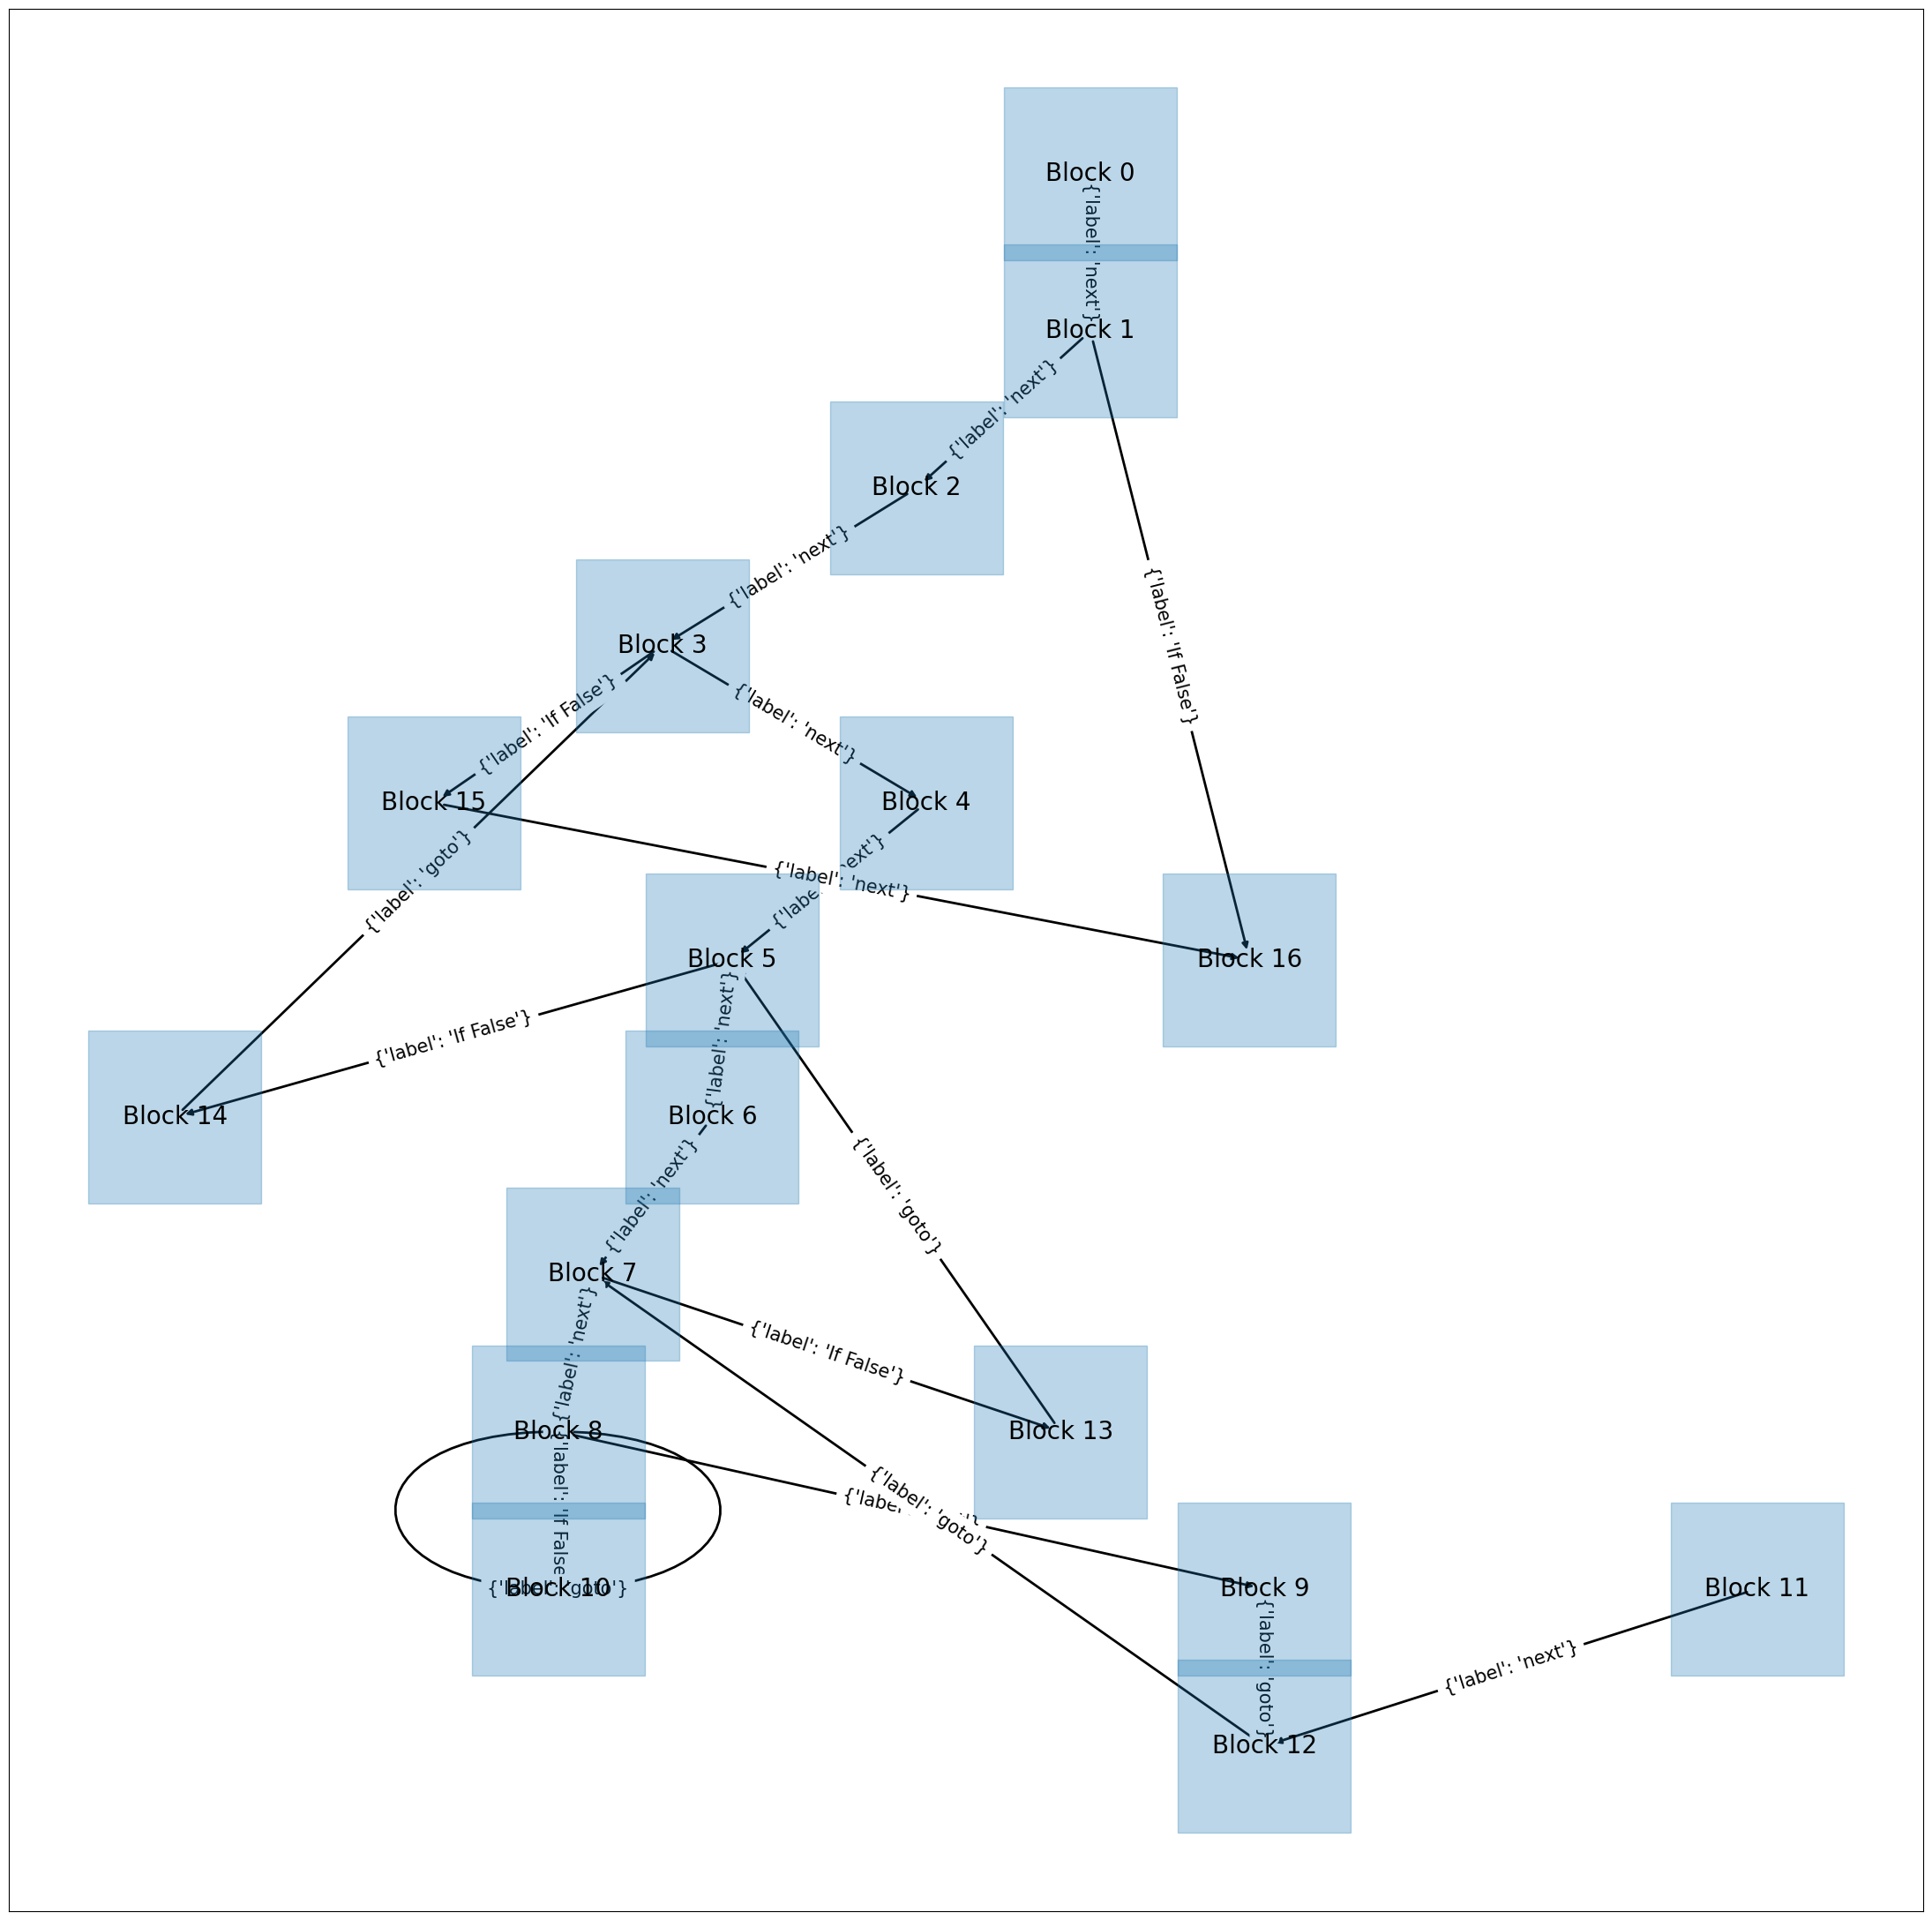

In [29]:
# nx.draw_networkx(G, with_labels=True,  node_shape="s",  node_color="none", bbox=dict(facecolor="skyblue", edgecolor='black', boxstyle='round'), font_size=10, alpha=1, width=2.)
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
nx.draw_networkx_nodes(G, pos, node_size=20000, alpha=0.3,  node_shape="s")
# nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
# nx.draw_networkx_edges(G, pos, width=2)
# nx.draw_networkx_edge_labels(G, pos, font_size=10)

nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_edge_labels(G, pos, font_size=15)


# nx.draw_networkx(G, with_labels=True,  node_shape="s",  node_color="none", bbox=dict(facecolor="skyblue", edgecolor='black', boxstyle='round'), font_size=10, alpha=1, width=2.)
plt.show()

In [30]:
from pyvis.network import Network
plt.rcParams["figure.figsize"] = (20,20)
import networkx as nx

connections = []
edge = []
edge_labels = []
G = nx.DiGraph()
block_names = []
for idx, i in enumerate(blocks):
    block_names.append(f"Block {idx}:\n"+'\n'.join([str(j) for j in i]))
    # block_names.append(f"Block {idx}")
    G.add_node(block_names[-1])
    
for idx, (b_name, code_) in enumerate(zip(block_names, blocks)):
    if 'goto' in  code_[-1][1]:
        l = code_[-1][-1]
        G.add_edge(block_names[idx], block_names[labels[l]], label="goto")
        edge.append((block_names[idx], block_names[labels[l]]))
        edge_labels.append("goto")
        continue
    
    if 'If False' in code_[-1][1]:
        l = code_[-1][-1]
        G.add_edge(block_names[idx], block_names[labels[l]], label="If False")
        edge.append((block_names[idx], block_names[labels[l]]))
        edge_labels.append("If False")
        
    
    if idx+1<len(block_names):
        G.add_edge(block_names[idx], block_names[idx+1], label="next")
        edge.append((block_names[idx], block_names[idx+1]))
        edge_labels.append("next")




for i, j in zip(block_names, blocks):
    pprint(i)
    print("==============")
    
    
        


('Block 0:\n'
 "['0', '=', '1', '-', 'T10']\n"
 "['1', '-', 'T10', '-', 'T11']\n"
 "['2', '=', 'T11', '-', 'low']\n"
 "['-1', '=', '10', '-', 'T14']\n"
 "['-1', '=', 'T14', '-', 'x']\n"
 "['-1', '=', '10', '-', 'T17']\n"
 "['-1', '=', 'T17', '-', 'y']\n"
 "['7', '=', '1', '-', 'T20']\n"
 "['8', '-', 'T20', '-', 'T21']\n"
 "['9', '=', 'T21', '-', 'high']\n"
 "['10', '=', '1', '-', 'T24']\n"
 "['11', '-', 'T24', '-', 'T25']\n"
 "['12', '=', 'T25', '-', 'temp']\n"
 "['13', '=', '1', '-', 'T28']\n"
 "['14', '-', 'T28', '-', 'T29']\n"
 "['15', '=', 'T29', '-', 'temp1']\n"
 "['-1', '=', '1', '-', 'T32']\n"
 "['-1', '-', 'T32', '-', 'T33']\n"
 "['-1', '=', 'T33', '-', 'idx']\n"
 "['19', '=', '1', '-', 'T36']\n"
 "['20', '-', 'T36', '-', 'T37']\n"
 "['21', '=', 'T37', '-', 'start']\n"
 "['22', '=', '1', '-', 'T40']\n"
 "['23', '-', 'T40', '-', 'T41']\n"
 "['24', '=', 'T41', '-', 'end']\n"
 "['112', 'Param', 'array', '-', '-']\n"
 "['113', 'Param', ' array', '-', '-']\n"
 "['114', 'Param', ' 0'

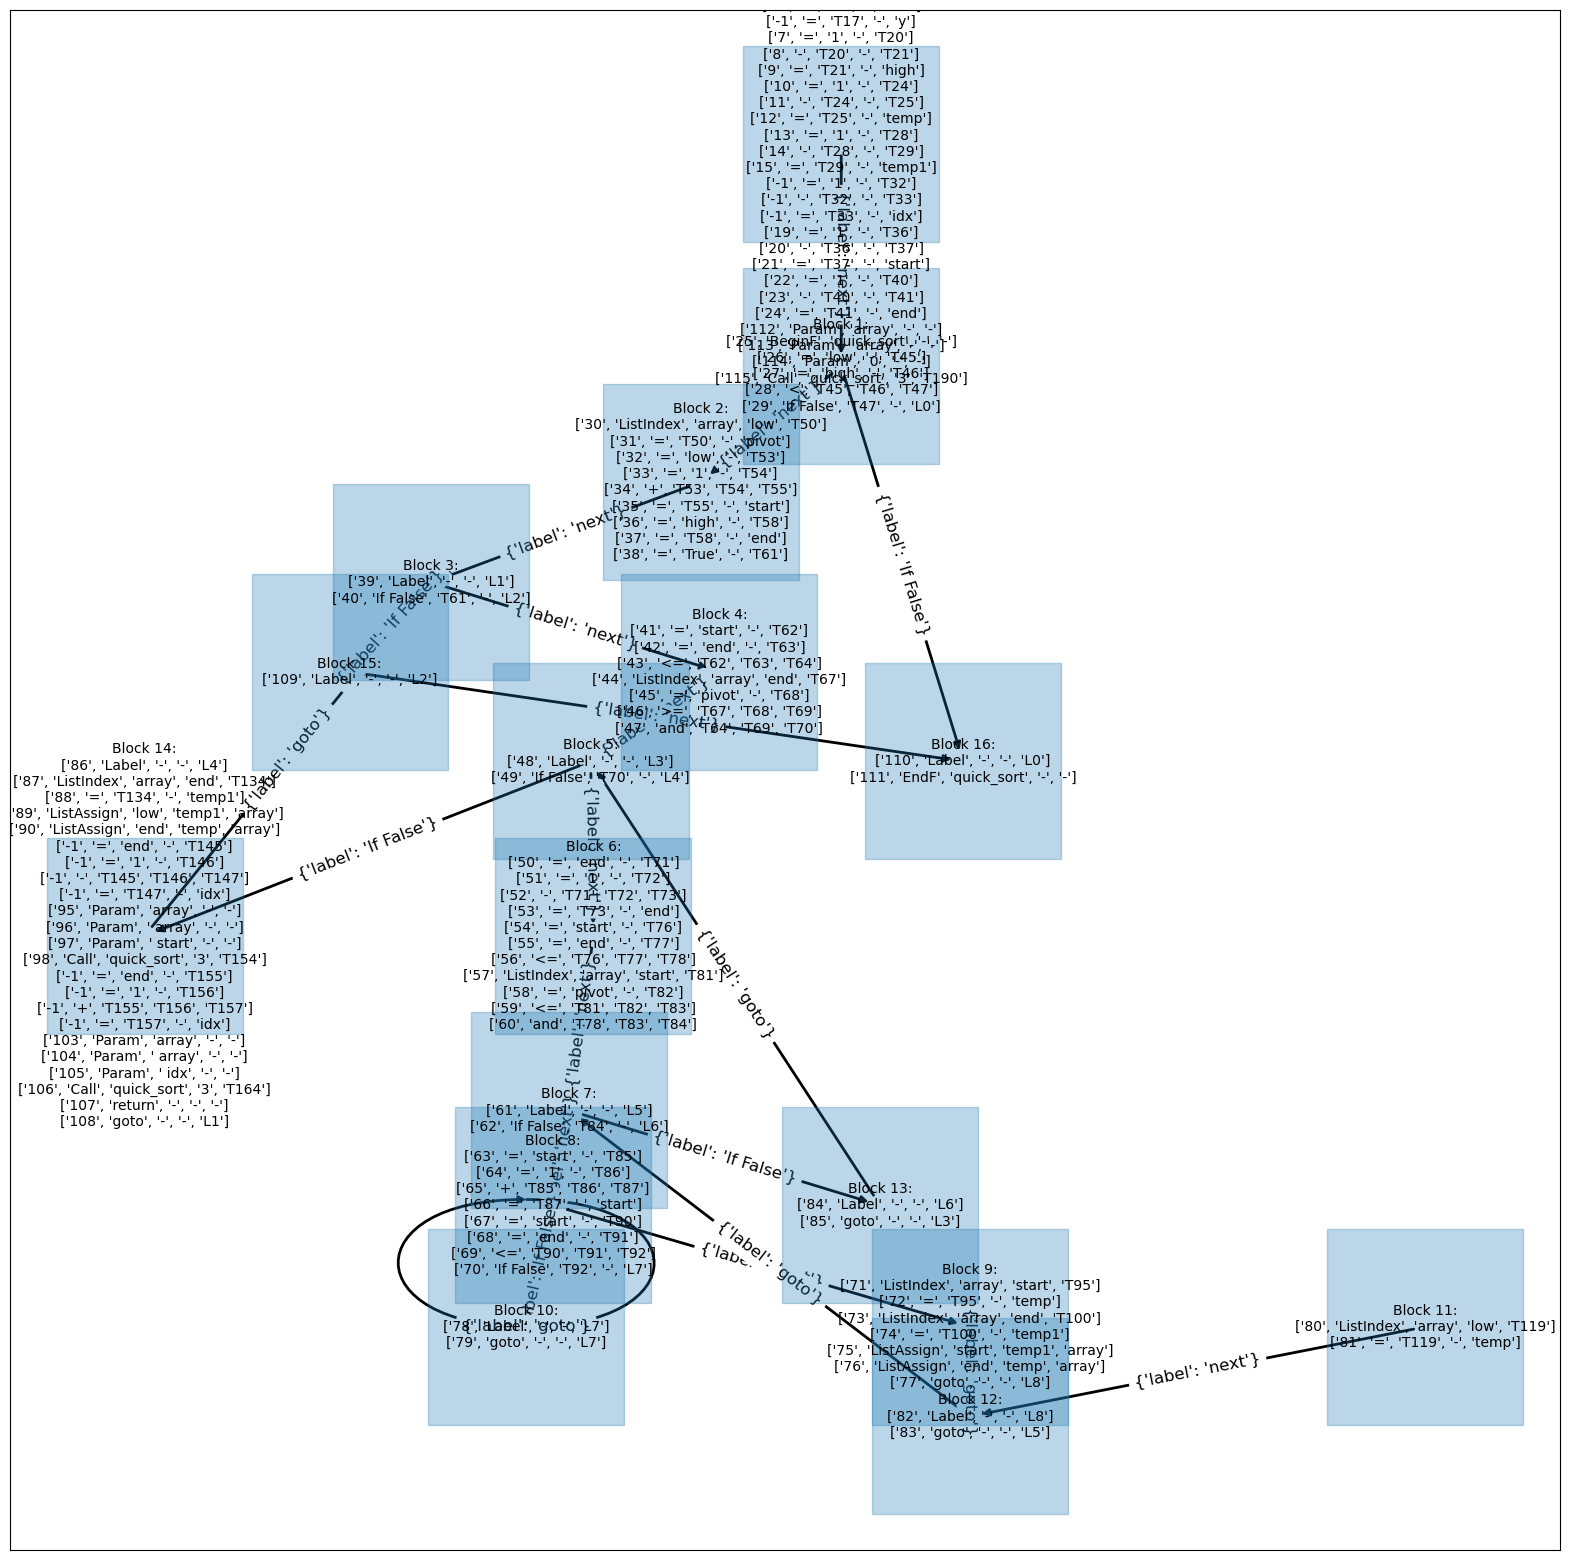

In [31]:
# nx.draw_networkx(G, with_labels=True,  node_shape="s",  node_color="none", bbox=dict(facecolor="skyblue", edgecolor='black', boxstyle='round'), font_size=10, alpha=1, width=2.)
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
nx.draw_networkx_nodes(G, pos, node_size=20000, alpha=0.3,  node_shape="s")
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_edge_labels(G, pos, font_size=12)

# nx.draw_networkx(G, with_labels=True,  node_shape="s",  node_color="none", bbox=dict(facecolor="skyblue", edgecolor='black', boxstyle='round'), font_size=10, alpha=1, width=2.)
plt.show()

In [32]:
class ICG:
    def __init__(self, l) -> None:
        self.l = l
        self.lineno = l[0]
        self.op = l[1]
        l[2:] = [None if i=='-' else (i.strip() if i!=None else None) for i in l[2:]]
        self.op1 = l[2]
        self.op2 = l[3]
        self.result = l[4]
        
    def __repr__(self) -> str:
        return f"{self.l[0]}: {self.op}, {self.op1}, {self.op2}, {self.result}"
        

block1 = [ICG(i) for i in blocks[0]]

In [33]:
blocks

[[['0', '=', '1', None, 'T10'],
  ['1', '-', 'T10', None, 'T11'],
  ['2', '=', 'T11', None, 'low'],
  ['-1', '=', '10', None, 'T14'],
  ['-1', '=', 'T14', None, 'x'],
  ['-1', '=', '10', None, 'T17'],
  ['-1', '=', 'T17', None, 'y'],
  ['7', '=', '1', None, 'T20'],
  ['8', '-', 'T20', None, 'T21'],
  ['9', '=', 'T21', None, 'high'],
  ['10', '=', '1', None, 'T24'],
  ['11', '-', 'T24', None, 'T25'],
  ['12', '=', 'T25', None, 'temp'],
  ['13', '=', '1', None, 'T28'],
  ['14', '-', 'T28', None, 'T29'],
  ['15', '=', 'T29', None, 'temp1'],
  ['-1', '=', '1', None, 'T32'],
  ['-1', '-', 'T32', None, 'T33'],
  ['-1', '=', 'T33', None, 'idx'],
  ['19', '=', '1', None, 'T36'],
  ['20', '-', 'T36', None, 'T37'],
  ['21', '=', 'T37', None, 'start'],
  ['22', '=', '1', None, 'T40'],
  ['23', '-', 'T40', None, 'T41'],
  ['24', '=', 'T41', None, 'end'],
  ['112', 'Param', 'array', None, None],
  ['113', 'Param', 'array', None, None],
  ['114', 'Param', '0', None, None],
  ['115', 'Call', 'quick_s

In [34]:
block1 = [ICG(i) for i in blocks[0]]
block1

[0: =, 1, None, T10,
 1: -, T10, None, T11,
 2: =, T11, None, low,
 -1: =, 10, None, T14,
 -1: =, T14, None, x,
 -1: =, 10, None, T17,
 -1: =, T17, None, y,
 7: =, 1, None, T20,
 8: -, T20, None, T21,
 9: =, T21, None, high,
 10: =, 1, None, T24,
 11: -, T24, None, T25,
 12: =, T25, None, temp,
 13: =, 1, None, T28,
 14: -, T28, None, T29,
 15: =, T29, None, temp1,
 -1: =, 1, None, T32,
 -1: -, T32, None, T33,
 -1: =, T33, None, idx,
 19: =, 1, None, T36,
 20: -, T36, None, T37,
 21: =, T37, None, start,
 22: =, 1, None, T40,
 23: -, T40, None, T41,
 24: =, T41, None, end,
 112: Param, array, None, None,
 113: Param, array, None, None,
 114: Param, 0, None, None,
 115: Call, quick_sort, 3, T190]

['T36', 'T14', 'idx', 'low', 'quick_sort', 'T28', 'T190', 'T11', 'T25', 'T40', 'temp', 'x', 'T41', 'T10', 'T33', 'array', 'temp1', '1', 'y', 'T29', '3', 'T17', 'end', 'T24', 'start', 'T37', '0', 'T32', 'high', 'T21', '10', 'T20']


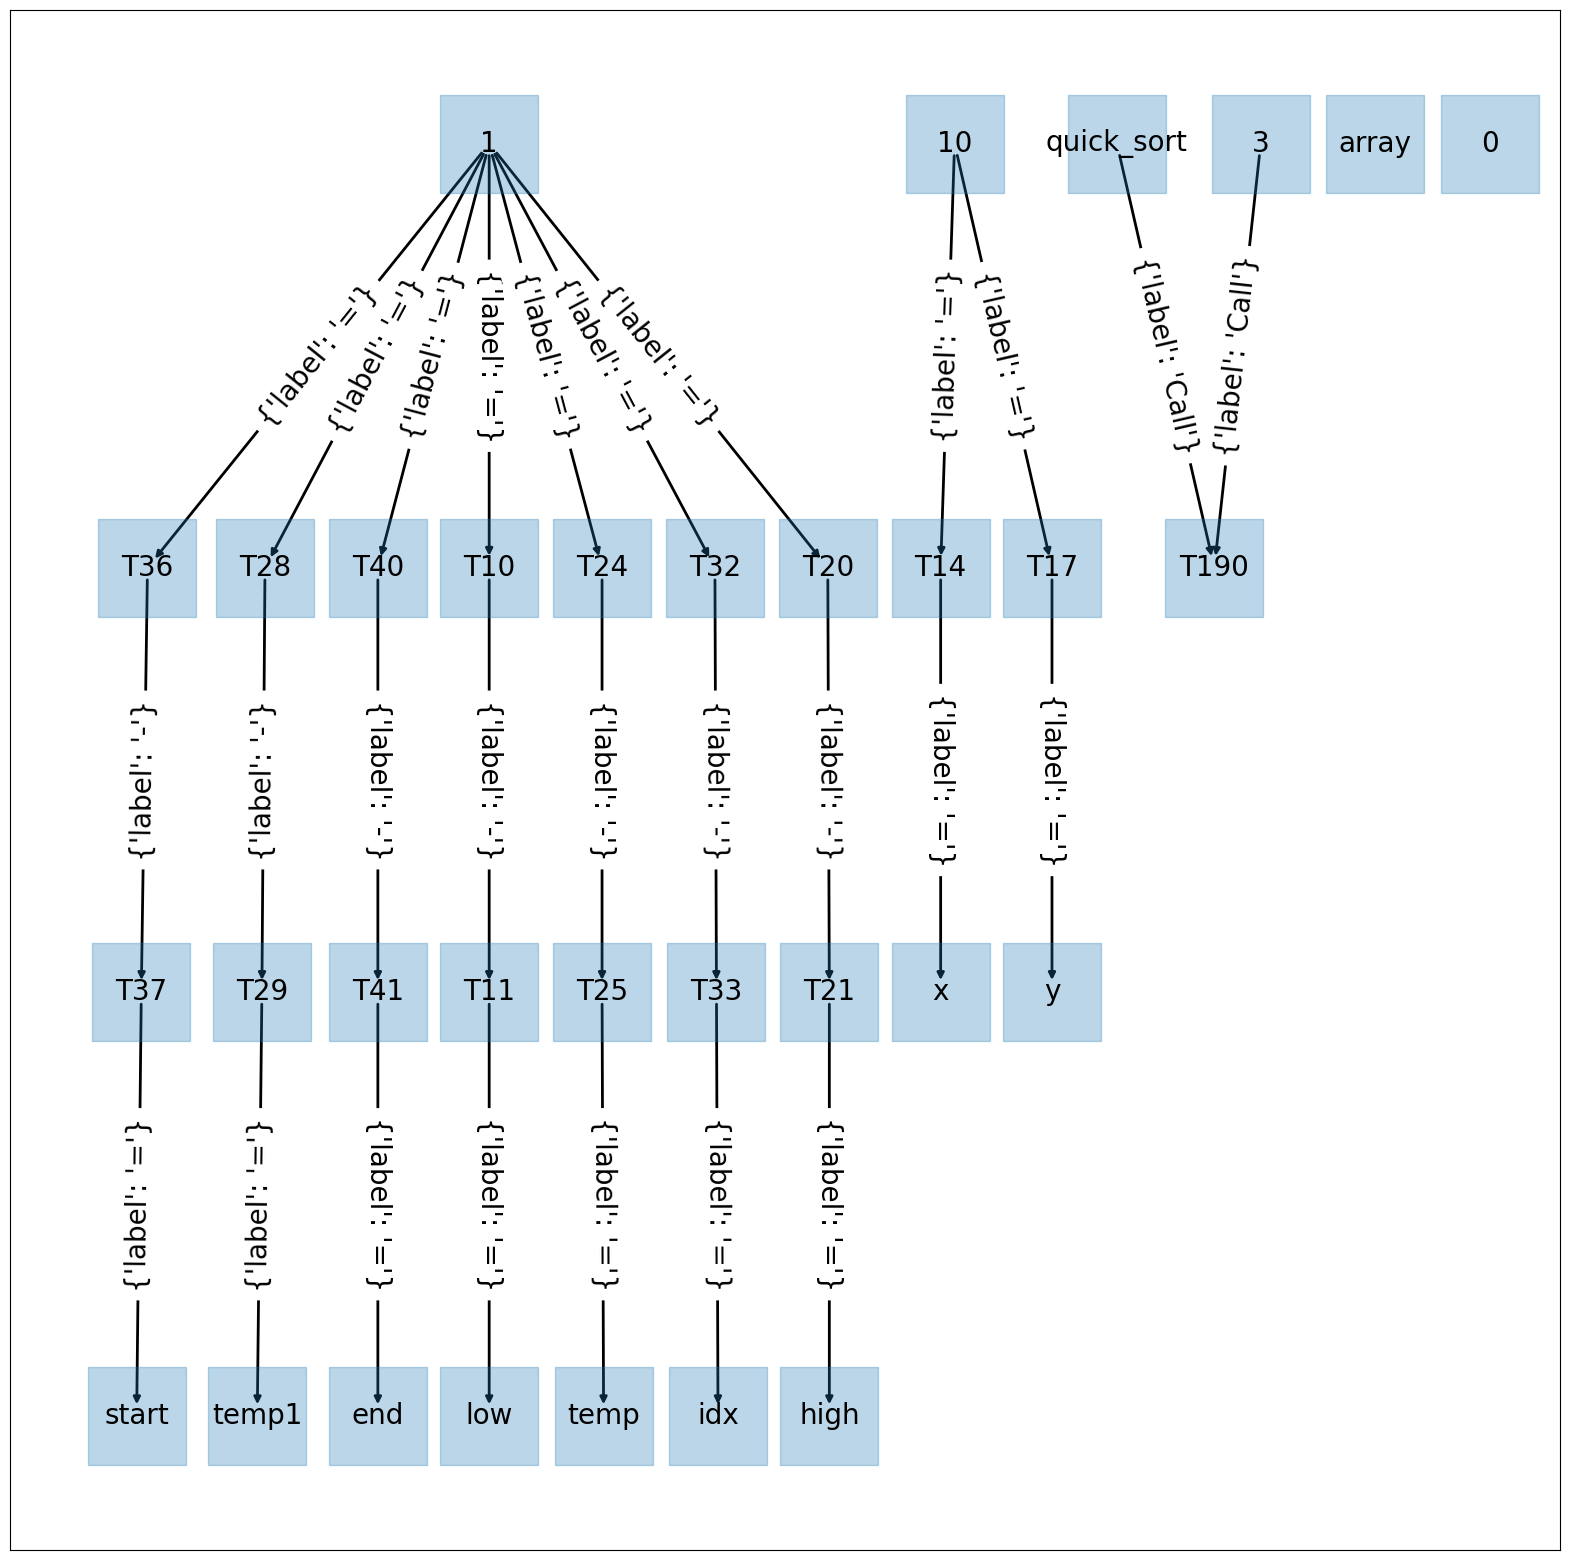

In [35]:

def plot_DAG(block1):
    nodes = []
    for i in block1:
            
        nodes.append(i.op1)
        nodes.append(i.op2)
        nodes.append(i.result)

    nodes = list(set(nodes))
    nodes.remove(None)
    print(nodes)

    G = nx.DiGraph()

    for i in nodes:
        G.add_node(i)

    for i in block1:
        if i.result:
            
            if i.op == "goto":
                G.add_edge(i.result, i.result, label=i.op)
                continue
            
            if i.op1:
                G.add_edge(i.op1, i.result, label=i.op)
            if i.op2:
                G.add_edge(i.op2, i.result, label=i.op)
                
        elif i.op == 'Print':
            G.add_edge(i.op1, i.op, label=i.op)
            
                
    # nx.draw_networkx(G, with_labels=True,  node_shape="s",  node_color="none", bbox=dict(facecolor="skyblue", edgecolor='black', boxstyle='round'), font_size=10, alpha=1, width=2.)
    pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
    nx.draw_networkx_nodes(G, pos, node_size=5000, alpha=0.3,  node_shape="s")
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    nx.draw_networkx_edges(G, pos, width=2)
    nx.draw_networkx_edge_labels(G, pos, font_size=20)

    # nx.draw_networkx(G, with_labels=True,  node_shape="s",  node_color="none", bbox=dict(facecolor="skyblue", edgecolor='black', boxstyle='round'), font_size=10, alpha=1, width=2.)
    plt.show()
    
    
plot_DAG(block1)

In [36]:
block1

[0: =, 1, None, T10,
 1: -, T10, None, T11,
 2: =, T11, None, low,
 -1: =, 10, None, T14,
 -1: =, T14, None, x,
 -1: =, 10, None, T17,
 -1: =, T17, None, y,
 7: =, 1, None, T20,
 8: -, T20, None, T21,
 9: =, T21, None, high,
 10: =, 1, None, T24,
 11: -, T24, None, T25,
 12: =, T25, None, temp,
 13: =, 1, None, T28,
 14: -, T28, None, T29,
 15: =, T29, None, temp1,
 -1: =, 1, None, T32,
 -1: -, T32, None, T33,
 -1: =, T33, None, idx,
 19: =, 1, None, T36,
 20: -, T36, None, T37,
 21: =, T37, None, start,
 22: =, 1, None, T40,
 23: -, T40, None, T41,
 24: =, T41, None, end,
 112: Param, array, None, None,
 113: Param, array, None, None,
 114: Param, 0, None, None,
 115: Call, quick_sort, 3, T190]

In [37]:
def check_str(a):
    return (a[0]=='"' and a[-1]=='"') or (a=='True' or a=='False')


def constant_propagation_replace(block1, idx, term, value):
	for i in range(idx, len(block1)):
		if block1[i].op1 == term:
			# print("Replacing", block1[i], "with", value)
			block1[i].op1 = value
		if block1[i].op2 == term:
			# print("Replacing", block1[i], "with", value)
			block1[i].op2 = value
   
		if block1[i].result == term: ## if term is result of any operation, then stop replacing
			break
   
	return block1




def constant_propagation(block1):
	for idx, i in enumerate(block1):
		if i.result !=None:
			if i.op2 == None and i.op1 is not None :
				if i.op1.isdigit() or check_str(i.op1):
					block1 = constant_propagation_replace(block1, idx+1, i.result, i.op1)
					continue

			elif i.op1 == None and i.op2 is not None:
				if i.op2.isdigit() or check_str(i.op2):
					block1 = constant_propagation_replace(block1, idx+1, i.result, i.op1)
					continue
	
			elif i.op1 == None and i.op2 == None:
				continue
	return block1



def constant_folding(block1):
	for idx, i in enumerate(block1):
		if i.op1 != None and i.op2 != None:
			if (i.op1.isdigit() or check_str(i.op1)) and (i.op2.isdigit() or check_str(i.op2)):
				# print("Constant folding", i)
				block1[idx] = ICG([i.lineno, "=", str(eval(f"{i.op1} {i.op} {i.op2}")), None, i.result])
    

	return block1


['T36', 'T14', 'idx', 'low', 'quick_sort', 'T28', 'T190', 'T11', 'T25', 'T40', 'temp', 'x', 'T41', 'T10', 'T33', 'array', 'temp1', '1', 'y', 'T29', '3', 'T17', 'end', 'T24', 'start', 'T37', '0', 'T32', 'high', 'T21', '10', 'T20']


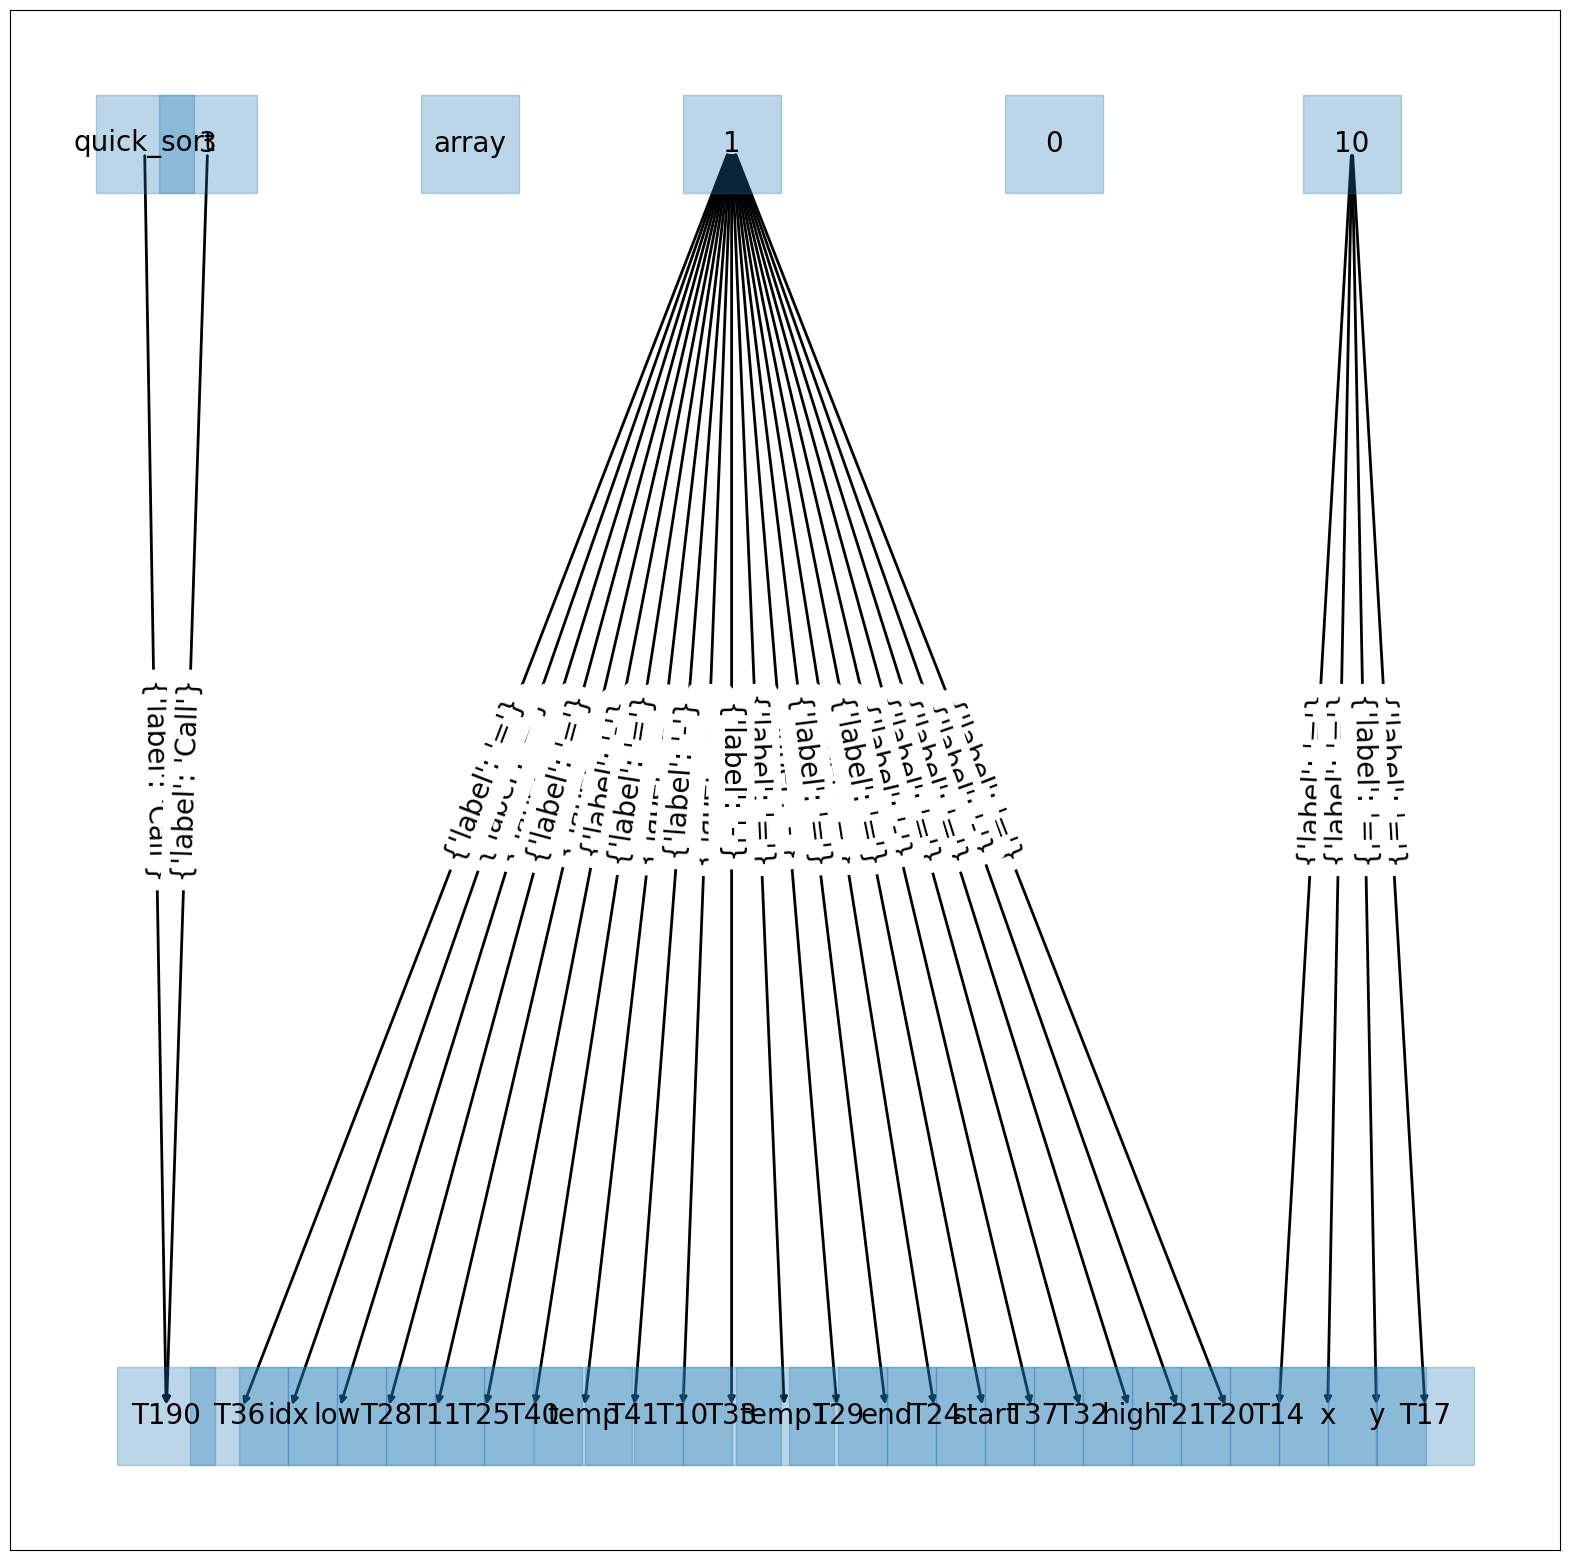

[0: =, 1, None, T10,
 1: -, 1, None, T11,
 2: =, 1, None, low,
 -1: =, 10, None, T14,
 -1: =, 10, None, x,
 -1: =, 10, None, T17,
 -1: =, 10, None, y,
 7: =, 1, None, T20,
 8: -, 1, None, T21,
 9: =, 1, None, high,
 10: =, 1, None, T24,
 11: -, 1, None, T25,
 12: =, 1, None, temp,
 13: =, 1, None, T28,
 14: -, 1, None, T29,
 15: =, 1, None, temp1,
 -1: =, 1, None, T32,
 -1: -, 1, None, T33,
 -1: =, 1, None, idx,
 19: =, 1, None, T36,
 20: -, 1, None, T37,
 21: =, 1, None, start,
 22: =, 1, None, T40,
 23: -, 1, None, T41,
 24: =, 1, None, end,
 112: Param, array, None, None,
 113: Param, array, None, None,
 114: Param, 0, None, None,
 115: Call, quick_sort, 3, T190]
['T36', 'T14', 'idx', 'low', 'quick_sort', 'T28', 'T190', 'T11', 'T25', 'T40', 'temp', 'x', 'T41', 'T10', 'T33', 'array', 'temp1', '1', 'y', 'T29', '3', 'T17', 'end', 'T24', 'start', 'T37', '0', 'T32', 'high', 'T21', '10', 'T20']


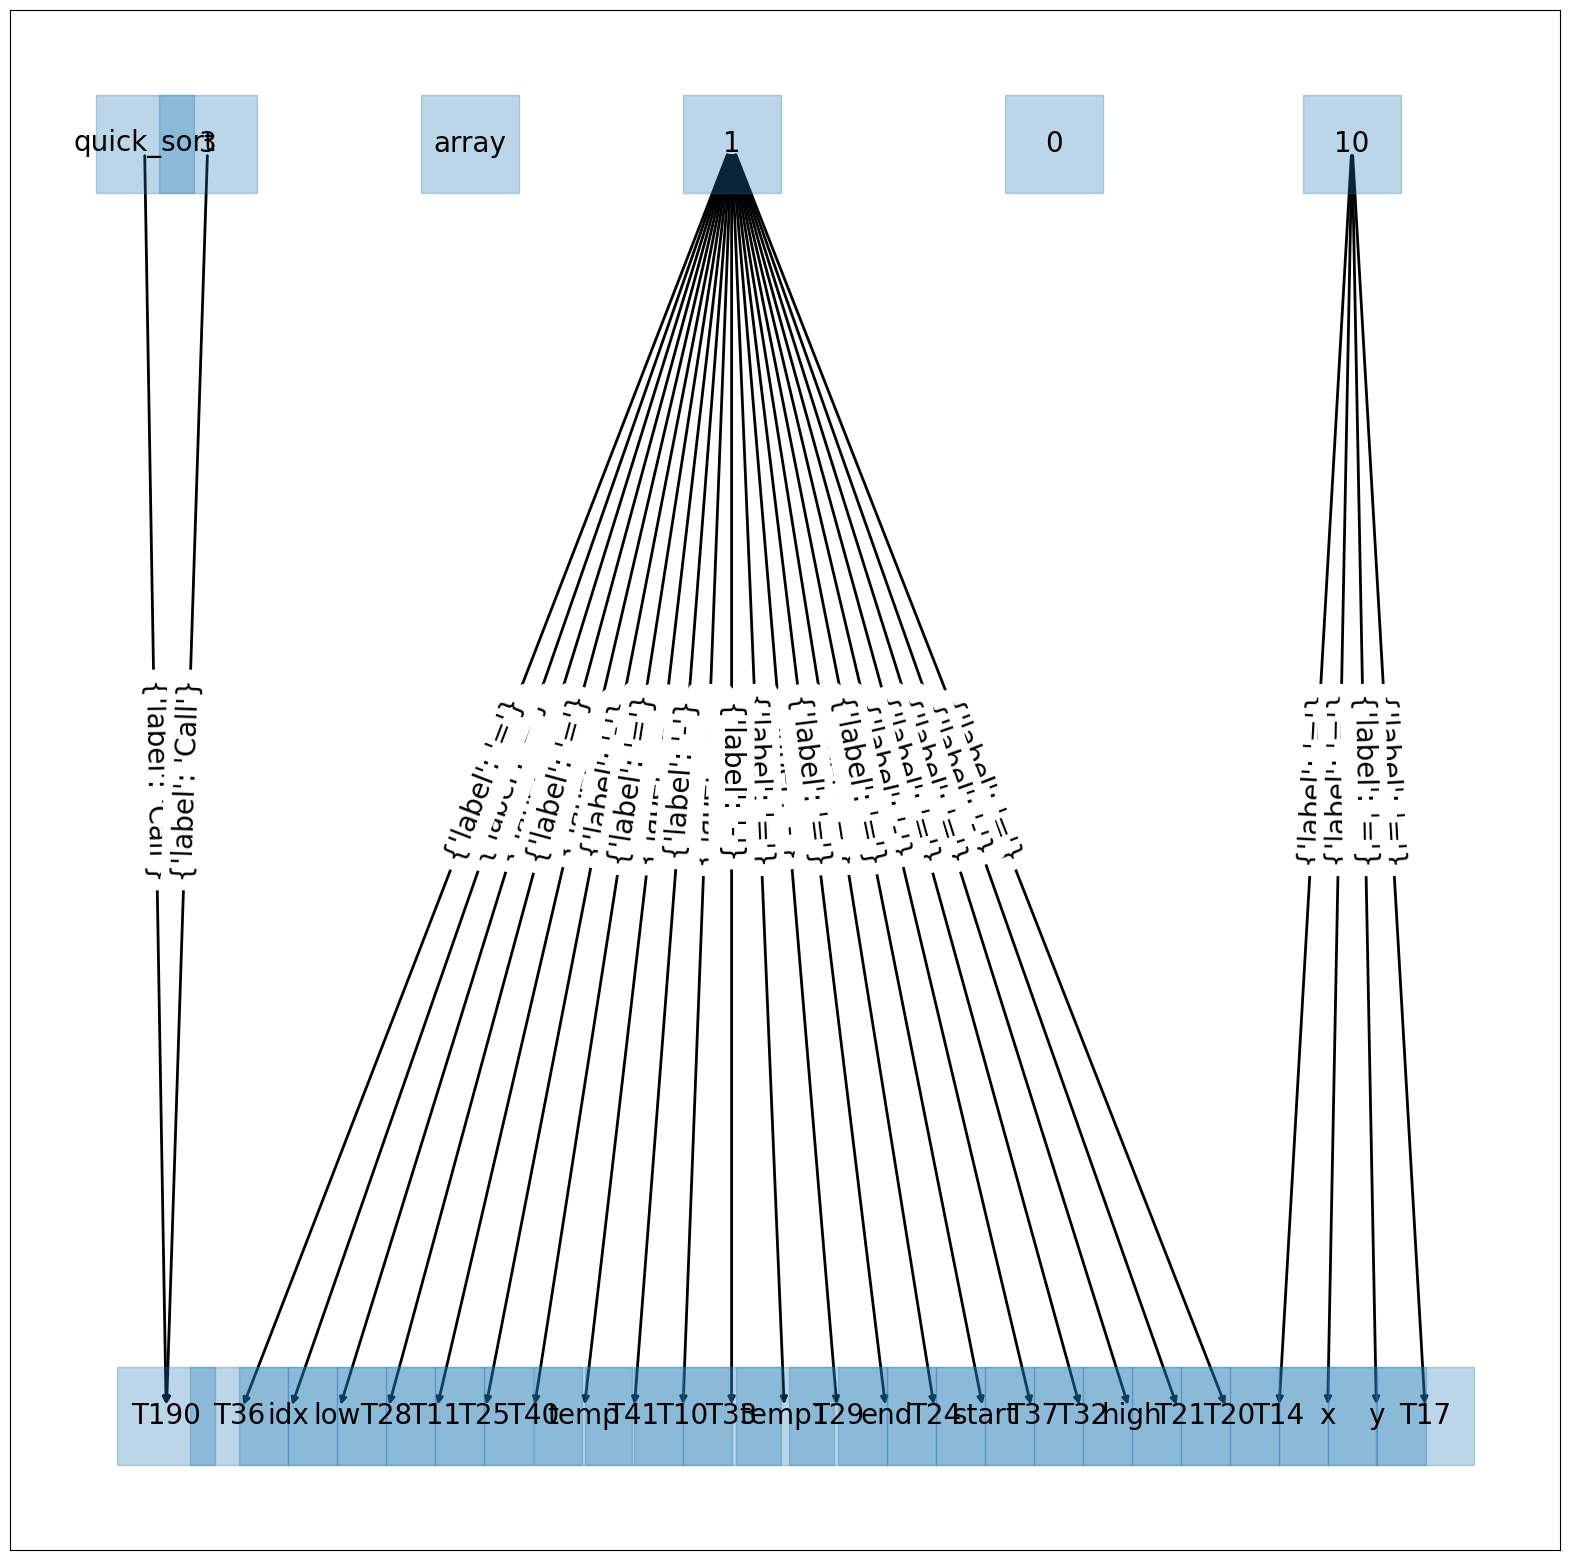

In [38]:
block1 = constant_propagation(block1)
plot_DAG(block1)
block1 = constant_folding(block1)
pprint(block1)
plot_DAG(block1)

[[0: =, 1, None, T10,
  1: -, 1, None, T11,
  2: =, 1, None, low,
  -1: =, 10, None, T14,
  -1: =, 10, None, x,
  -1: =, 10, None, T17,
  -1: =, 10, None, y,
  7: =, 1, None, T20,
  8: -, 1, None, T21,
  9: =, 1, None, high,
  10: =, 1, None, T24,
  11: -, 1, None, T25,
  12: =, 1, None, temp,
  13: =, 1, None, T28,
  14: -, 1, None, T29,
  15: =, 1, None, temp1,
  -1: =, 1, None, T32,
  -1: -, 1, None, T33,
  -1: =, 1, None, idx,
  19: =, 1, None, T36,
  20: -, 1, None, T37,
  21: =, 1, None, start,
  22: =, 1, None, T40,
  23: -, 1, None, T41,
  24: =, 1, None, end,
  112: Param, array, None, None,
  113: Param, array, None, None,
  114: Param, 0, None, None,
  115: Call, quick_sort, 3, T190],
 [25: BeginF, quick_sort, None, None,
  26: =, low, None, T45,
  27: =, high, None, T46,
  28: <, T45, T46, T47,
  29: If False, T47, None, L0],
 [30: ListIndex, array, low, T50,
  31: =, T50, None, pivot,
  32: =, low, None, T53,
  33: =, 1, None, T54,
  34: +, T53, 1, T55,
  35: =, T55, None,

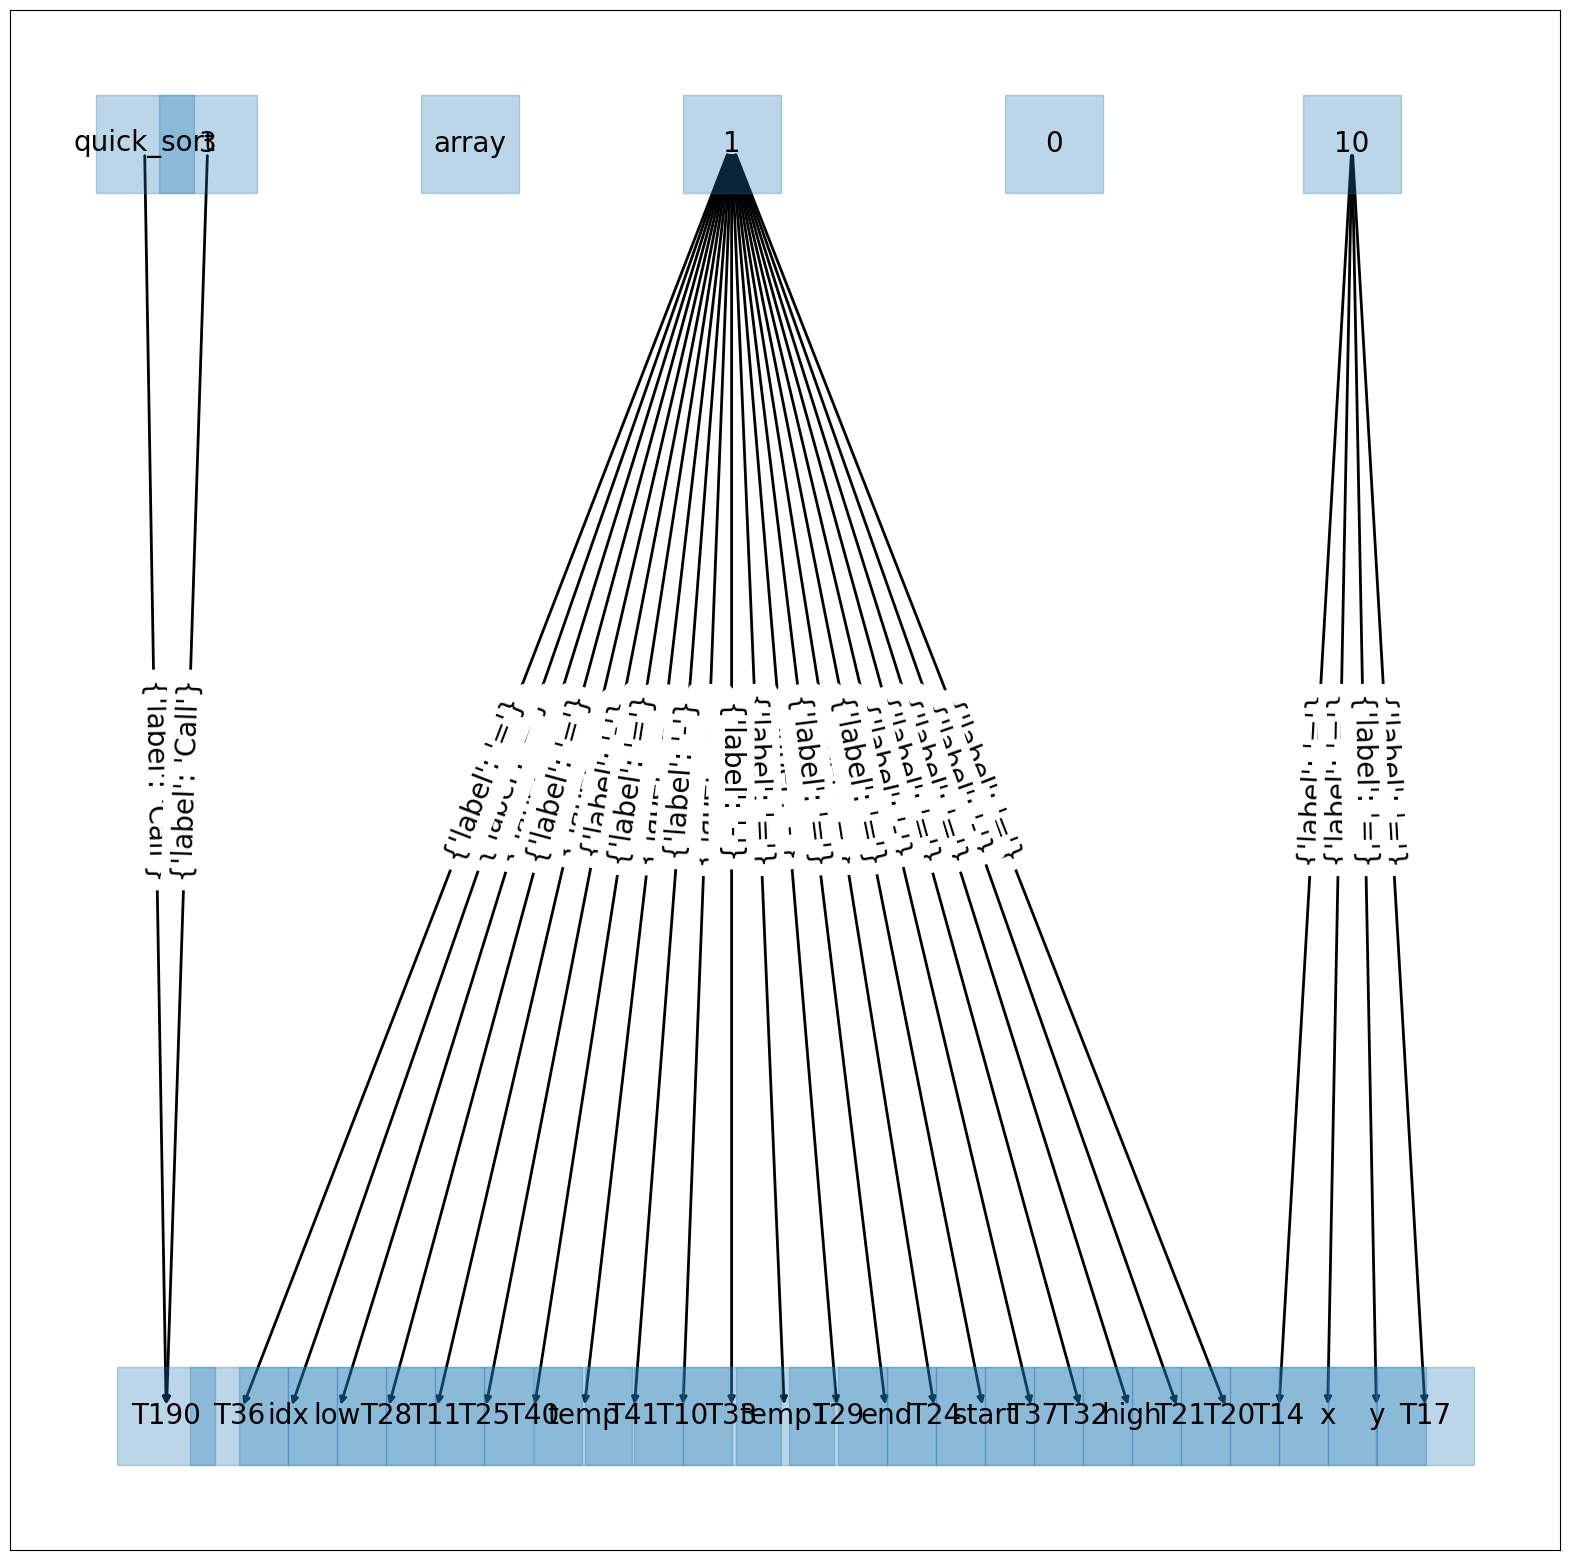

[[0: =, 1, None, T10,
  1: -, 1, None, T11,
  2: =, 1, None, low,
  -1: =, 10, None, T14,
  -1: =, 10, None, x,
  -1: =, 10, None, T17,
  -1: =, 10, None, y,
  7: =, 1, None, T20,
  8: -, 1, None, T21,
  9: =, 1, None, high,
  10: =, 1, None, T24,
  11: -, 1, None, T25,
  12: =, 1, None, temp,
  13: =, 1, None, T28,
  14: -, 1, None, T29,
  15: =, 1, None, temp1,
  -1: =, 1, None, T32,
  -1: -, 1, None, T33,
  -1: =, 1, None, idx,
  19: =, 1, None, T36,
  20: -, 1, None, T37,
  21: =, 1, None, start,
  22: =, 1, None, T40,
  23: -, 1, None, T41,
  24: =, 1, None, end,
  112: Param, array, None, None,
  113: Param, array, None, None,
  114: Param, 0, None, None,
  115: Call, quick_sort, 3, T190],
 [25: BeginF, quick_sort, None, None,
  26: =, low, None, T45,
  27: =, high, None, T46,
  28: <, T45, T46, T47,
  29: If False, T47, None, L0],
 [30: ListIndex, array, low, T50,
  31: =, T50, None, pivot,
  32: =, low, None, T53,
  33: =, 1, None, T54,
  34: +, T53, 1, T55,
  35: =, T55, None,

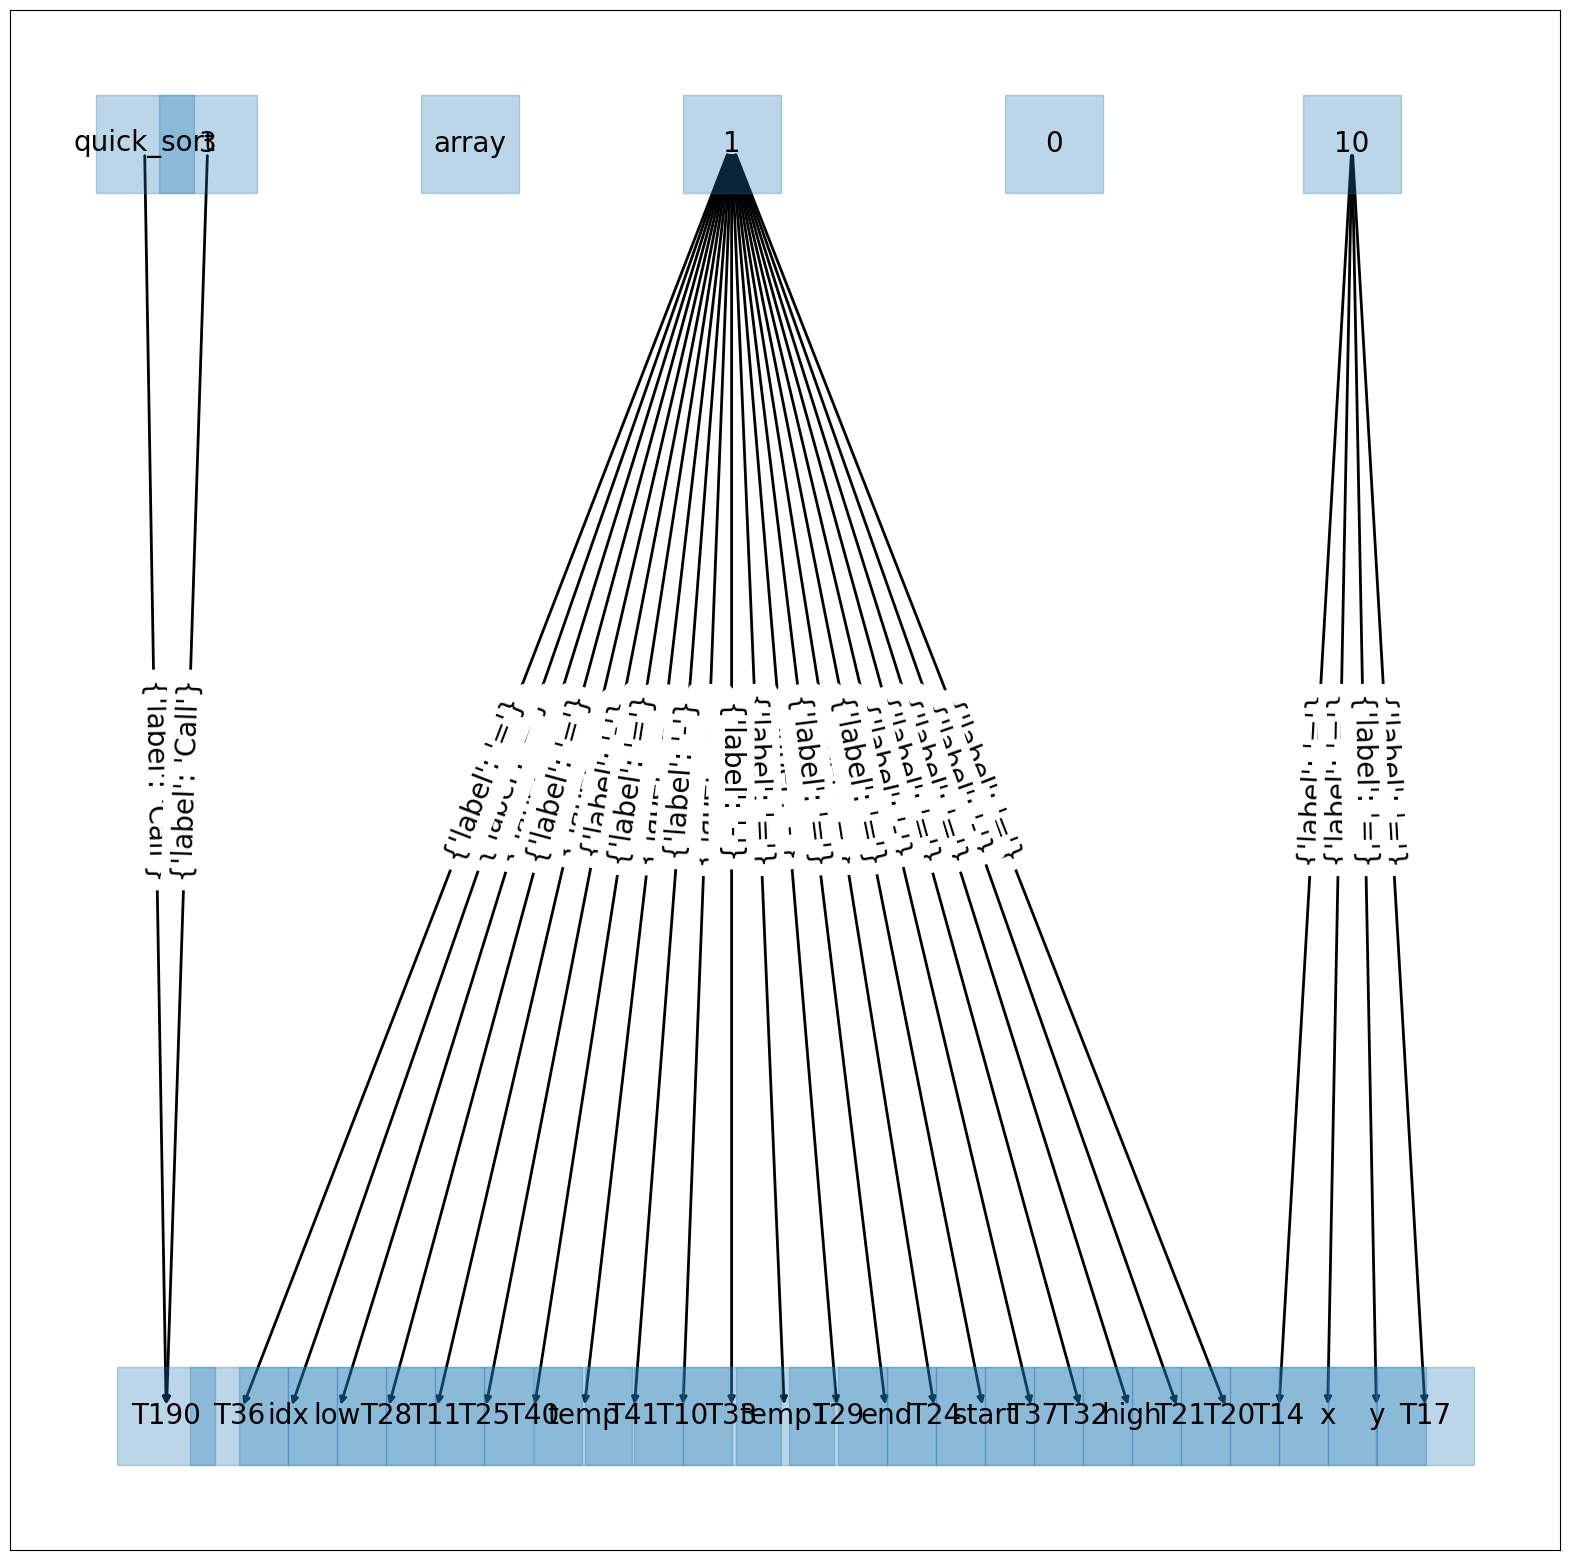

In [39]:
def tot_repr(tot_icg):
	return '\n'.join(['\n'.join([j.__repr__() for j in i]) for i in tot_icg])


tot_icg = []
for i in blocks:
    tot_icg.append([ICG(j) for j in i])
    
from copy import deepcopy
before_copy = deepcopy(tot_icg)
while True:
	for i in range(len(tot_icg)):
		tot_icg[i] = constant_folding(tot_icg[i])
		tot_icg[i] = constant_propagation(tot_icg[i])
	
	pprint(tot_icg)
	plot_DAG(tot_icg[0])
	
	if tot_repr(tot_icg) == tot_repr(before_copy):
		break

	before_copy = deepcopy(tot_icg)

[[0: =, 1, None, T10,
  1: -, 1, None, T11,
  2: =, 1, None, low,
  -1: =, 10, None, T14,
  -1: =, 10, None, x,
  -1: =, 10, None, T17,
  -1: =, 10, None, y,
  7: =, 1, None, T20,
  8: -, 1, None, T21,
  9: =, 1, None, high,
  10: =, 1, None, T24,
  11: -, 1, None, T25,
  12: =, 1, None, temp,
  13: =, 1, None, T28,
  14: -, 1, None, T29,
  15: =, 1, None, temp1,
  -1: =, 1, None, T32,
  -1: -, 1, None, T33,
  -1: =, 1, None, idx,
  19: =, 1, None, T36,
  20: -, 1, None, T37,
  21: =, 1, None, start,
  22: =, 1, None, T40,
  23: -, 1, None, T41,
  24: =, 1, None, end,
  112: Param, array, None, None,
  113: Param, array, None, None,
  114: Param, 0, None, None,
  115: Call, quick_sort, 3, T190],
 [25: BeginF, quick_sort, None, None,
  26: =, low, None, T45,
  27: =, high, None, T46,
  28: <, T45, T46, T47,
  29: If False, T47, None, L0],
 [30: ListIndex, array, low, T50,
  31: =, T50, None, pivot,
  32: =, low, None, T53,
  33: =, 1, None, T54,
  34: +, T53, 1, T55,
  35: =, T55, None,

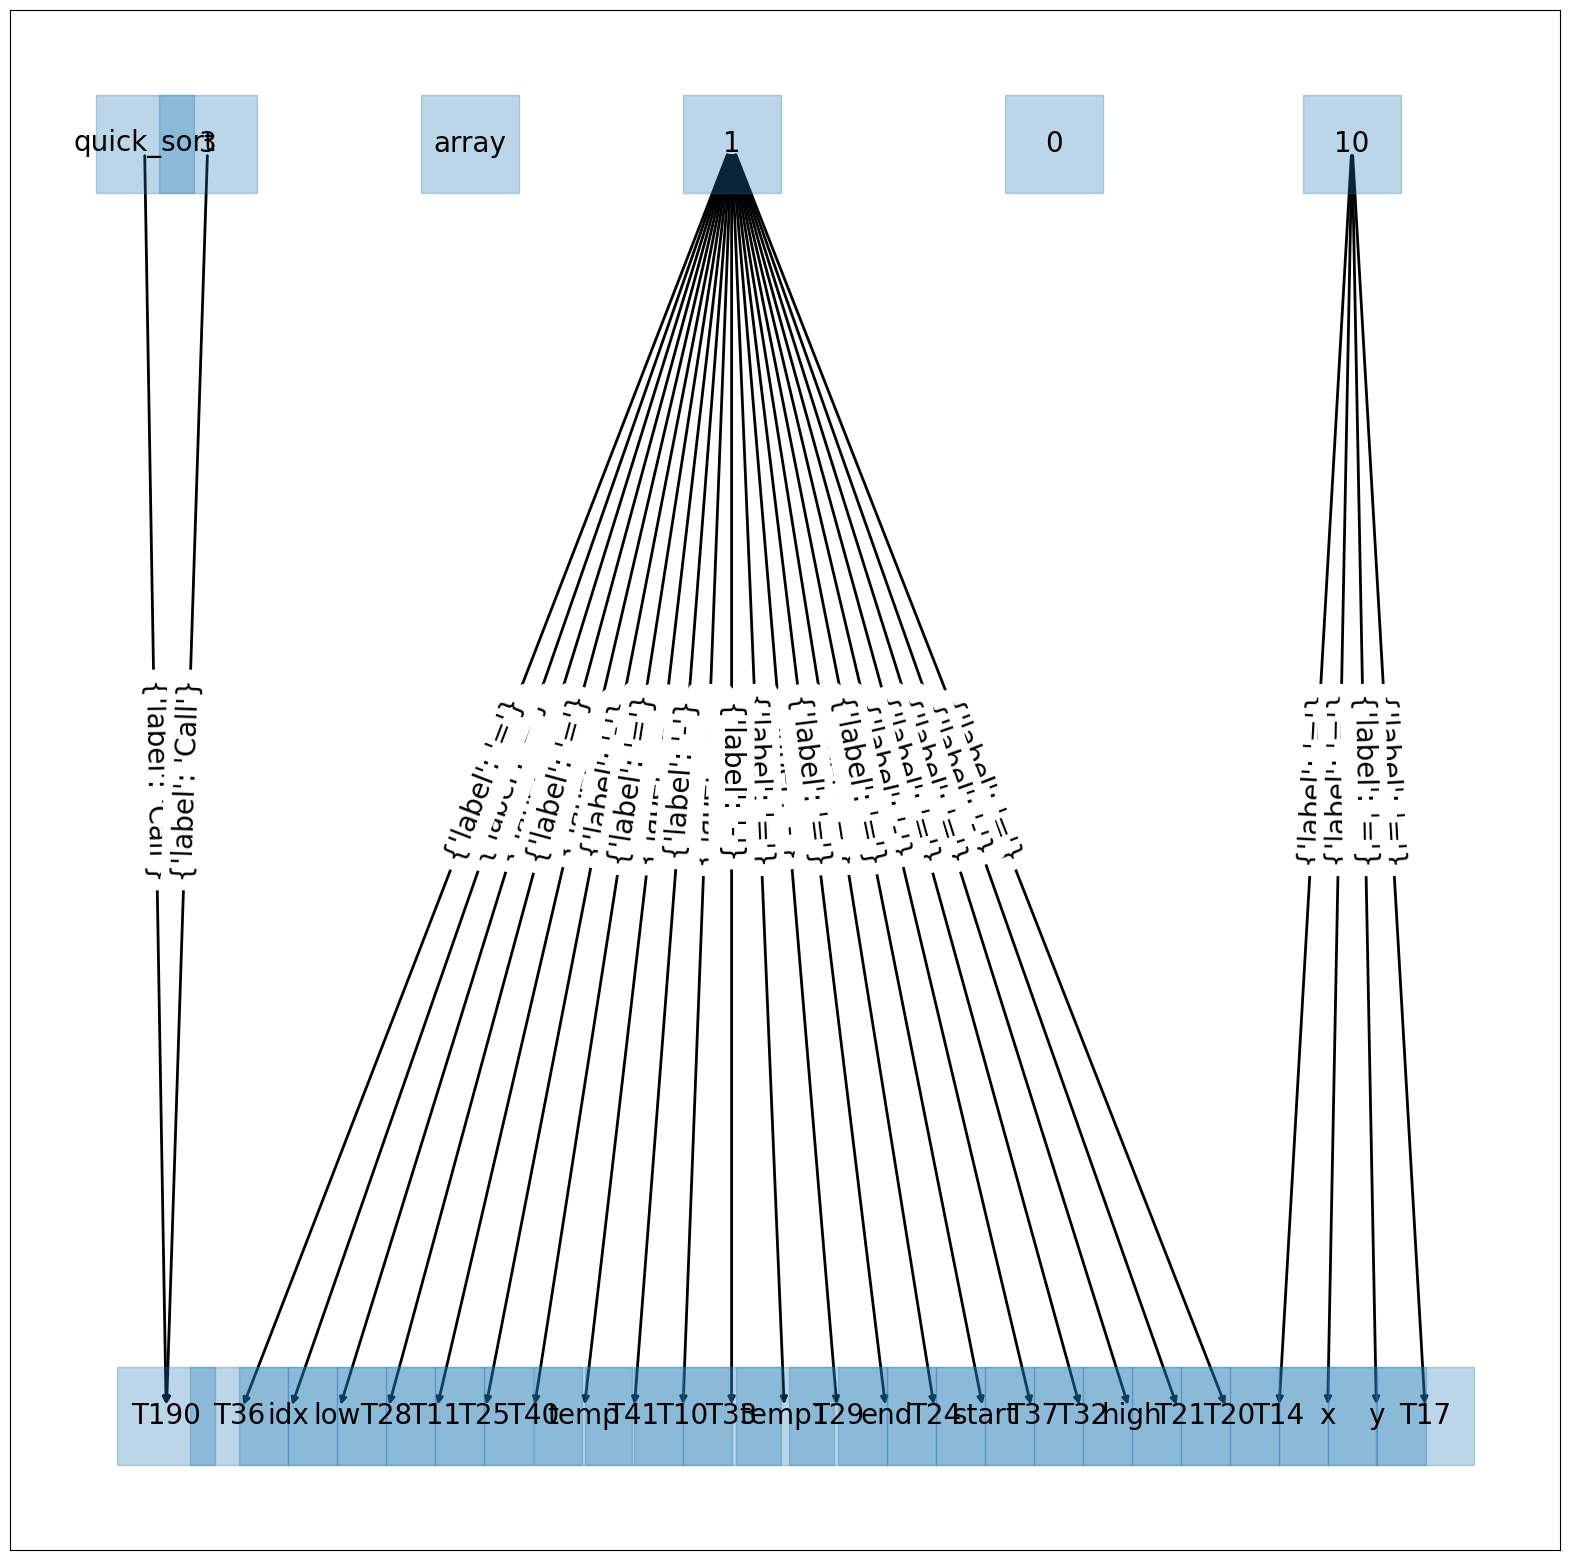

(None, None)

In [40]:
pprint(tot_icg), plot_DAG(tot_icg[0])

{'T10': False,
 'T100': True,
 'T119': True,
 'T134': True,
 'T14': False,
 'T145': True,
 'T146': False,
 'T147': True,
 'T155': True,
 'T156': False,
 'T157': True,
 'T17': False,
 'T20': False,
 'T24': False,
 'T28': False,
 'T32': False,
 'T36': False,
 'T40': False,
 'T45': True,
 'T46': True,
 'T47': True,
 'T50': True,
 'T53': True,
 'T54': False,
 'T55': True,
 'T58': True,
 'T61': True,
 'T62': True,
 'T63': True,
 'T64': True,
 'T67': True,
 'T68': True,
 'T69': True,
 'T70': True,
 'T71': True,
 'T72': False,
 'T73': True,
 'T76': True,
 'T77': True,
 'T78': True,
 'T81': True,
 'T82': True,
 'T83': True,
 'T84': True,
 'T85': True,
 'T86': False,
 'T87': True,
 'T90': True,
 'T91': True,
 'T92': True,
 'T95': True,
 'True': True,
 'array': True,
 'end': True,
 'high': True,
 'idx': True,
 'low': True,
 'pivot': True,
 'quick_sort': True,
 'start': True,
 'temp': True,
 'temp1': True,
 'x': False,
 'y': False}
[[1: -, 1, None, T11,
  -1: =, 10, None, T17,
  7: =, 1, None, T2

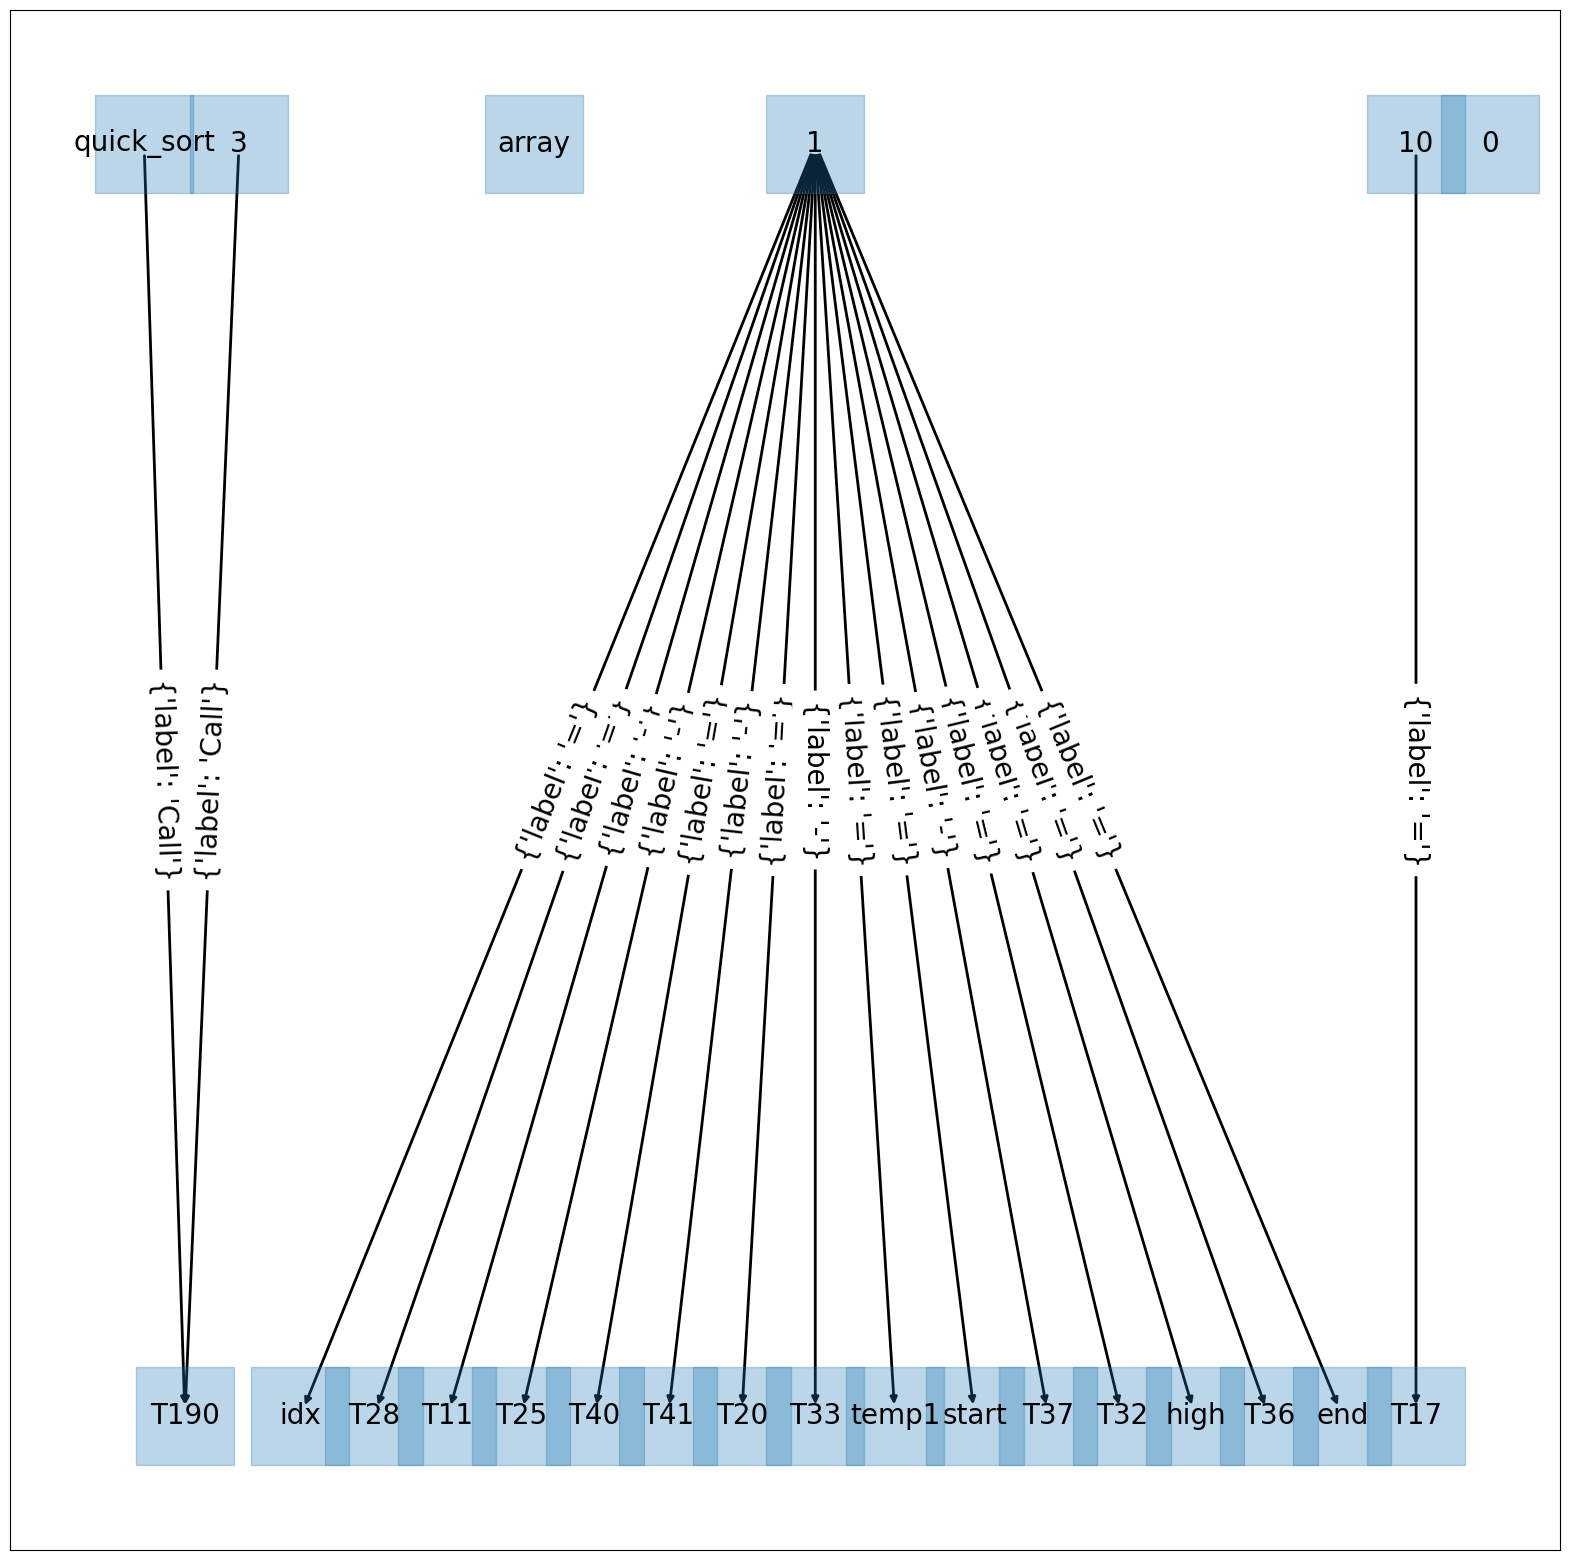

{'T100': True,
 'T119': True,
 'T134': True,
 'T145': True,
 'T147': True,
 'T155': True,
 'T156': False,
 'T157': True,
 'T17': False,
 'T20': False,
 'T28': False,
 'T32': False,
 'T36': False,
 'T40': False,
 'T45': True,
 'T46': True,
 'T47': True,
 'T50': True,
 'T53': True,
 'T55': True,
 'T58': True,
 'T61': True,
 'T62': True,
 'T63': True,
 'T64': True,
 'T67': True,
 'T68': True,
 'T69': True,
 'T70': True,
 'T71': True,
 'T73': True,
 'T76': True,
 'T77': True,
 'T78': True,
 'T81': True,
 'T82': True,
 'T83': True,
 'T84': True,
 'T85': True,
 'T87': True,
 'T90': True,
 'T91': True,
 'T92': True,
 'T95': True,
 'True': True,
 'array': True,
 'end': True,
 'high': True,
 'idx': True,
 'low': True,
 'pivot': True,
 'quick_sort': True,
 'start': True,
 'temp': True,
 'temp1': True}
[[1: -, 1, None, T11,
  7: =, 1, None, T20,
  9: =, 1, None, high,
  15: =, 1, None, temp1,
  -1: -, 1, None, T33,
  19: =, 1, None, T36,
  20: -, 1, None, T37,
  21: =, 1, None, start,
  22: =, 1,

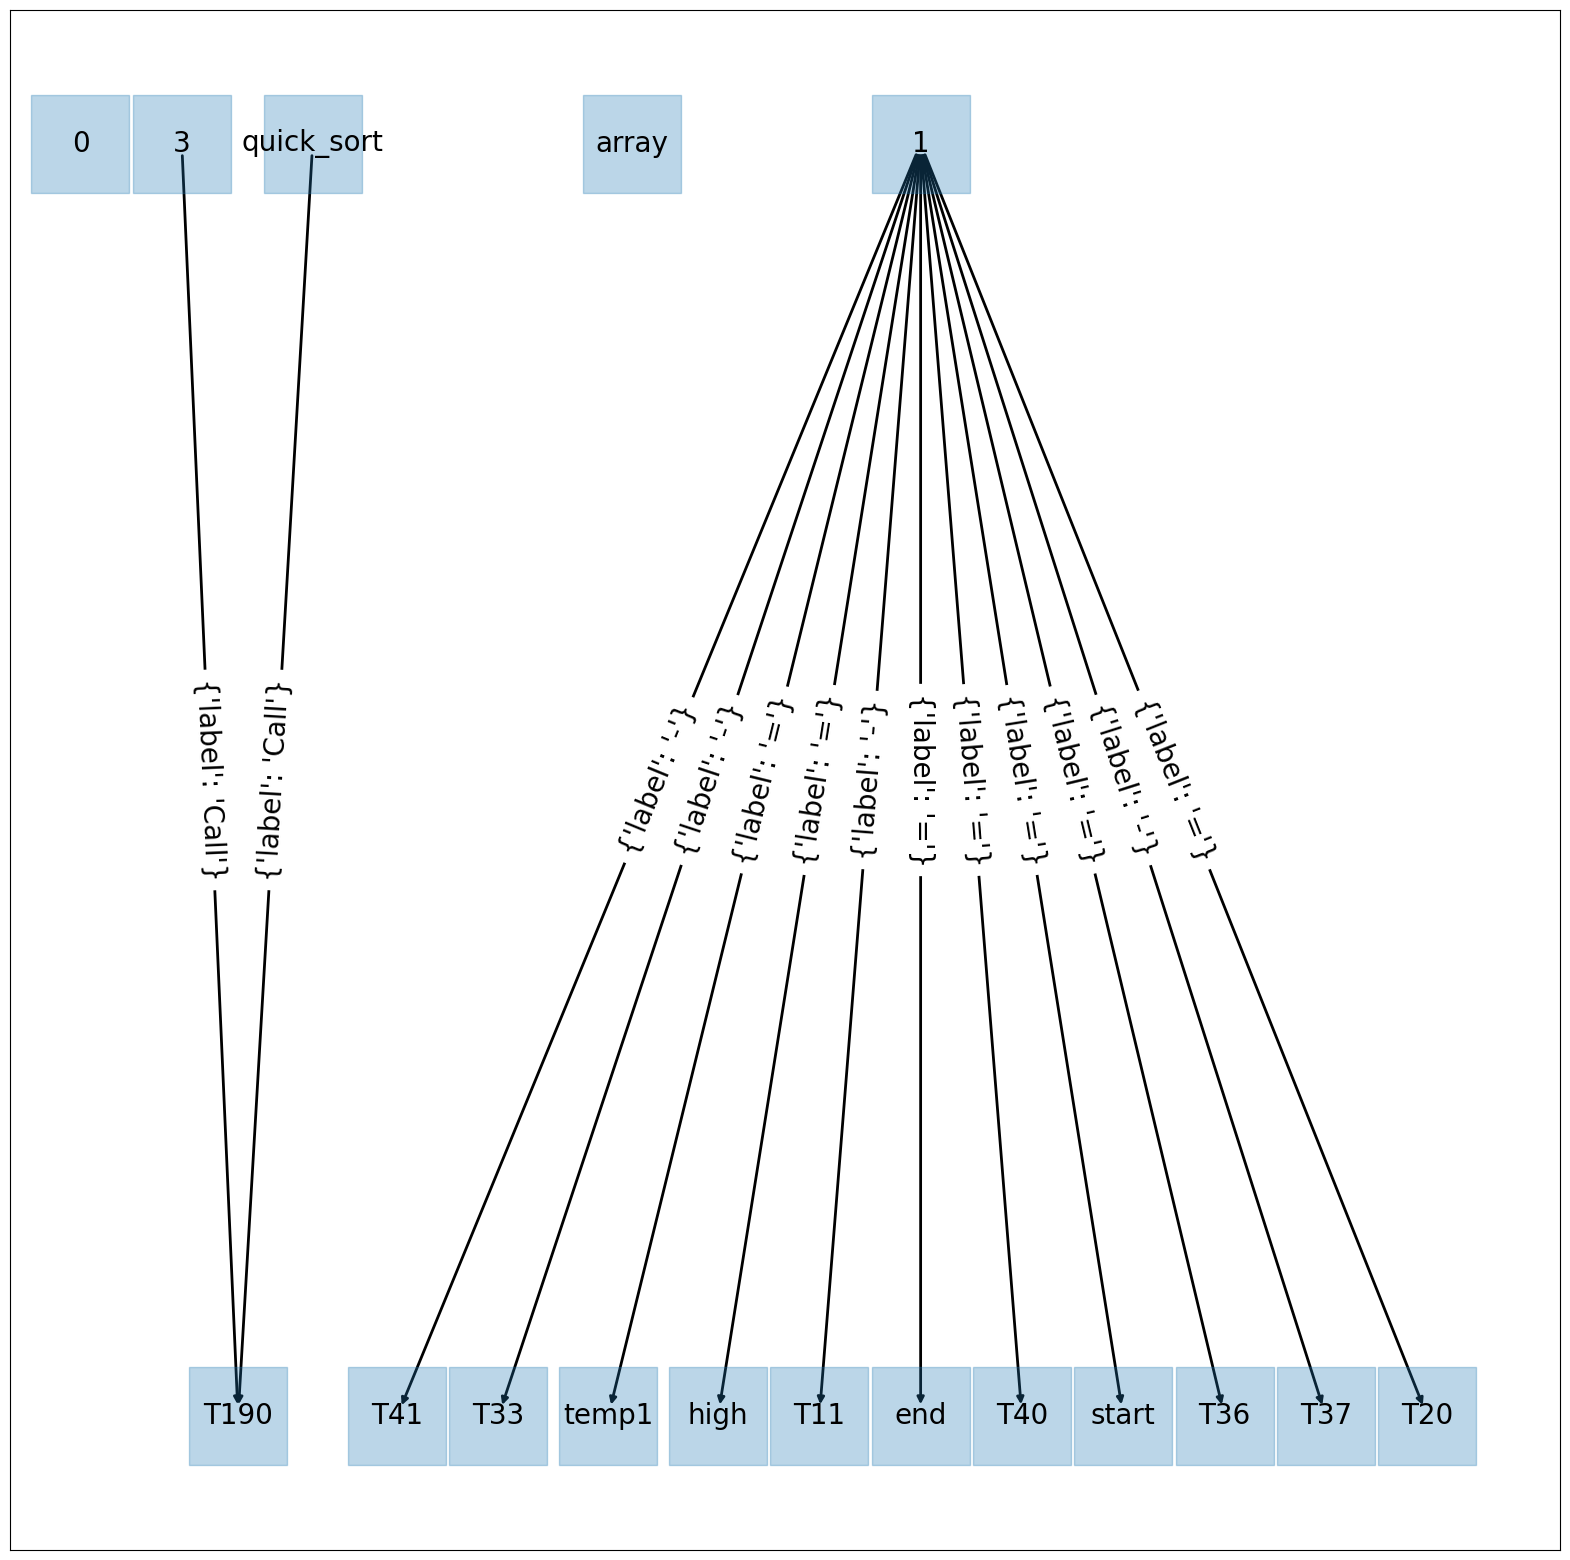

{'T100': True,
 'T119': True,
 'T134': True,
 'T145': True,
 'T147': True,
 'T155': True,
 'T157': True,
 'T20': False,
 'T36': False,
 'T40': False,
 'T45': True,
 'T46': True,
 'T47': True,
 'T50': True,
 'T53': True,
 'T55': True,
 'T58': True,
 'T61': True,
 'T62': True,
 'T63': True,
 'T64': True,
 'T67': True,
 'T68': True,
 'T69': True,
 'T70': True,
 'T71': True,
 'T73': True,
 'T76': True,
 'T77': True,
 'T78': True,
 'T81': True,
 'T82': True,
 'T83': True,
 'T84': True,
 'T85': True,
 'T87': True,
 'T90': True,
 'T91': True,
 'T92': True,
 'T95': True,
 'True': True,
 'array': True,
 'end': True,
 'high': True,
 'idx': True,
 'low': True,
 'pivot': True,
 'quick_sort': True,
 'start': True,
 'temp': True,
 'temp1': True}
[[1: -, 1, None, T11,
  9: =, 1, None, high,
  15: =, 1, None, temp1,
  19: =, 1, None, T36,
  21: =, 1, None, start,
  22: =, 1, None, T40,
  23: -, 1, None, T41,
  24: =, 1, None, end,
  112: Param, array, None, None,
  113: Param, array, None, None,
  114

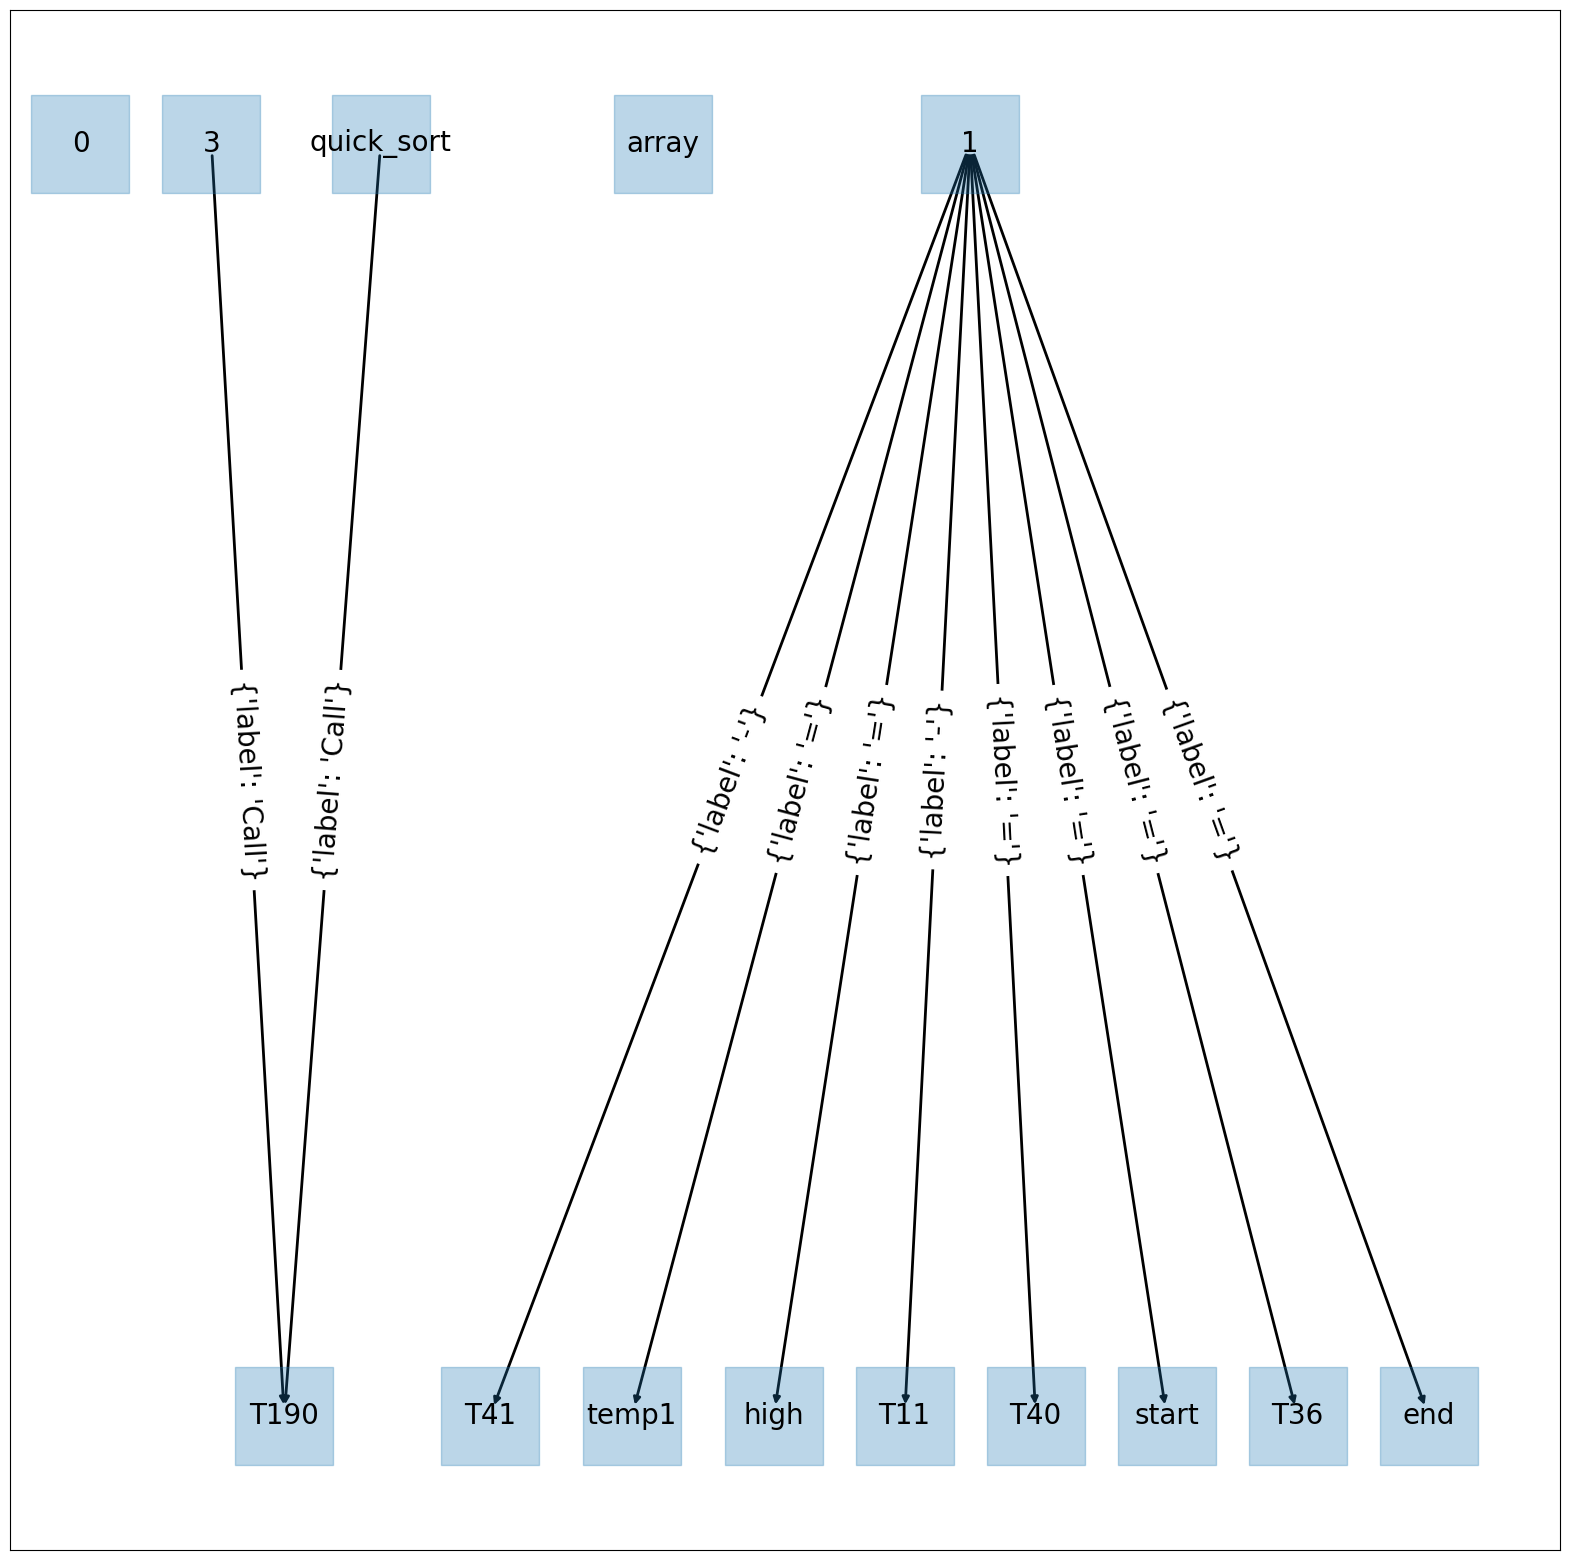

{'T100': True,
 'T119': True,
 'T134': True,
 'T145': True,
 'T147': True,
 'T155': True,
 'T157': True,
 'T36': False,
 'T40': False,
 'T45': True,
 'T46': True,
 'T47': True,
 'T50': True,
 'T53': True,
 'T55': True,
 'T58': True,
 'T61': True,
 'T62': True,
 'T63': True,
 'T64': True,
 'T67': True,
 'T68': True,
 'T69': True,
 'T70': True,
 'T71': True,
 'T73': True,
 'T76': True,
 'T77': True,
 'T78': True,
 'T81': True,
 'T82': True,
 'T83': True,
 'T84': True,
 'T85': True,
 'T87': True,
 'T90': True,
 'T91': True,
 'T92': True,
 'T95': True,
 'True': True,
 'array': True,
 'end': True,
 'high': True,
 'idx': True,
 'low': True,
 'pivot': True,
 'quick_sort': True,
 'start': True,
 'temp': True,
 'temp1': True}
[[1: -, 1, None, T11,
  9: =, 1, None, high,
  15: =, 1, None, temp1,
  22: =, 1, None, T40,
  23: -, 1, None, T41,
  24: =, 1, None, end,
  112: Param, array, None, None,
  113: Param, array, None, None,
  114: Param, 0, None, None,
  115: Call, quick_sort, 3, T190],
 [25

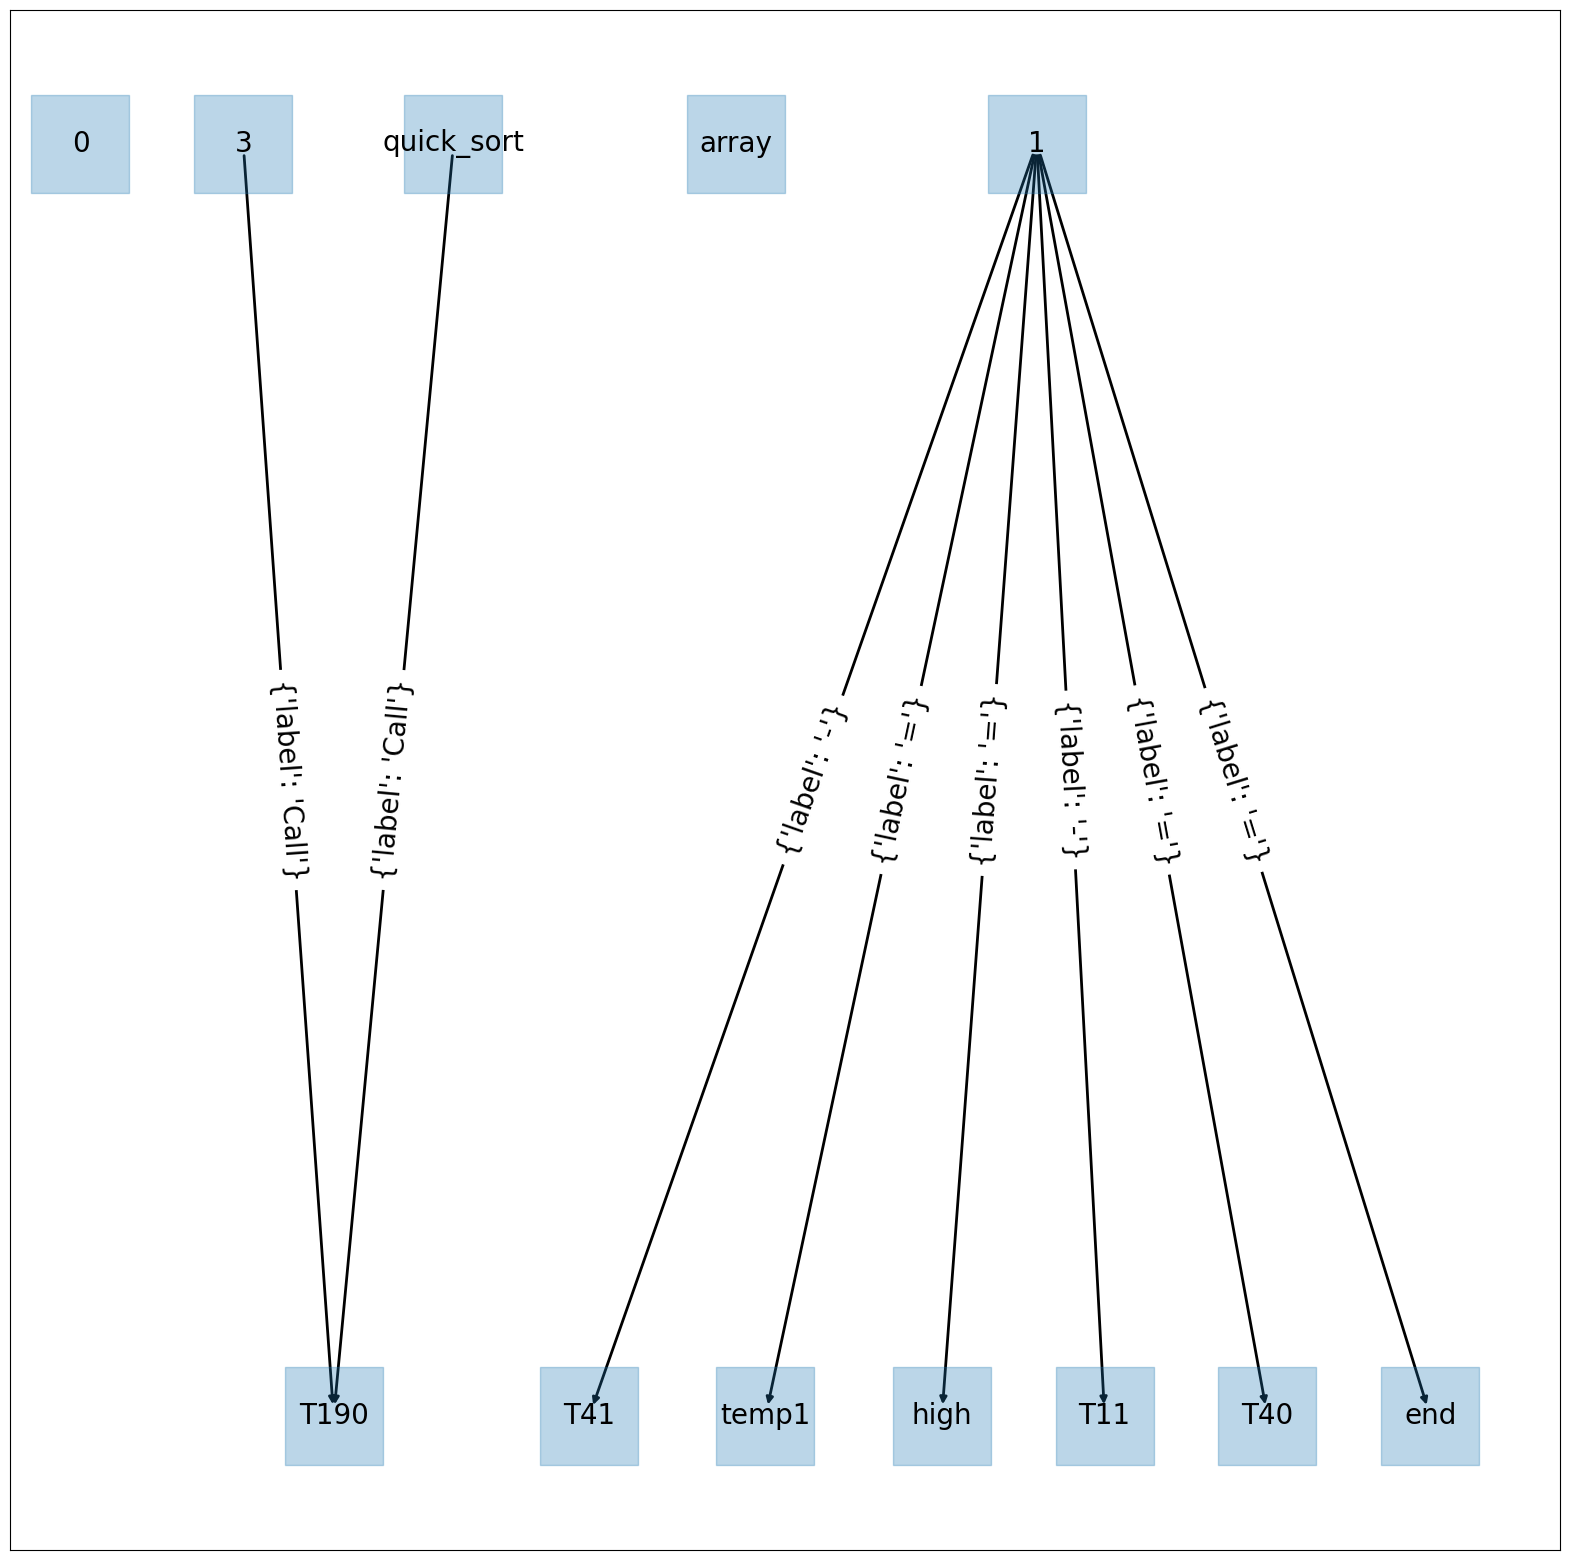

{'T100': True,
 'T119': True,
 'T134': True,
 'T145': True,
 'T147': True,
 'T155': True,
 'T157': True,
 'T40': False,
 'T45': True,
 'T46': True,
 'T47': True,
 'T50': True,
 'T53': True,
 'T55': True,
 'T58': True,
 'T61': True,
 'T62': True,
 'T63': True,
 'T64': True,
 'T67': True,
 'T68': True,
 'T69': True,
 'T70': True,
 'T71': True,
 'T73': True,
 'T76': True,
 'T77': True,
 'T78': True,
 'T81': True,
 'T82': True,
 'T83': True,
 'T84': True,
 'T85': True,
 'T87': True,
 'T90': True,
 'T91': True,
 'T92': True,
 'T95': True,
 'True': True,
 'array': True,
 'end': True,
 'high': True,
 'idx': True,
 'low': True,
 'pivot': True,
 'quick_sort': True,
 'start': True,
 'temp': True,
 'temp1': True}
[[1: -, 1, None, T11,
  9: =, 1, None, high,
  15: =, 1, None, temp1,
  23: -, 1, None, T41,
  24: =, 1, None, end,
  112: Param, array, None, None,
  113: Param, array, None, None,
  114: Param, 0, None, None,
  115: Call, quick_sort, 3, T190],
 [25: BeginF, quick_sort, None, None,
  26

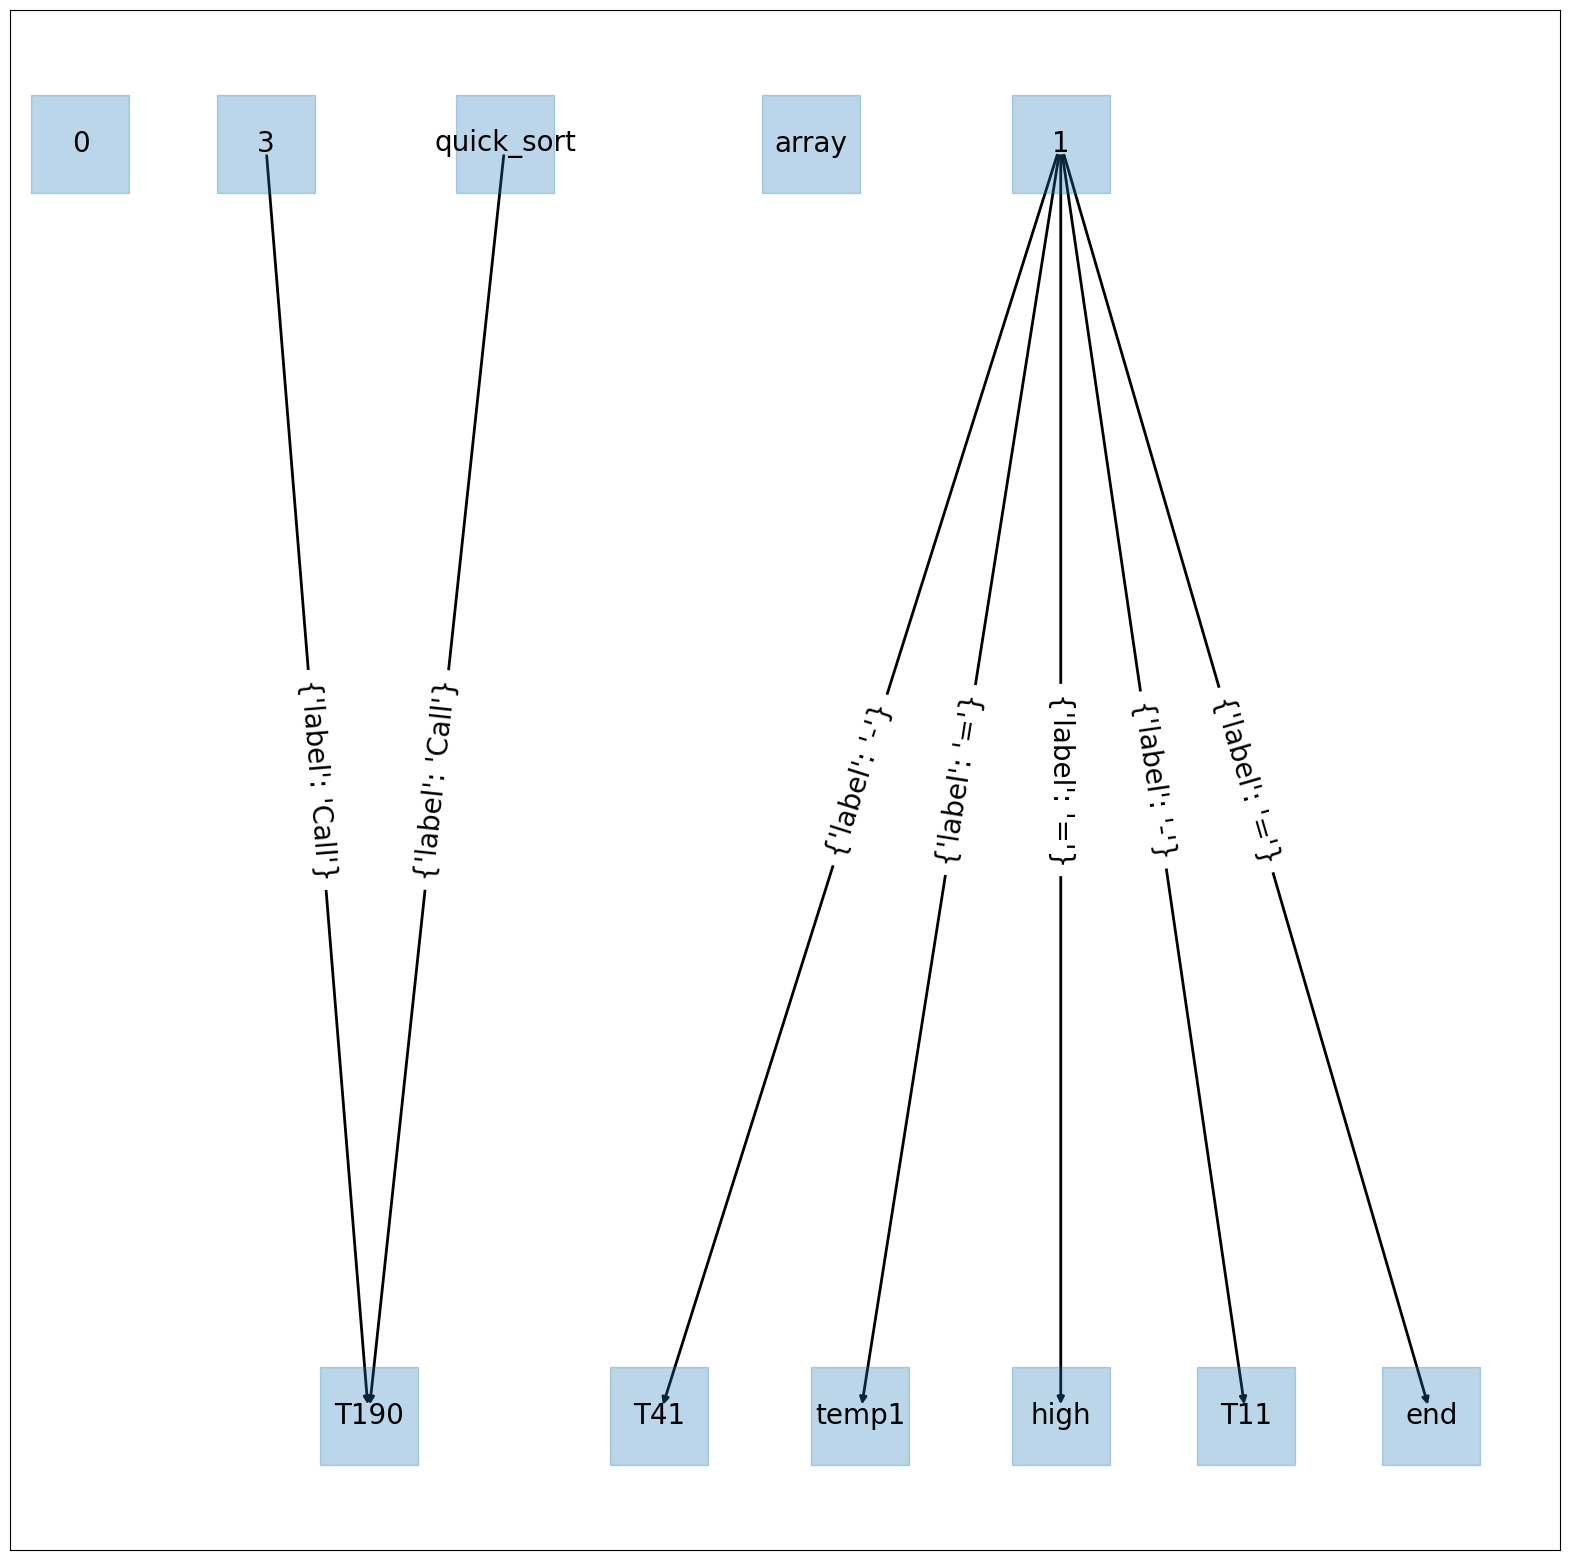

{'T100': True,
 'T119': True,
 'T134': True,
 'T145': True,
 'T147': True,
 'T155': True,
 'T157': True,
 'T45': True,
 'T46': True,
 'T47': True,
 'T50': True,
 'T53': True,
 'T55': True,
 'T58': True,
 'T61': True,
 'T62': True,
 'T63': True,
 'T64': True,
 'T67': True,
 'T68': True,
 'T69': True,
 'T70': True,
 'T71': True,
 'T73': True,
 'T76': True,
 'T77': True,
 'T78': True,
 'T81': True,
 'T82': True,
 'T83': True,
 'T84': True,
 'T85': True,
 'T87': True,
 'T90': True,
 'T91': True,
 'T92': True,
 'T95': True,
 'True': True,
 'array': True,
 'end': True,
 'high': True,
 'idx': True,
 'low': True,
 'pivot': True,
 'quick_sort': True,
 'start': True,
 'temp': True,
 'temp1': True}


In [41]:
def deadcodeeliminations(blocks):
    in_use = {}
    for idx, block in enumerate(blocks):
        for idx_l, linel in enumerate(block):
            if linel.op1:
                if not linel.op1.isdigit() or (linel.op1[0]=='"' and linel.op1[-1]=='"'):
                    in_use[linel.op1] = True
            if linel.op2:
                if not linel.op2.isdigit() or (linel.op2[0]=='"' and linel.op2[-1]=='"'):
                    in_use[linel.op2] = True
                    
            if linel.result and linel.op == '=':
                if not linel.result.isdigit() or (linel.result[0]=='"' and linel.result[-1]=='"'):
                    in_use[linel.result] = False
                else:
                    continue
        blocks[idx] = block
        
    pprint(in_use)
    for idx, block in enumerate(blocks):
        offset = 0
        for idx_l, linel in enumerate(block):
            if linel.op=="Label" or linel.op=="goto" or linel.op=="If False" or linel.op=="BeginF" or linel.op=="EndF":
                continue
            if linel.result:
                if linel.result in in_use:
                    if not in_use[linel.result]:
                        block.pop(idx_l-offset)
                        offset+=1
                    
    return blocks
       
before_copy = deepcopy(tot_icg)
while True:
    tot_icg = deadcodeeliminations(tot_icg)
    for i in range(len(tot_icg)):
        tot_icg[i] = constant_folding(tot_icg[i])
        tot_icg[i] = constant_propagation(tot_icg[i])
	
    if tot_repr(tot_icg) == tot_repr(before_copy):
        break
    else:
        before_copy = deepcopy(tot_icg)
        
    pprint(tot_icg)
    plot_DAG(tot_icg[0])

In [42]:
pprint(tot_icg)

[[1: -, 1, None, T11,
  9: =, 1, None, high,
  15: =, 1, None, temp1,
  23: -, 1, None, T41,
  24: =, 1, None, end,
  112: Param, array, None, None,
  113: Param, array, None, None,
  114: Param, 0, None, None,
  115: Call, quick_sort, 3, T190],
 [25: BeginF, quick_sort, None, None,
  26: =, low, None, T45,
  27: =, high, None, T46,
  28: <, T45, T46, T47,
  29: If False, T47, None, L0],
 [30: ListIndex, array, low, T50,
  31: =, T50, None, pivot,
  32: =, low, None, T53,
  34: +, T53, 1, T55,
  35: =, T55, None, start,
  36: =, high, None, T58,
  37: =, T58, None, end,
  38: =, True, None, T61],
 [39: Label, None, None, L1, 40: If False, T61, None, L2],
 [41: =, start, None, T62,
  42: =, end, None, T63,
  43: <=, T62, T63, T64,
  44: ListIndex, array, end, T67,
  45: =, pivot, None, T68,
  46: >=, T67, T68, T69,
  47: and, T64, T69, T70],
 [48: Label, None, None, L3, 49: If False, T70, None, L4],
 [50: =, end, None, T71,
  52: -, T71, 1, T73,
  53: =, T73, None, end,
  54: =, start, 

[1: -, 1, None, T11,
 9: =, 1, None, high,
 15: =, 1, None, temp1,
 23: -, 1, None, T41,
 24: =, 1, None, end,
 112: Param, array, None, None,
 113: Param, array, None, None,
 114: Param, 0, None, None,
 115: Call, quick_sort, 3, T190]
['T41', '0', '3', 'quick_sort', 'array', 'T190', 'temp1', 'high', 'T11', '1', 'end']


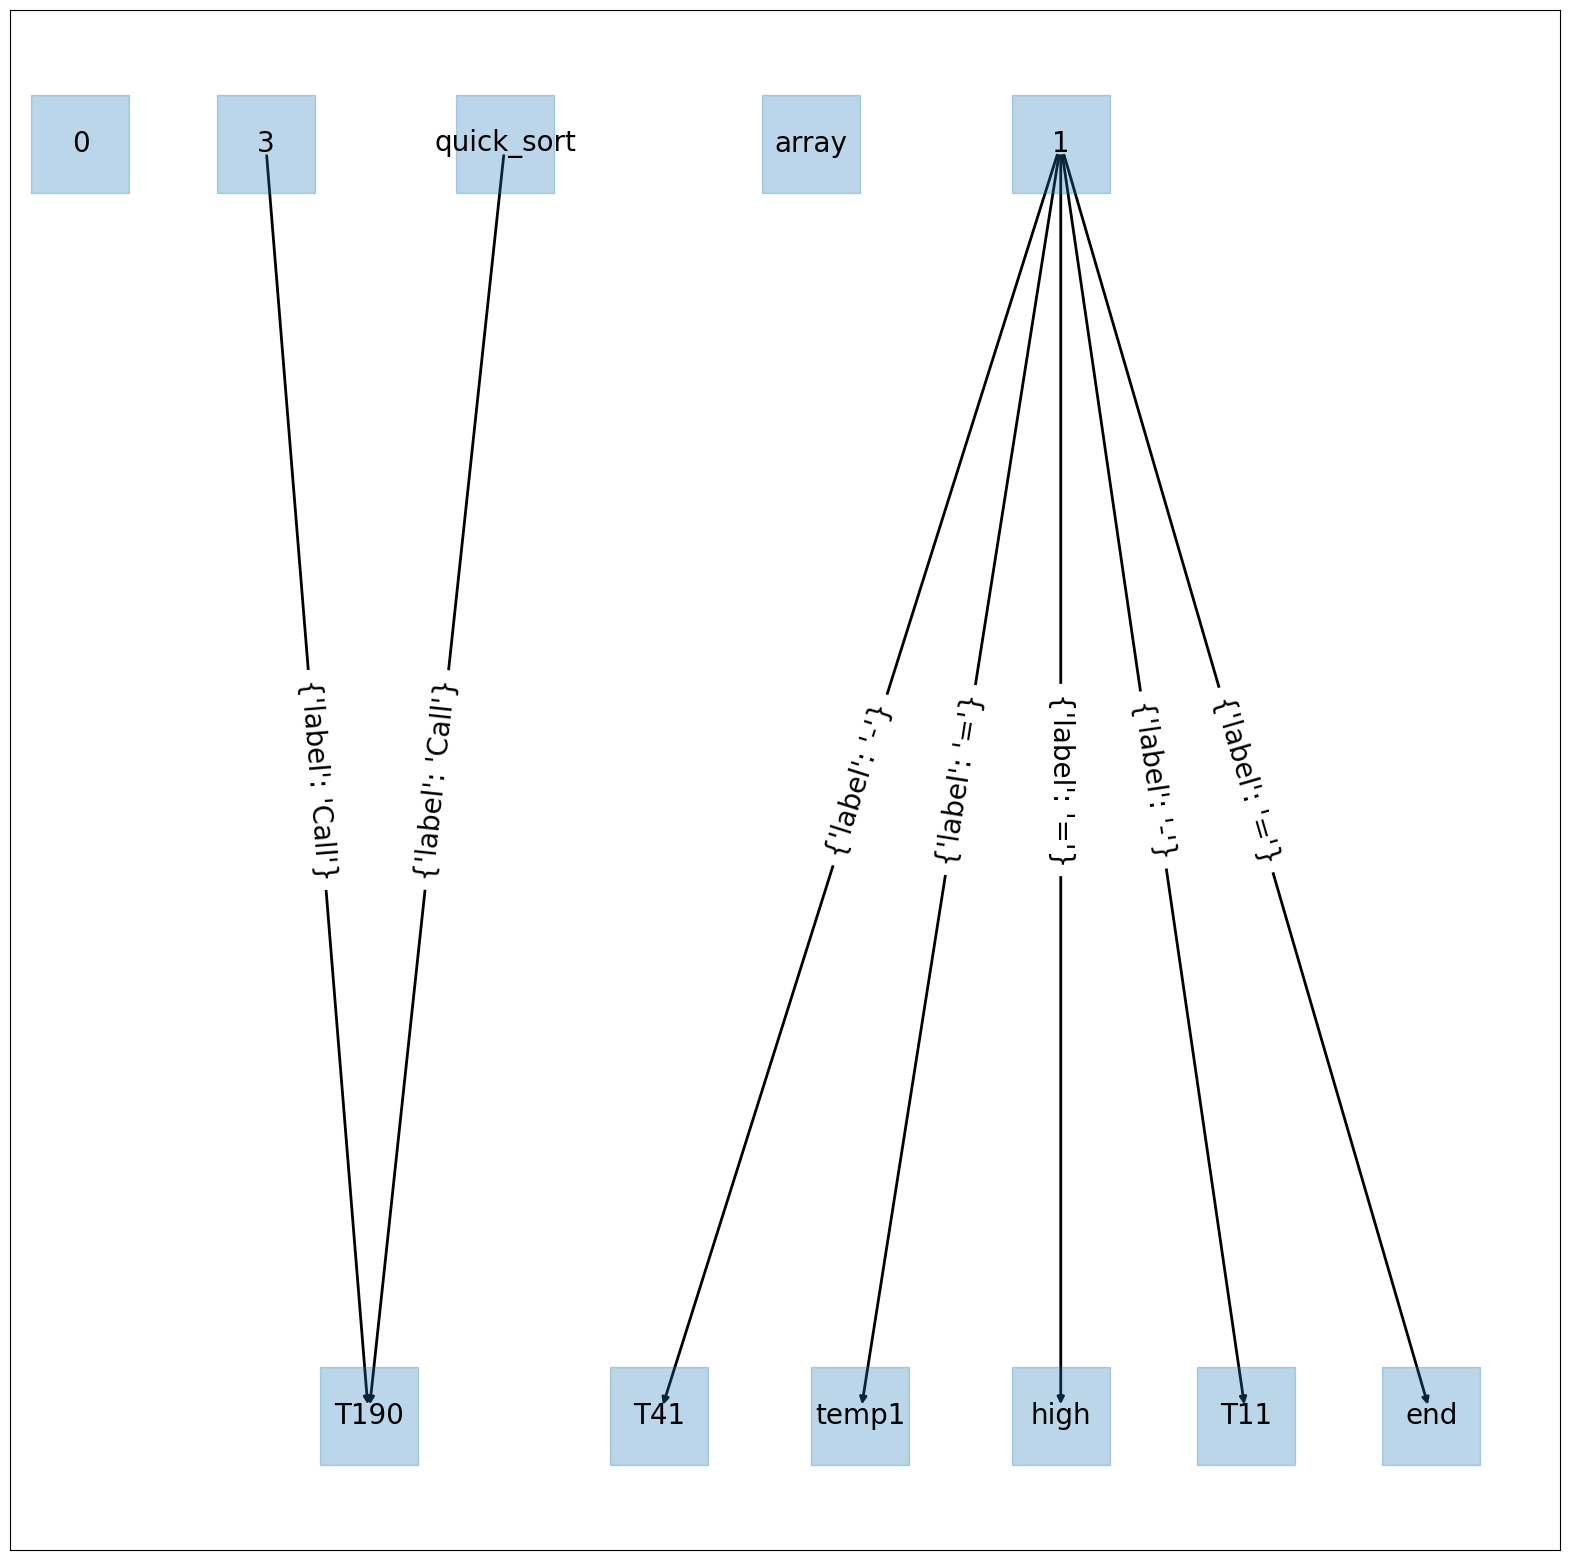

[25: BeginF, quick_sort, None, None,
 26: =, low, None, T45,
 27: =, high, None, T46,
 28: <, T45, T46, T47,
 29: If False, T47, None, L0]
['low', 'quick_sort', 'T45', 'high', 'T46', 'T47', 'L0']


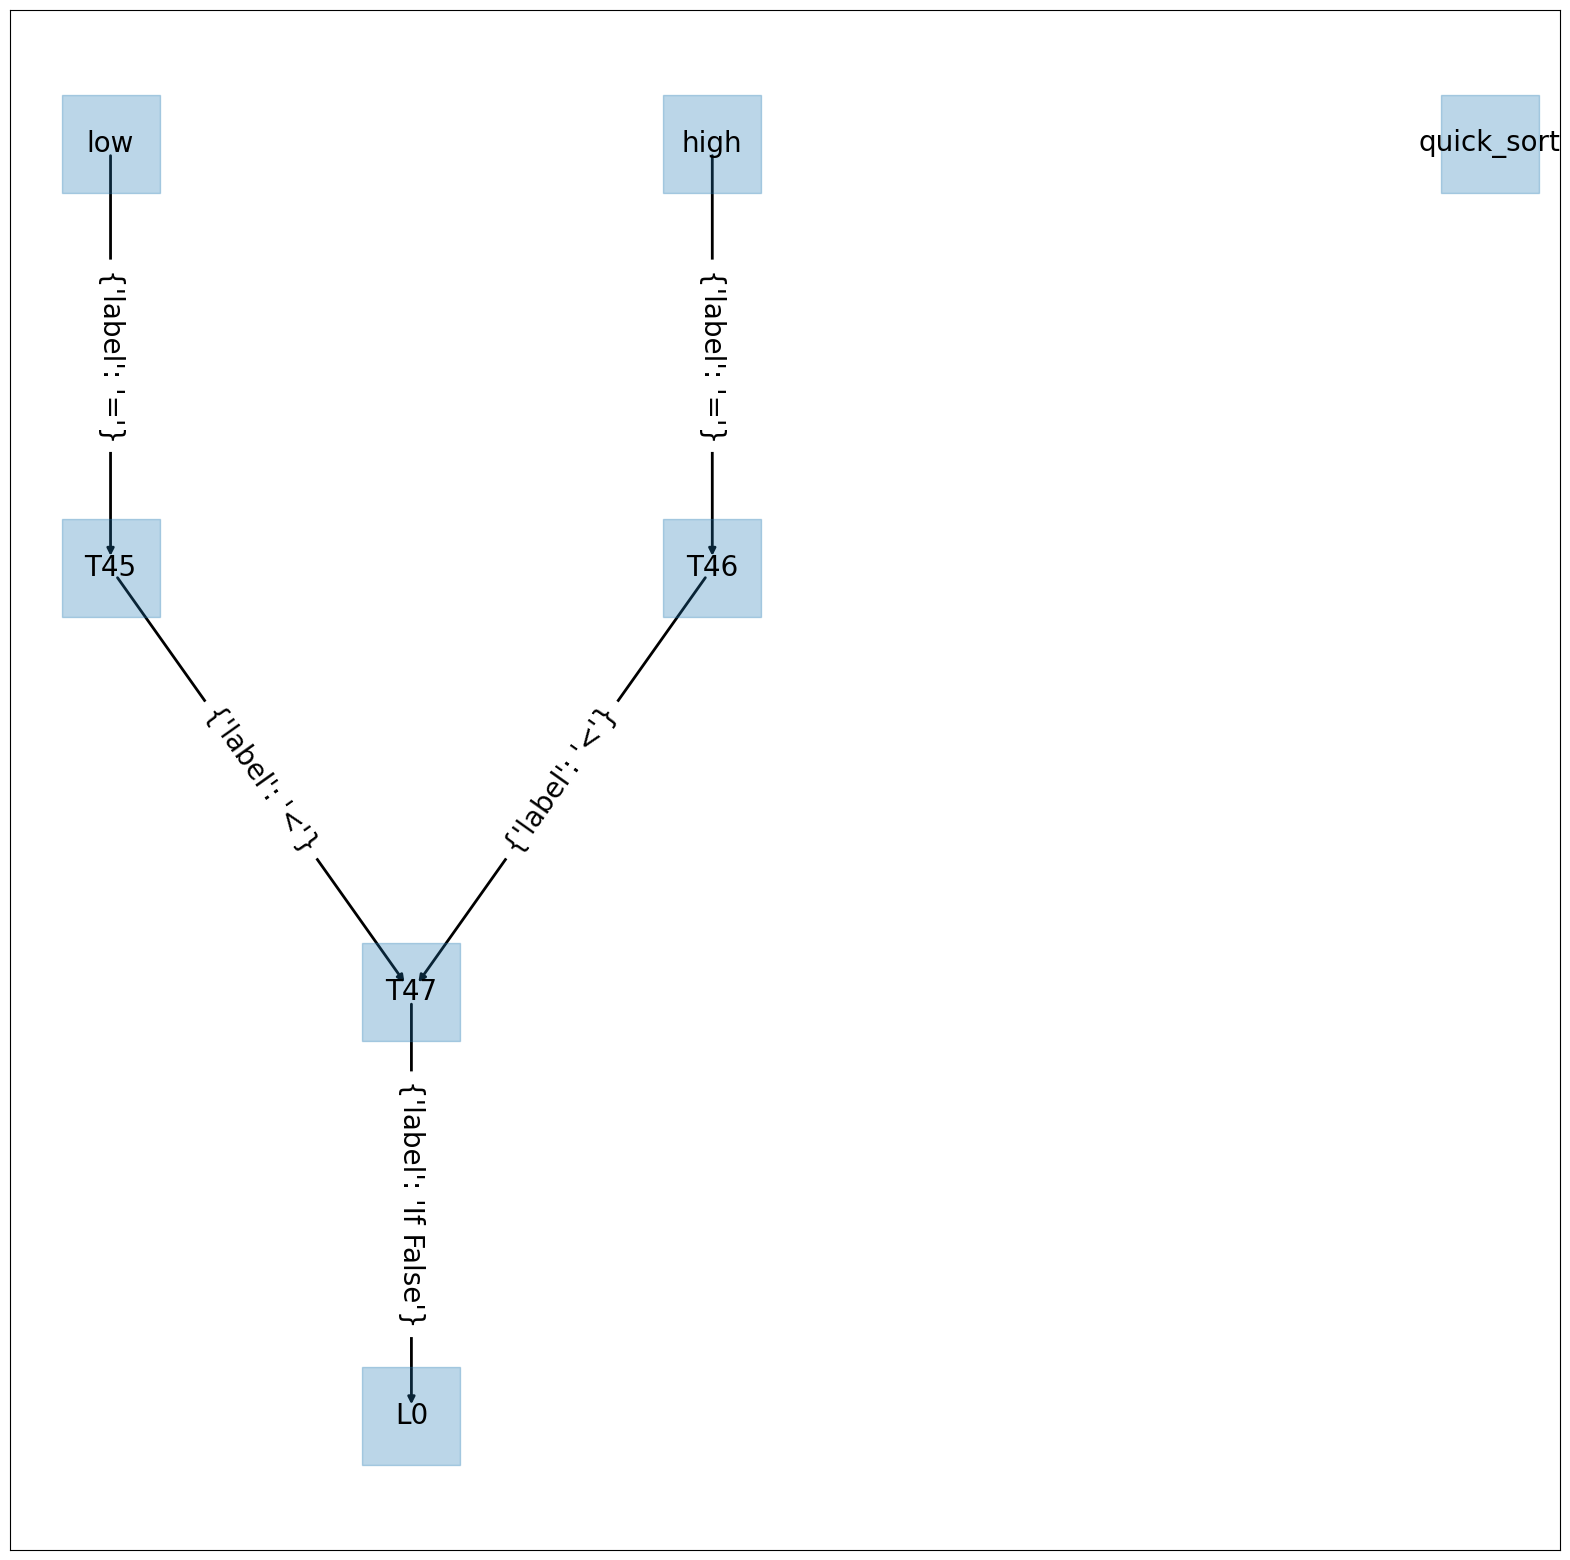

[30: ListIndex, array, low, T50,
 31: =, T50, None, pivot,
 32: =, low, None, T53,
 34: +, T53, 1, T55,
 35: =, T55, None, start,
 36: =, high, None, T58,
 37: =, T58, None, end,
 38: =, True, None, T61]
['low', 'T53', 'T58', 'T50', 'array', 'True', 'T61', 'high', 'end', '1', 'start', 'pivot', 'T55']


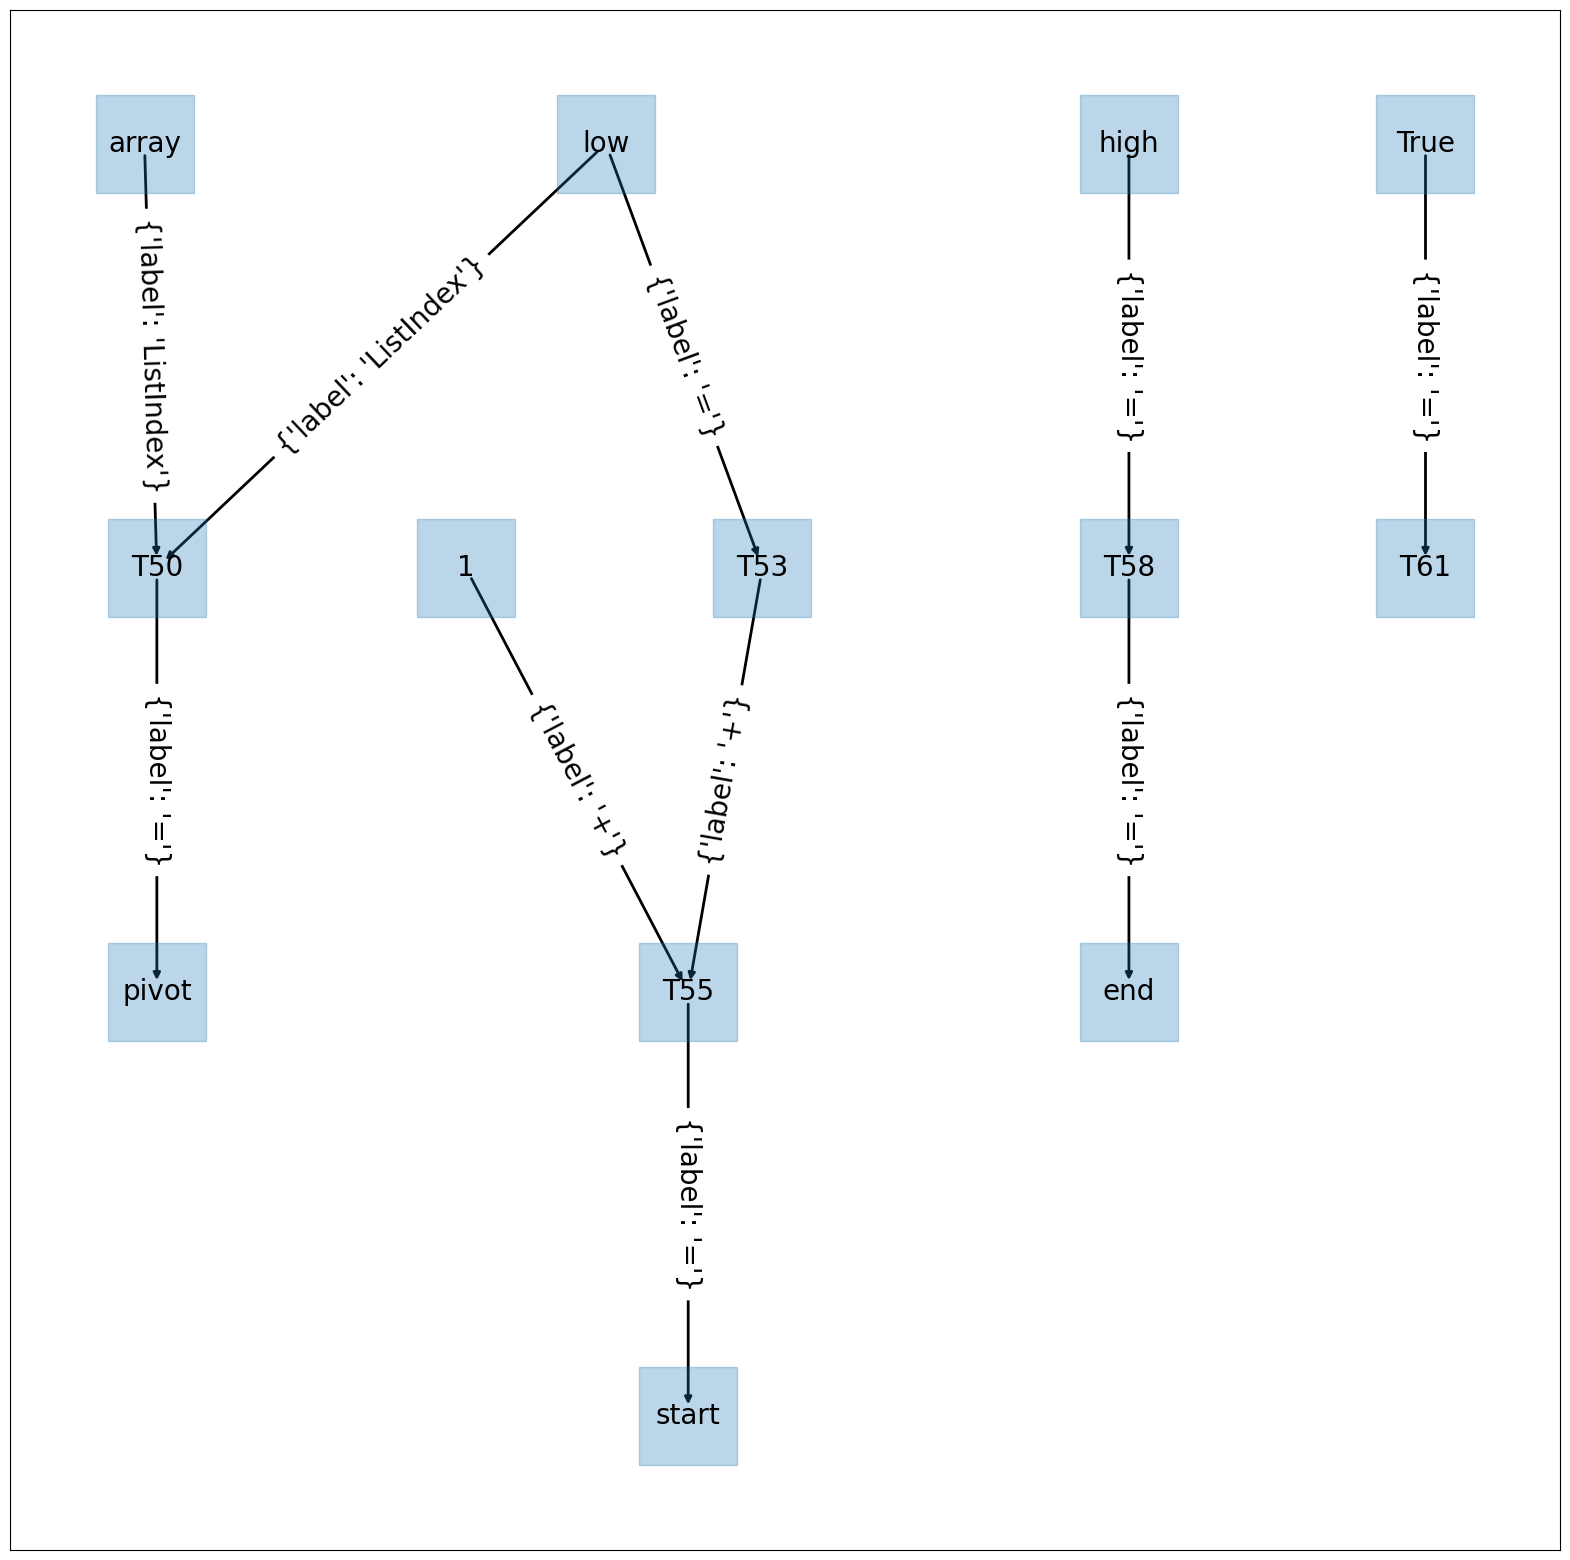

[39: Label, None, None, L1, 40: If False, T61, None, L2]
['L1', 'L2', 'T61']


/tmp/ipykernel_77639/645073614.py:38: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, width=2)


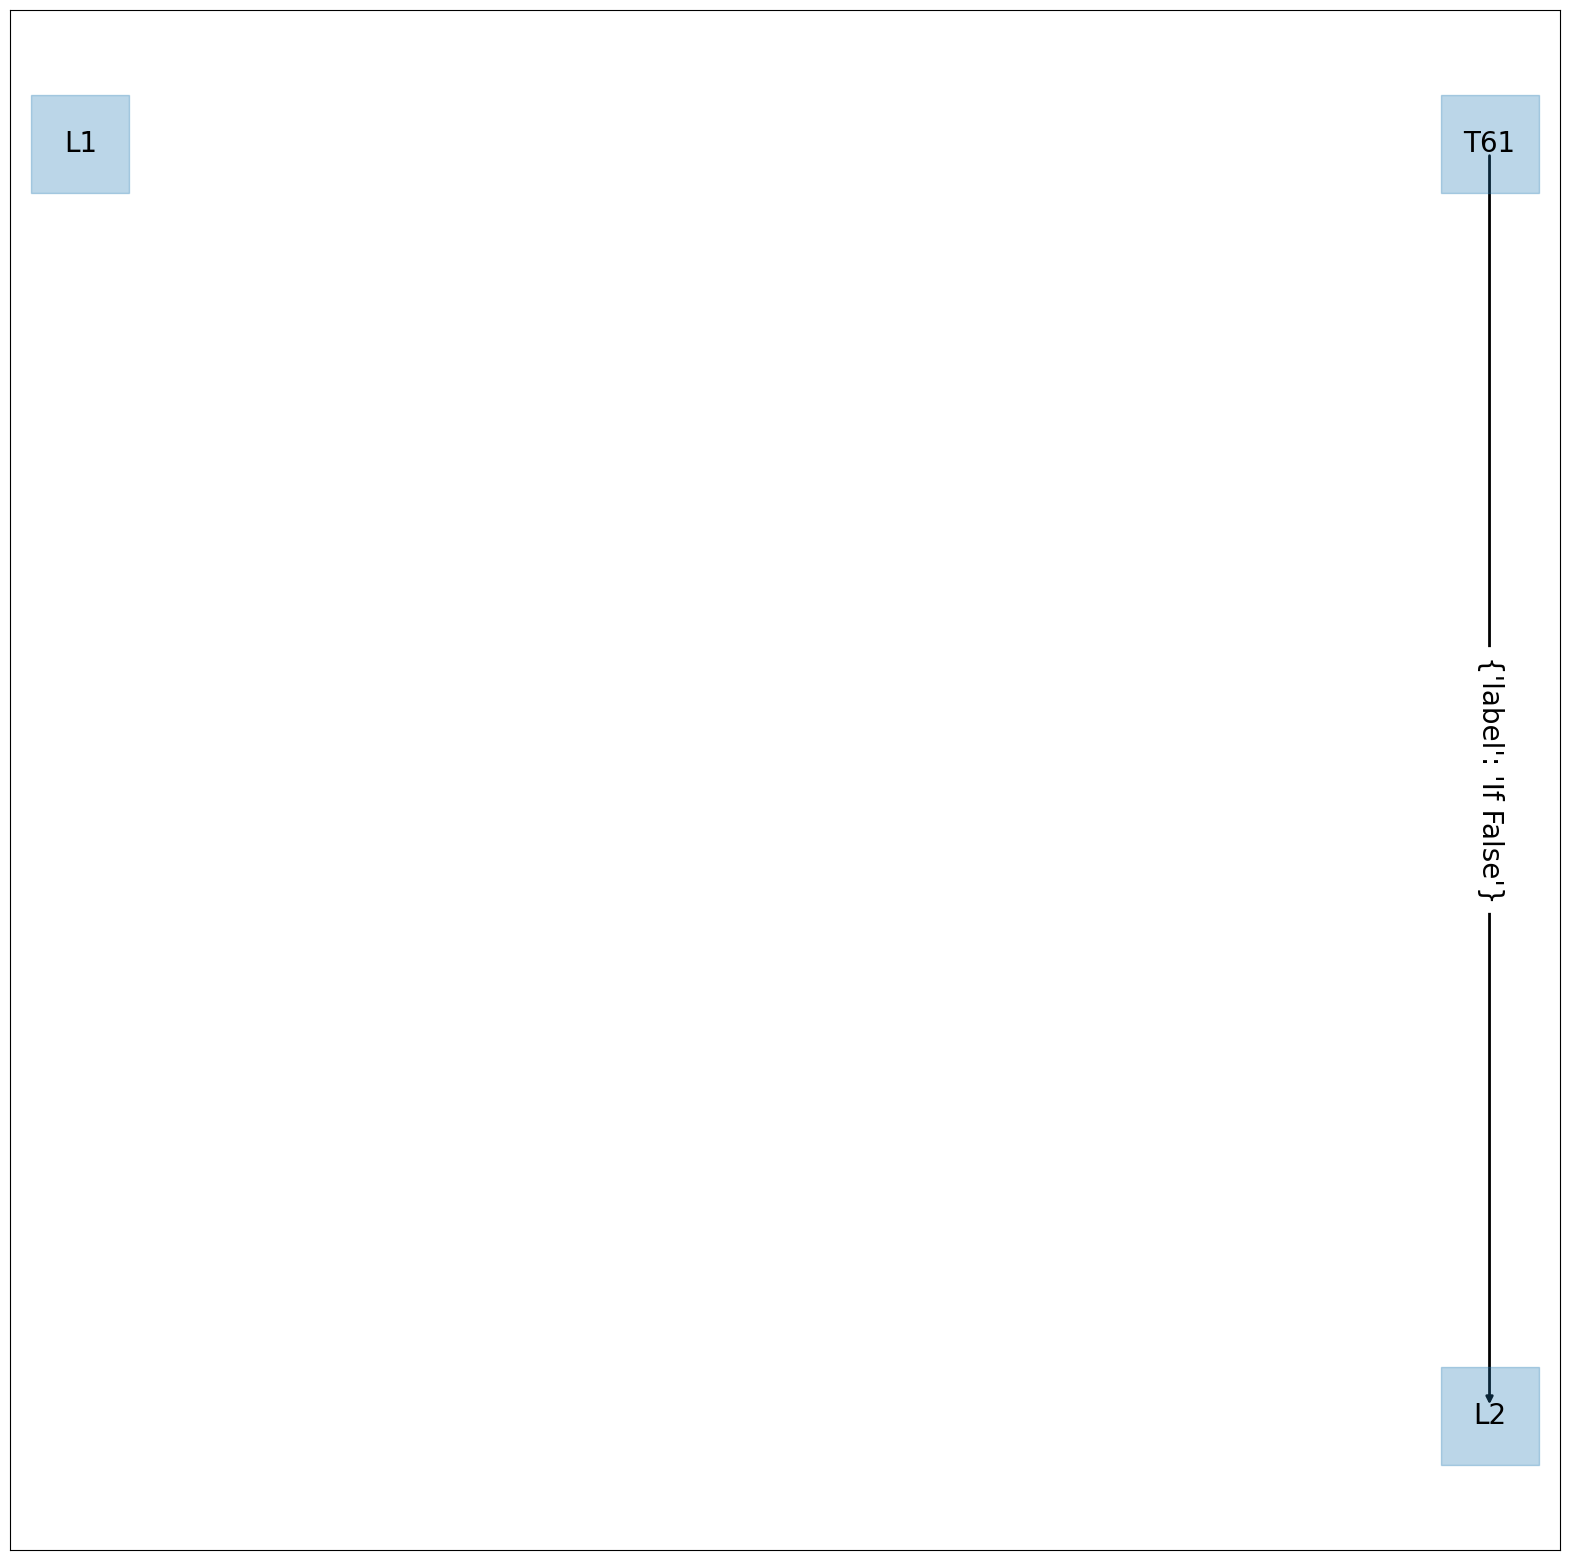

[41: =, start, None, T62,
 42: =, end, None, T63,
 43: <=, T62, T63, T64,
 44: ListIndex, array, end, T67,
 45: =, pivot, None, T68,
 46: >=, T67, T68, T69,
 47: and, T64, T69, T70]
['T64', 'T63', 'T69', 'T67', 'array', 'T62', 'T70', 'start', 'T68', 'pivot', 'end']


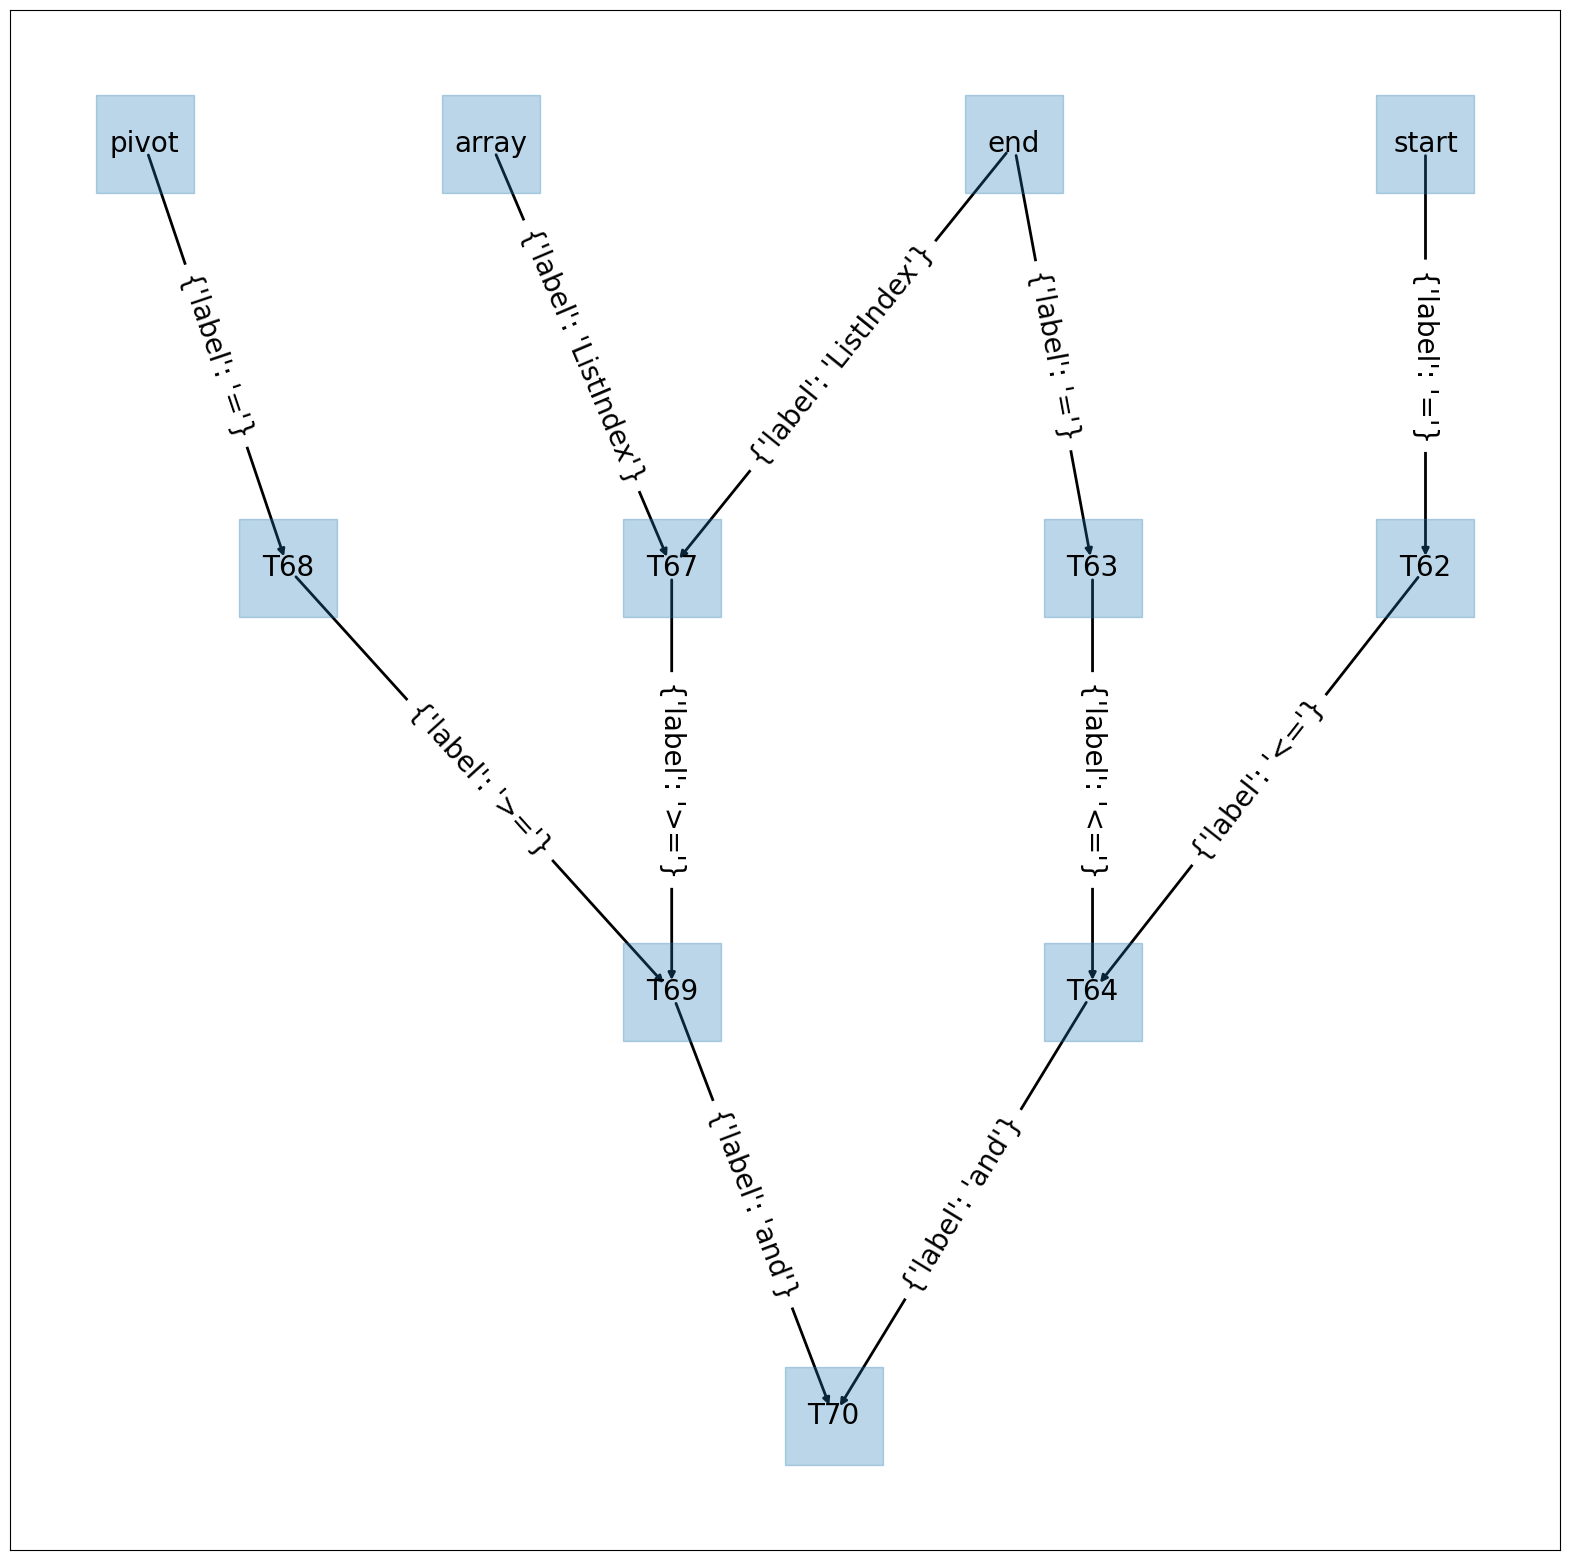

[48: Label, None, None, L3, 49: If False, T70, None, L4]
['L4', 'T70', 'L3']


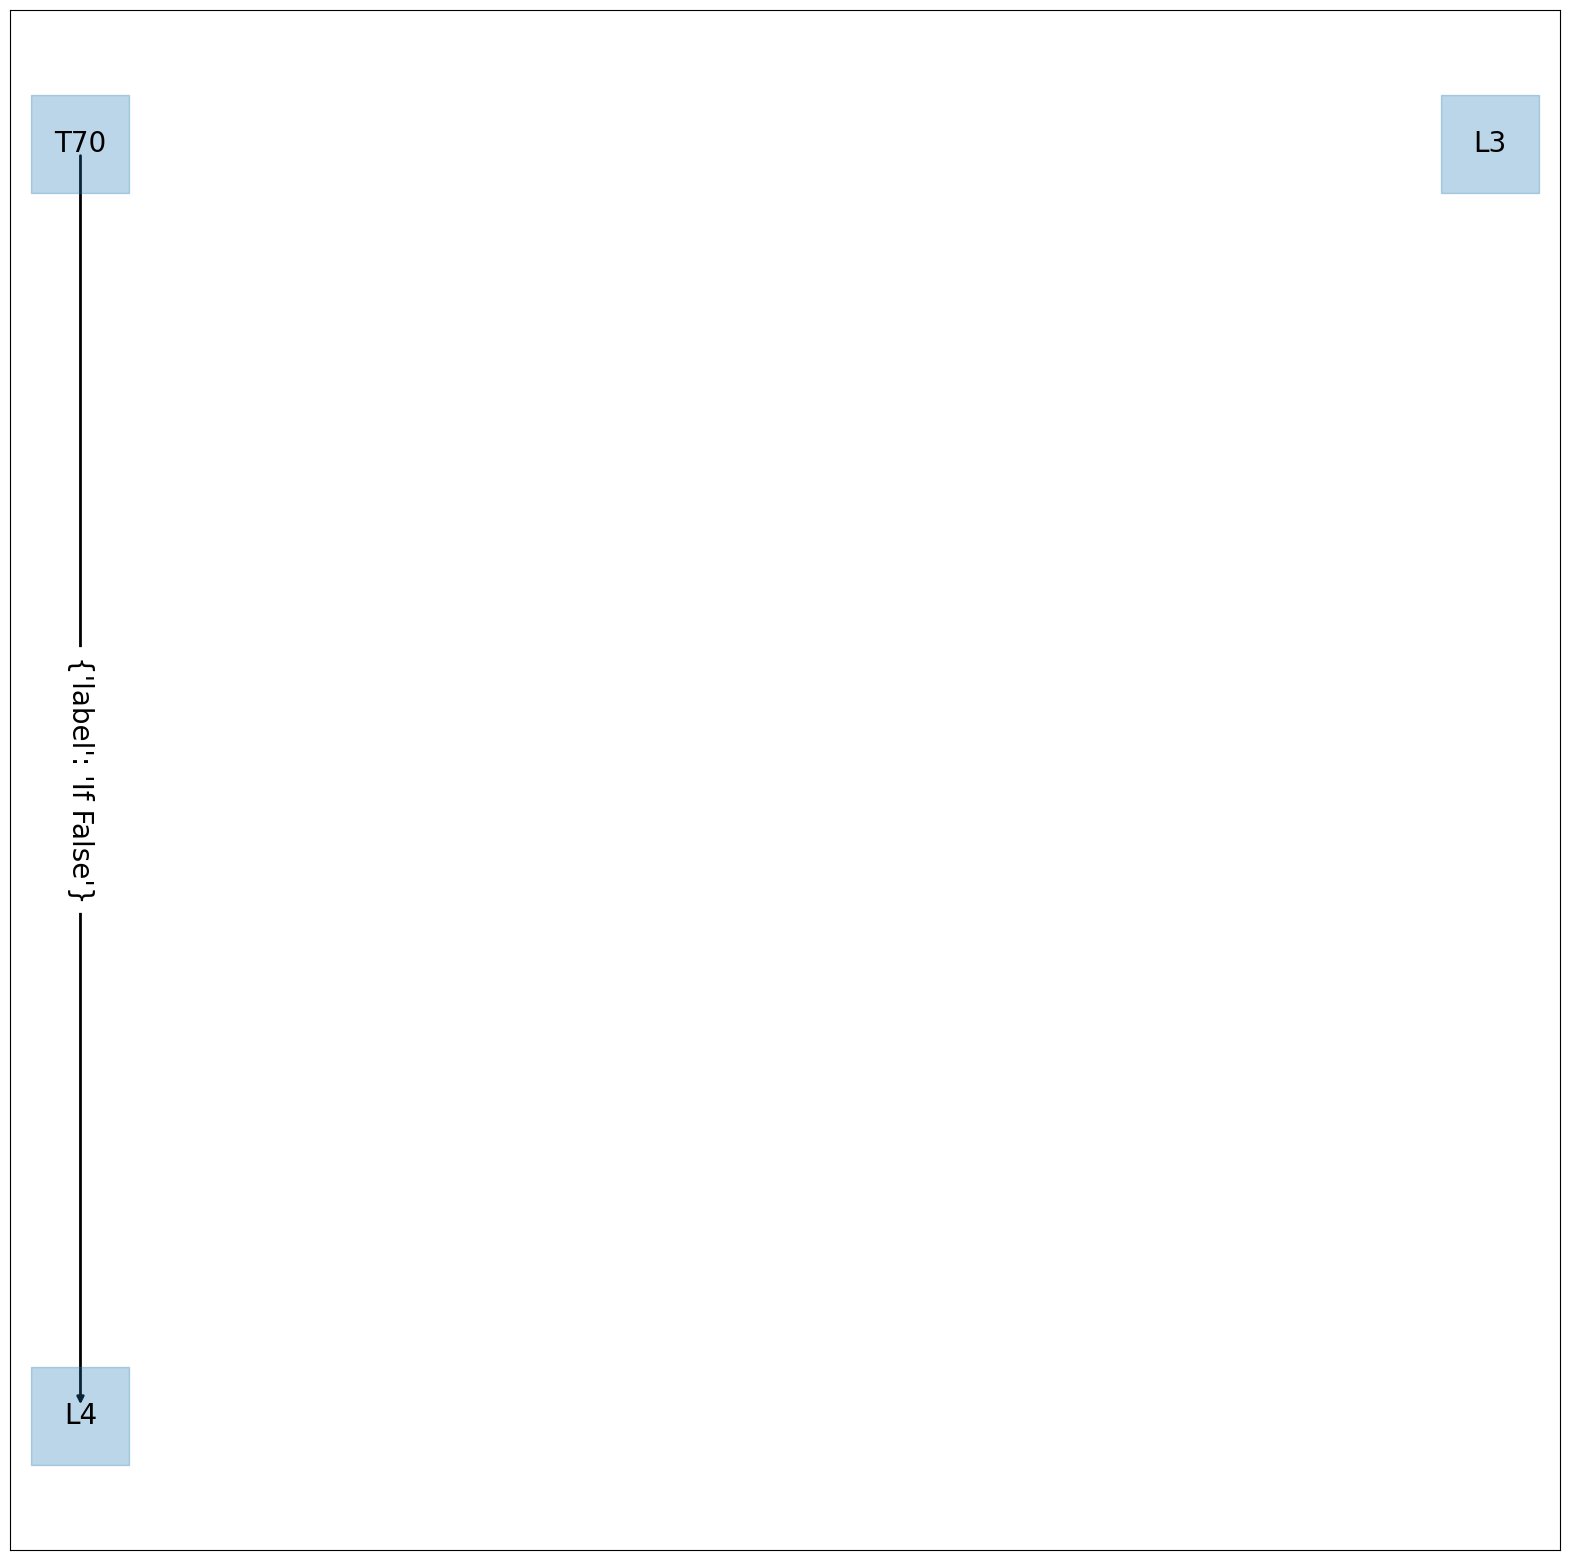

[50: =, end, None, T71,
 52: -, T71, 1, T73,
 53: =, T73, None, end,
 54: =, start, None, T76,
 55: =, end, None, T77,
 56: <=, T76, T77, T78,
 57: ListIndex, array, start, T81,
 58: =, pivot, None, T82,
 59: <=, T81, T82, T83,
 60: and, T78, T83, T84]
['T81', 'T73', 'T83', 'array', 'T84', 'T71', 'T76', '1', 'T77', 'T78', 'start', 'T82', 'pivot', 'end']


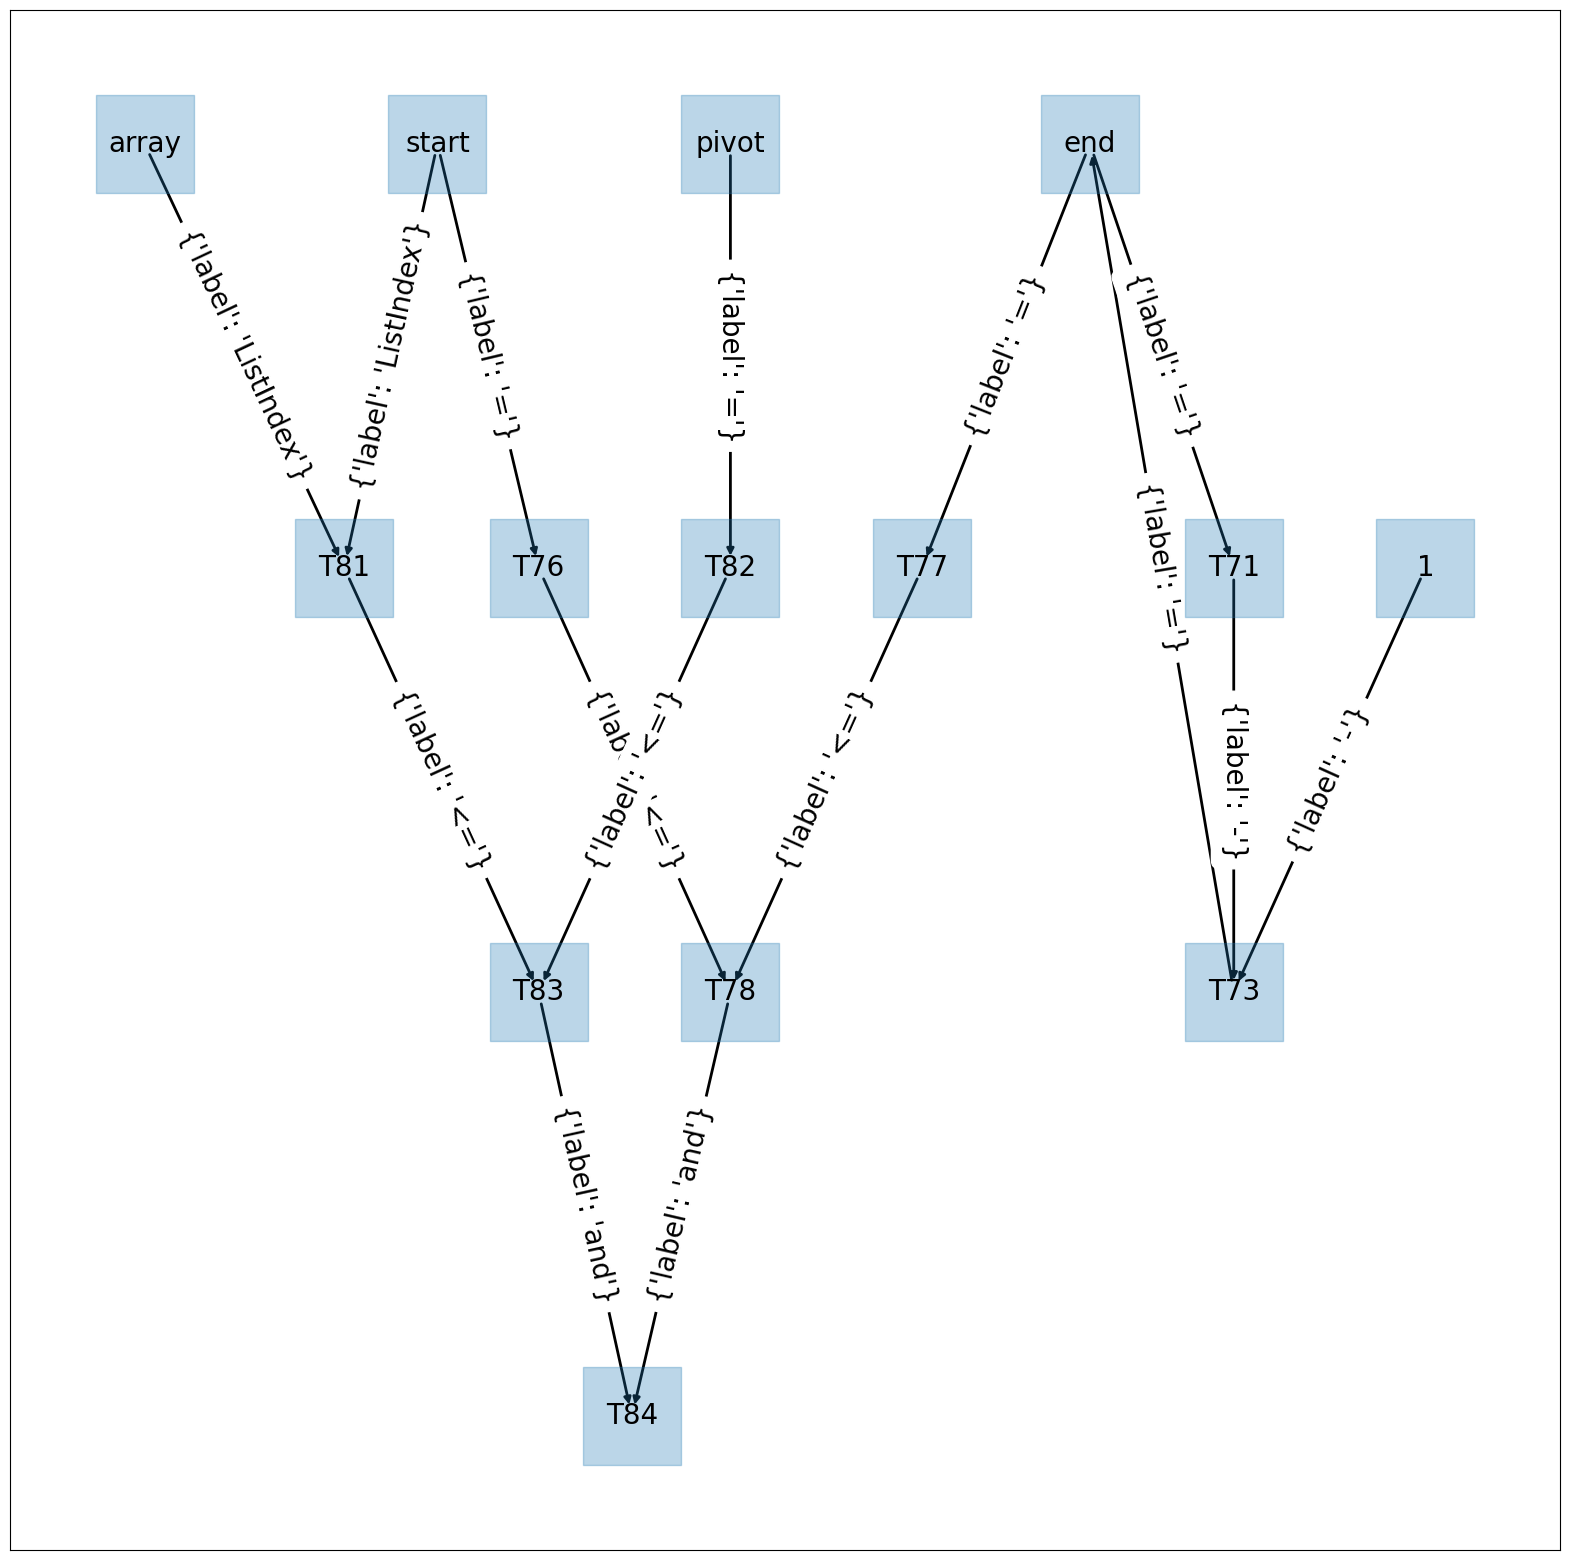

[61: Label, None, None, L5, 62: If False, T84, None, L6]
['T84', 'L5', 'L6']


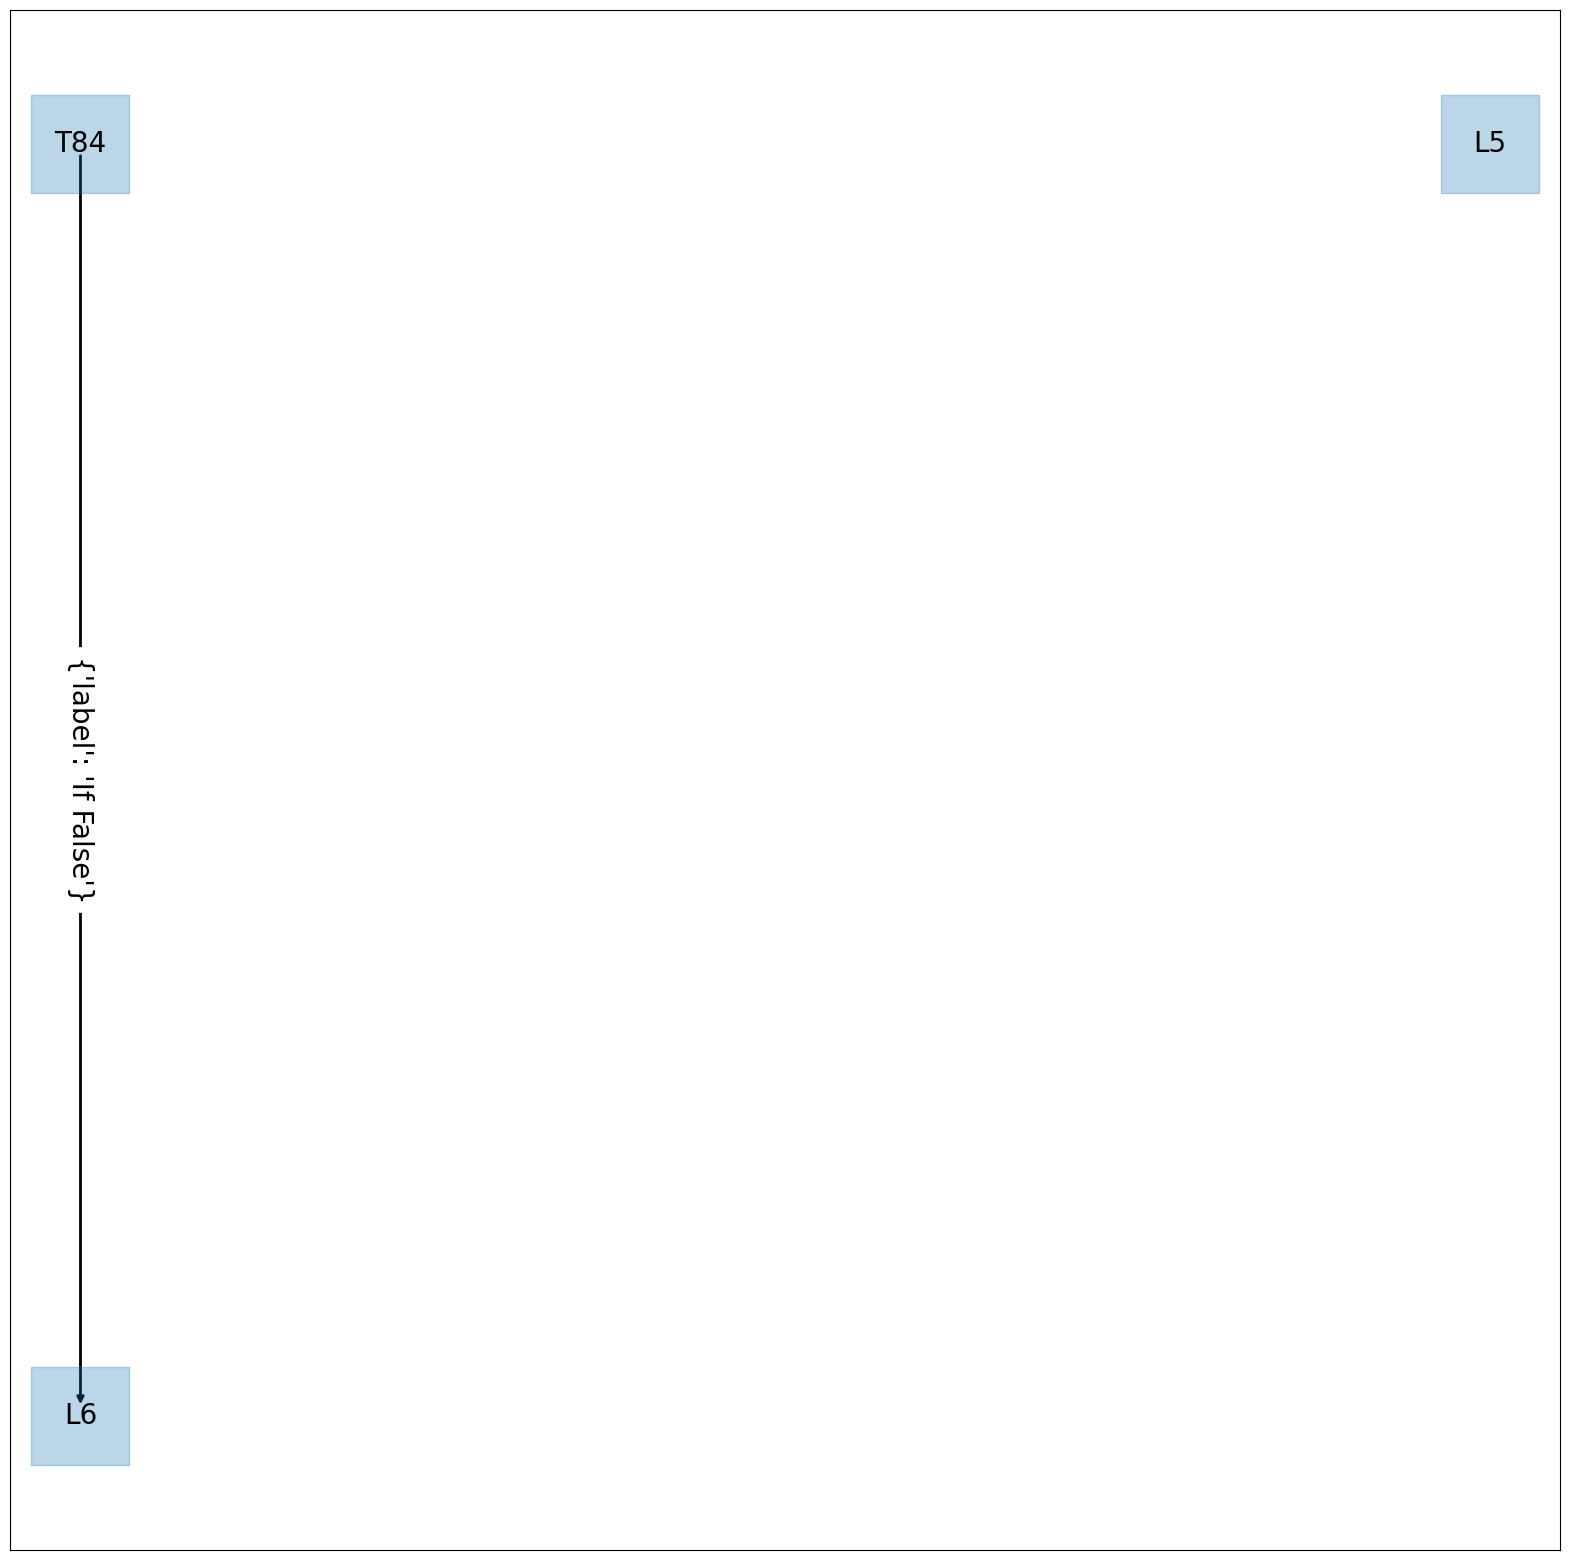

[63: =, start, None, T85,
 65: +, T85, 1, T87,
 66: =, T87, None, start,
 67: =, start, None, T90,
 68: =, end, None, T91,
 69: <=, T90, T91, T92,
 70: If False, T92, None, L7]
['L7', 'T91', 'T92', 'T85', '1', 'start', 'T87', 'end', 'T90']


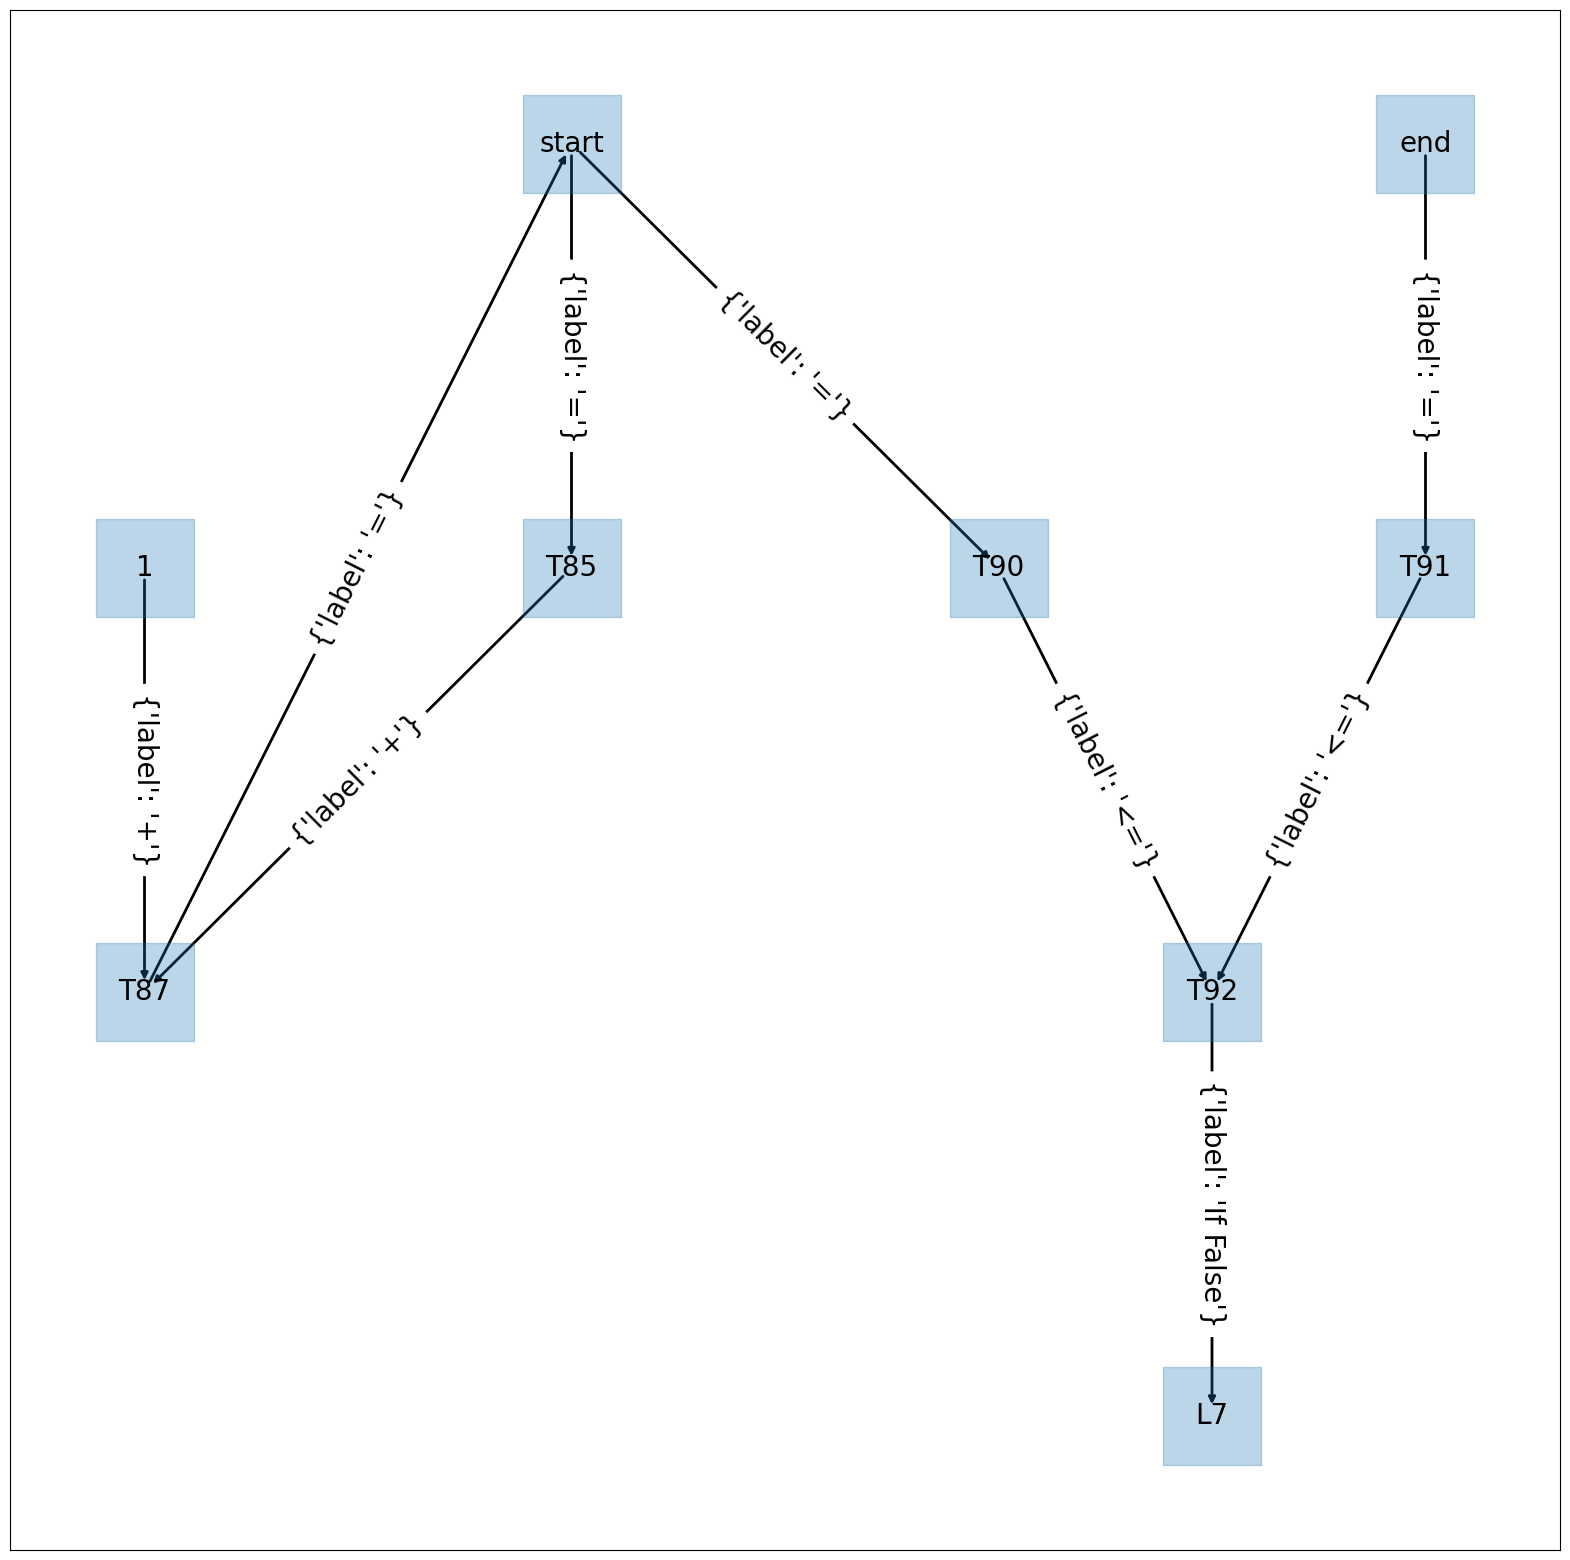

[71: ListIndex, array, start, T95,
 72: =, T95, None, temp,
 73: ListIndex, array, end, T100,
 74: =, T100, None, temp1,
 75: ListAssign, start, temp1, array,
 76: ListAssign, end, temp, array,
 77: goto, None, None, L8]
['T95', 'array', 'temp1', 'L8', 'T100', 'start', 'temp', 'end']


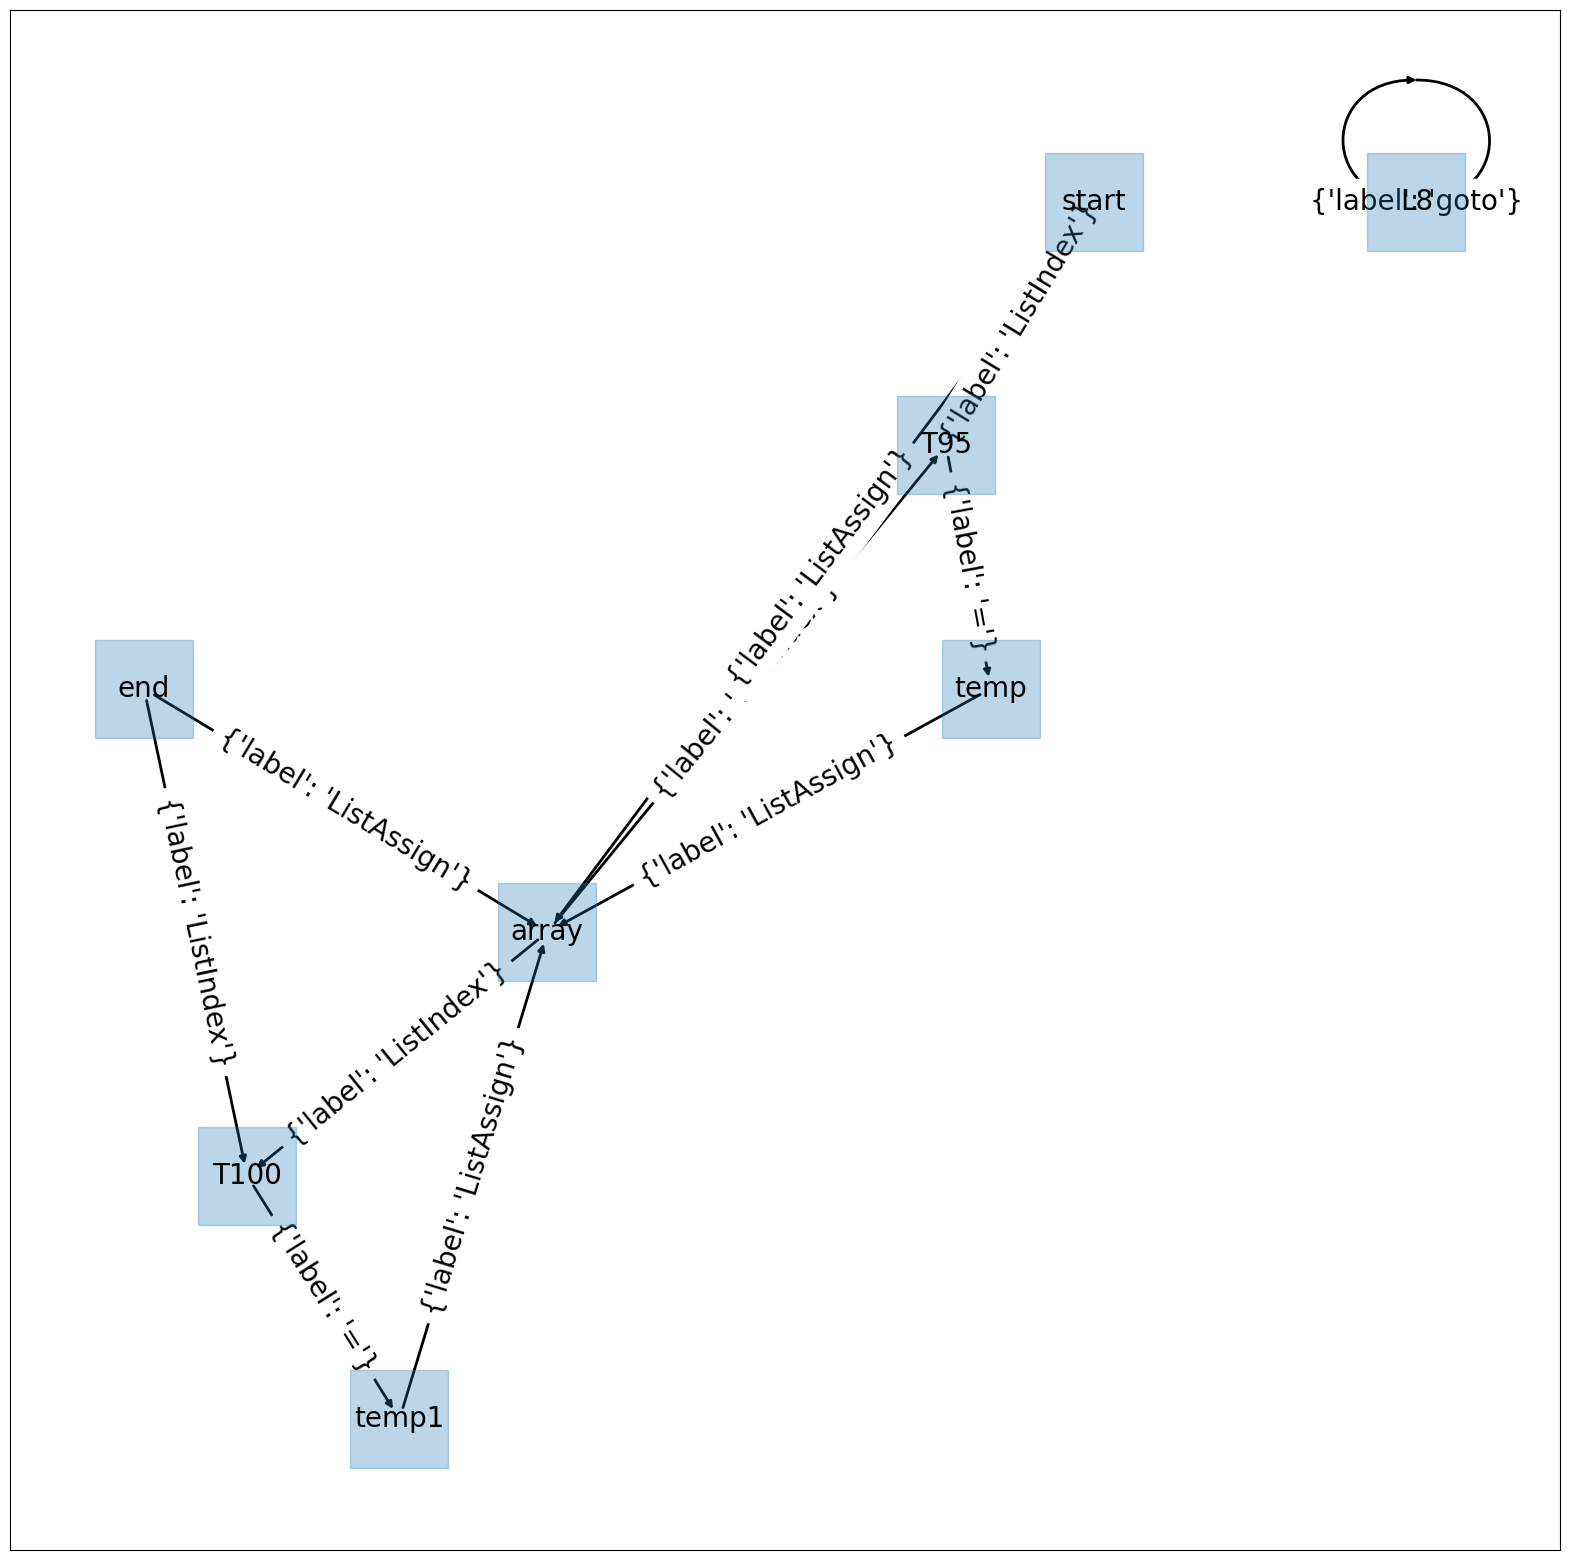

[78: Label, None, None, L7, 79: goto, None, None, L7]
['L7']


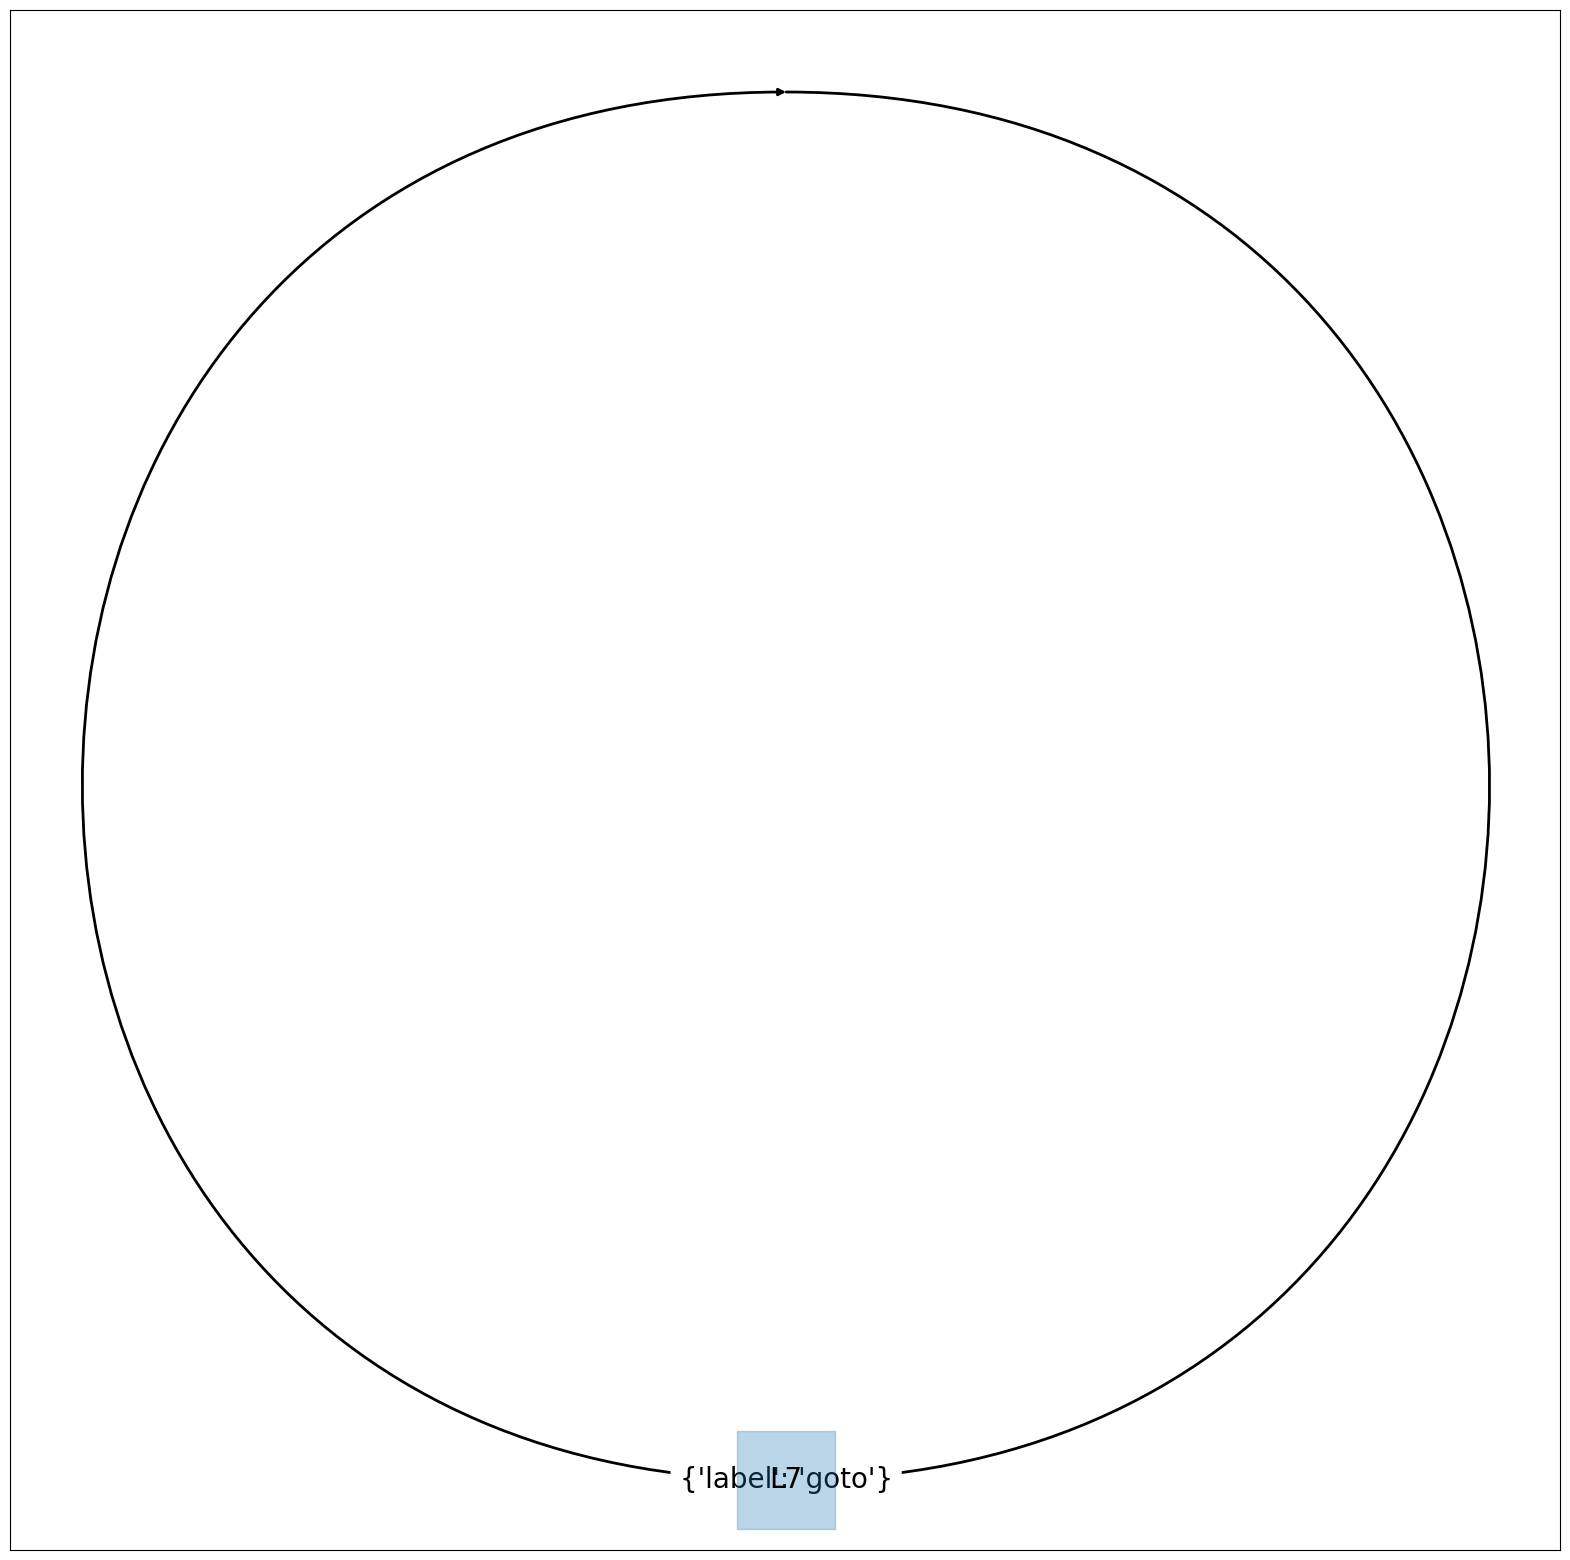

[80: ListIndex, array, low, T119, 81: =, T119, None, temp]
['low', 'T119', 'array', 'temp']


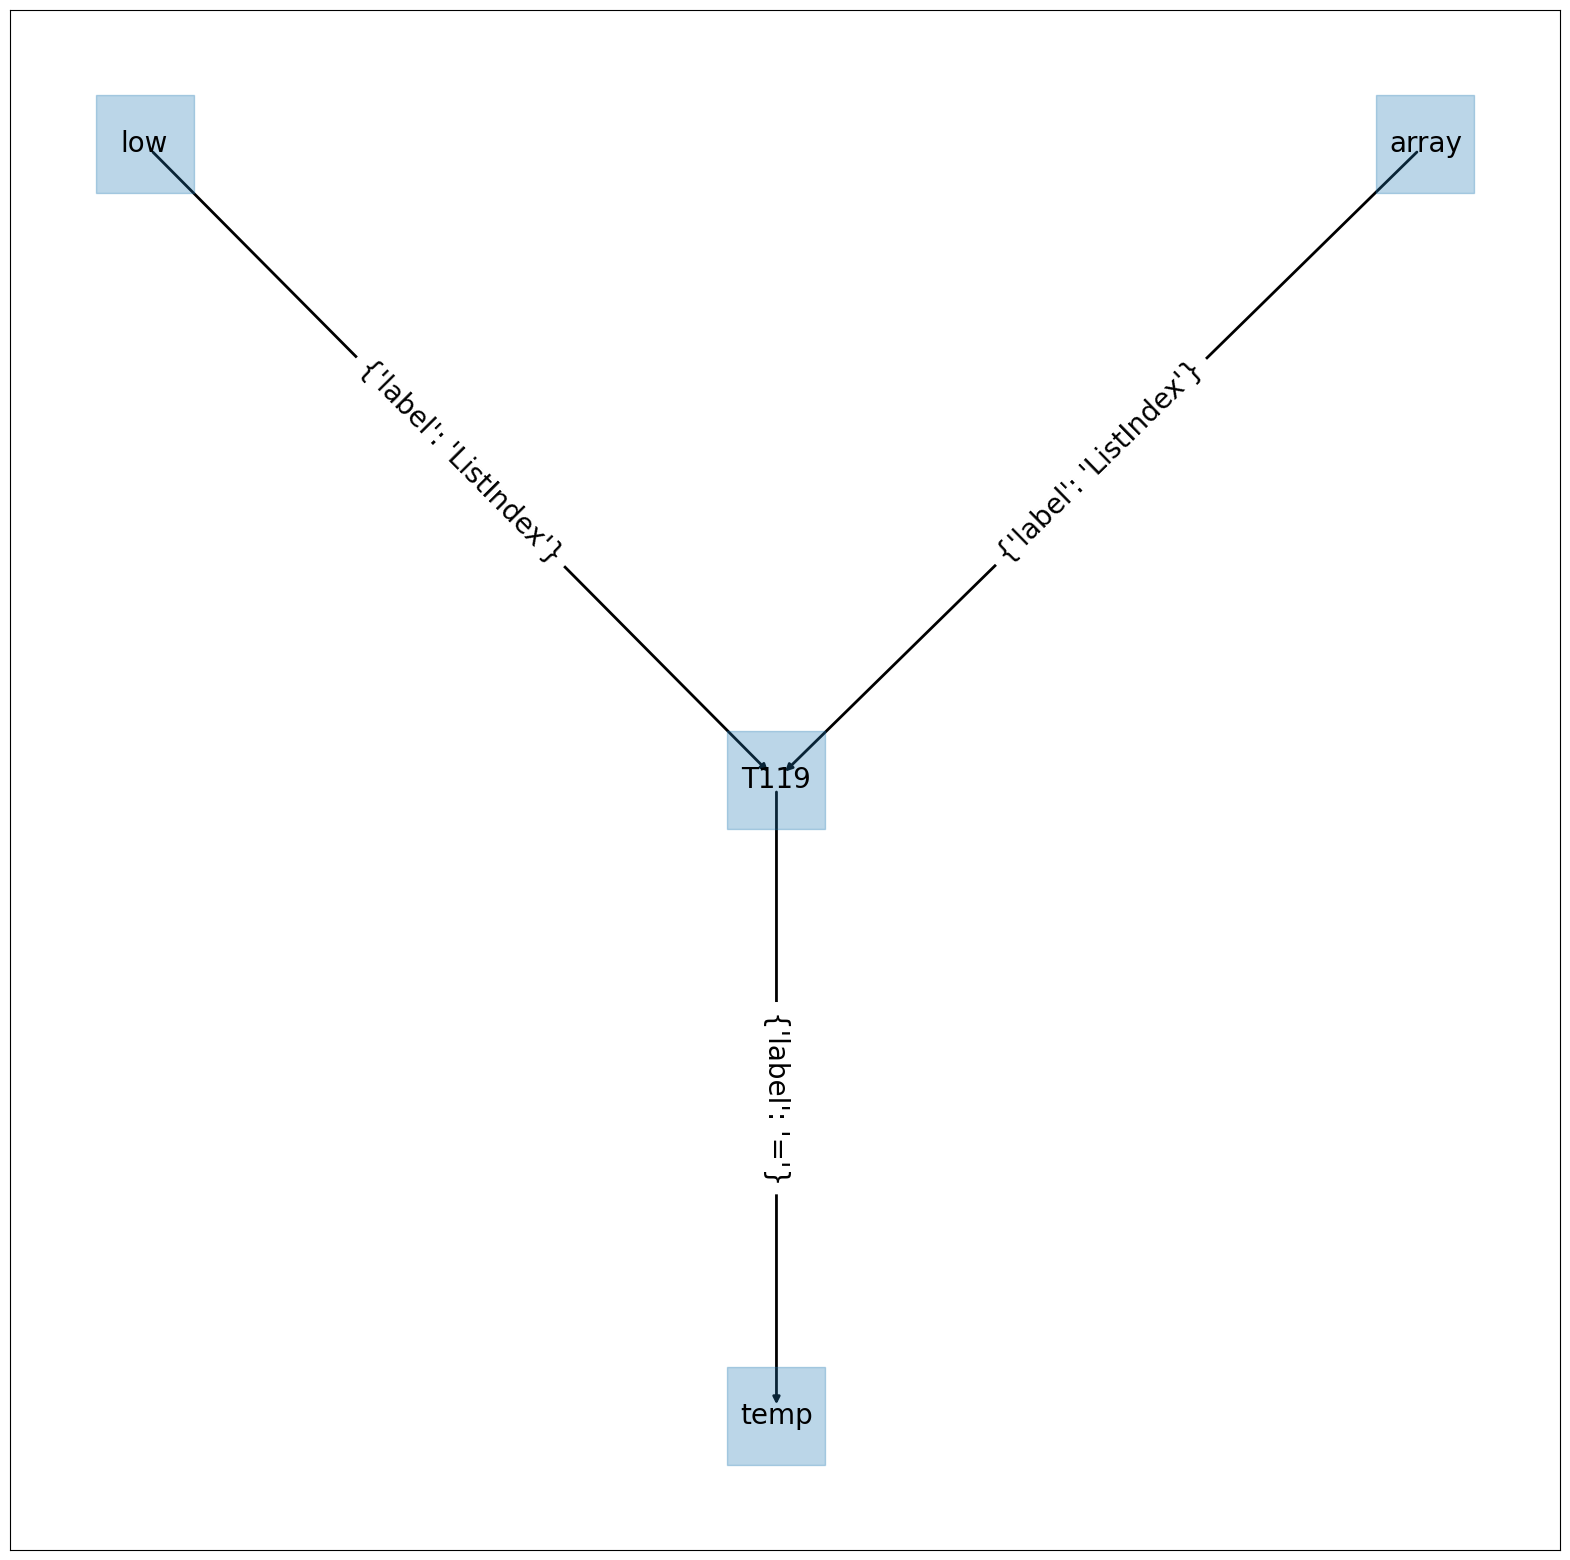

[82: Label, None, None, L8, 83: goto, None, None, L5]
['L8', 'L5']


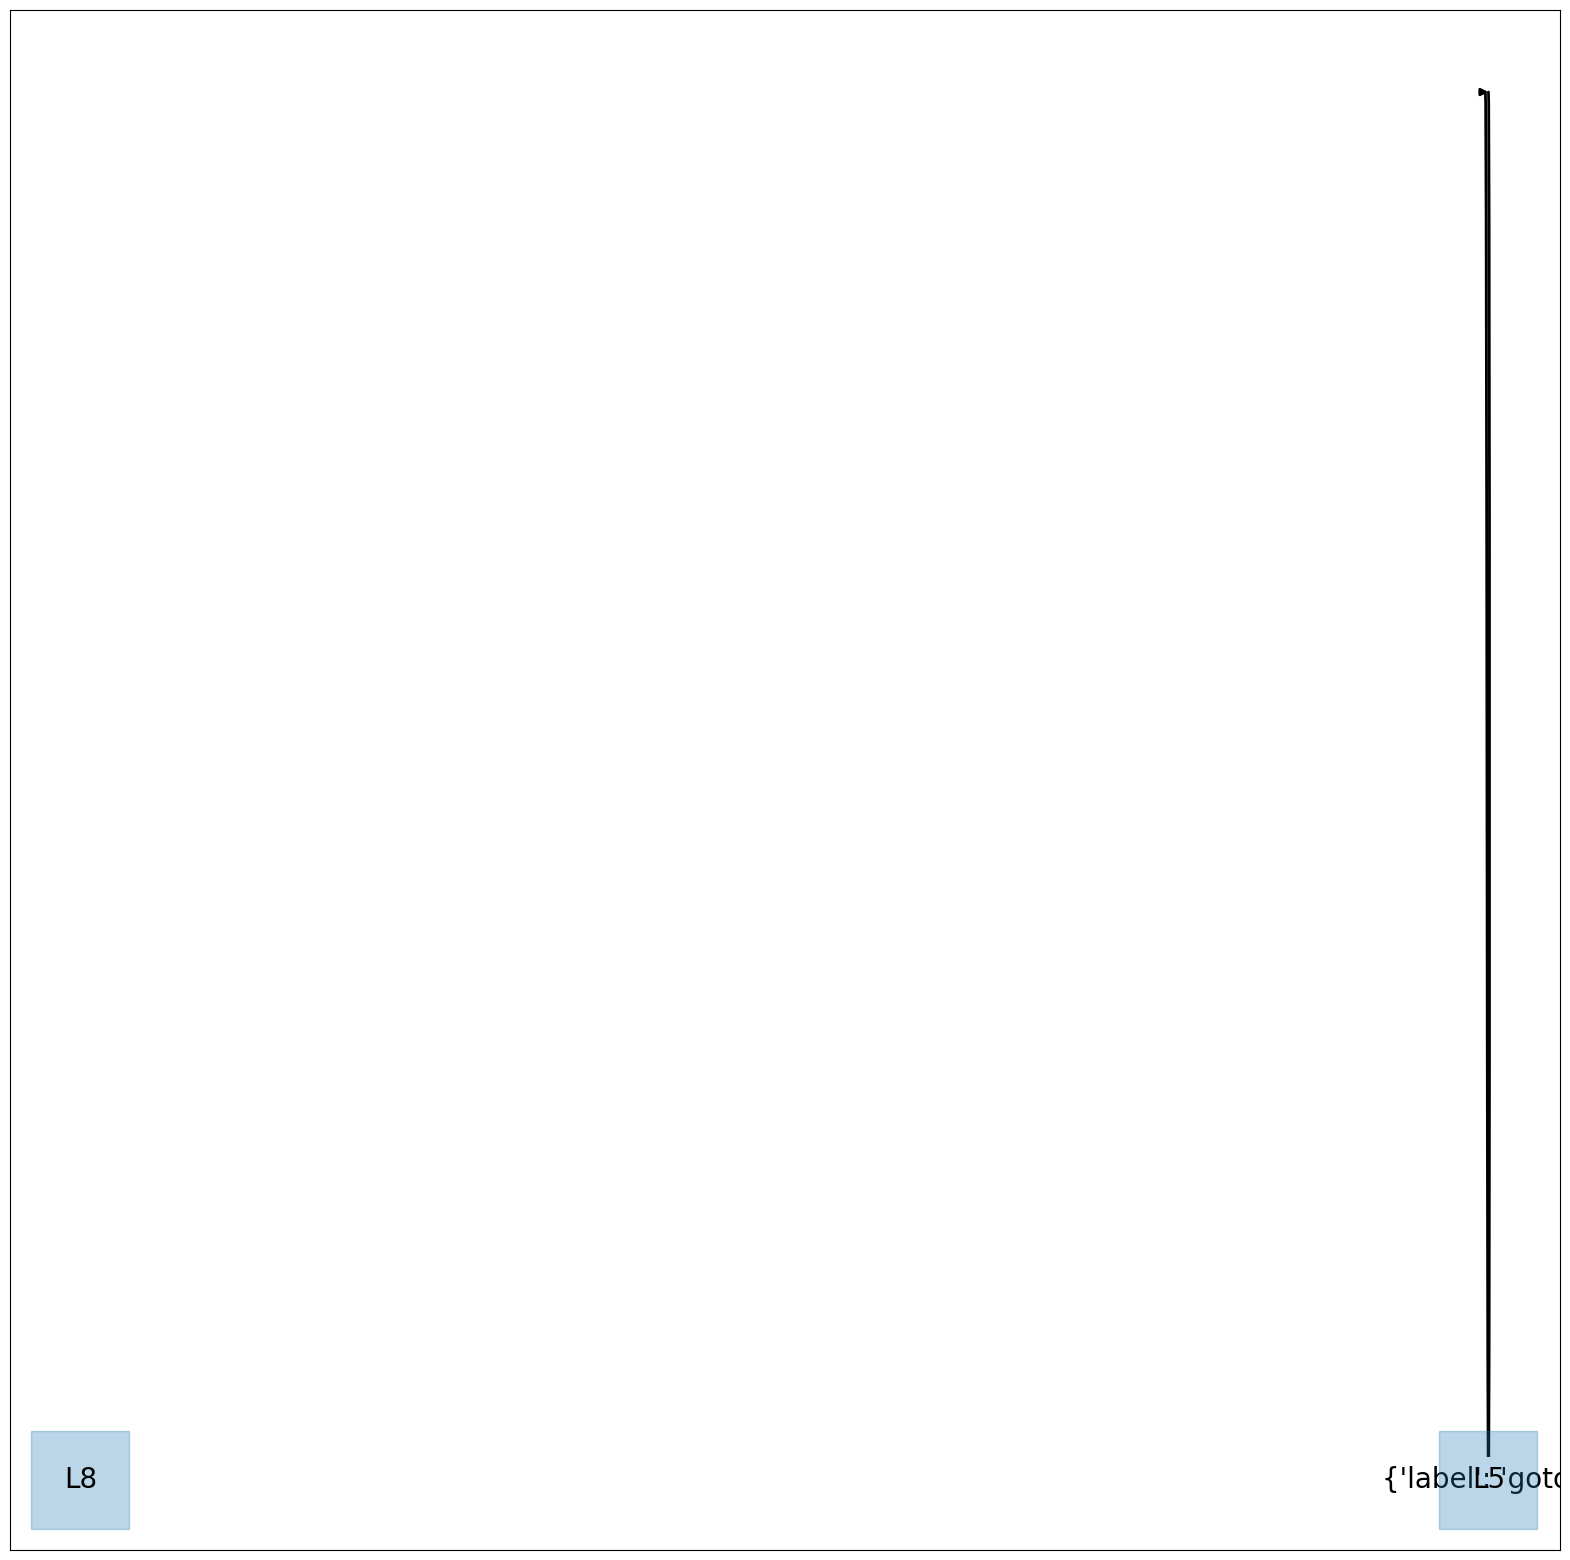

[84: Label, None, None, L6, 85: goto, None, None, L3]
['L3', 'L6']


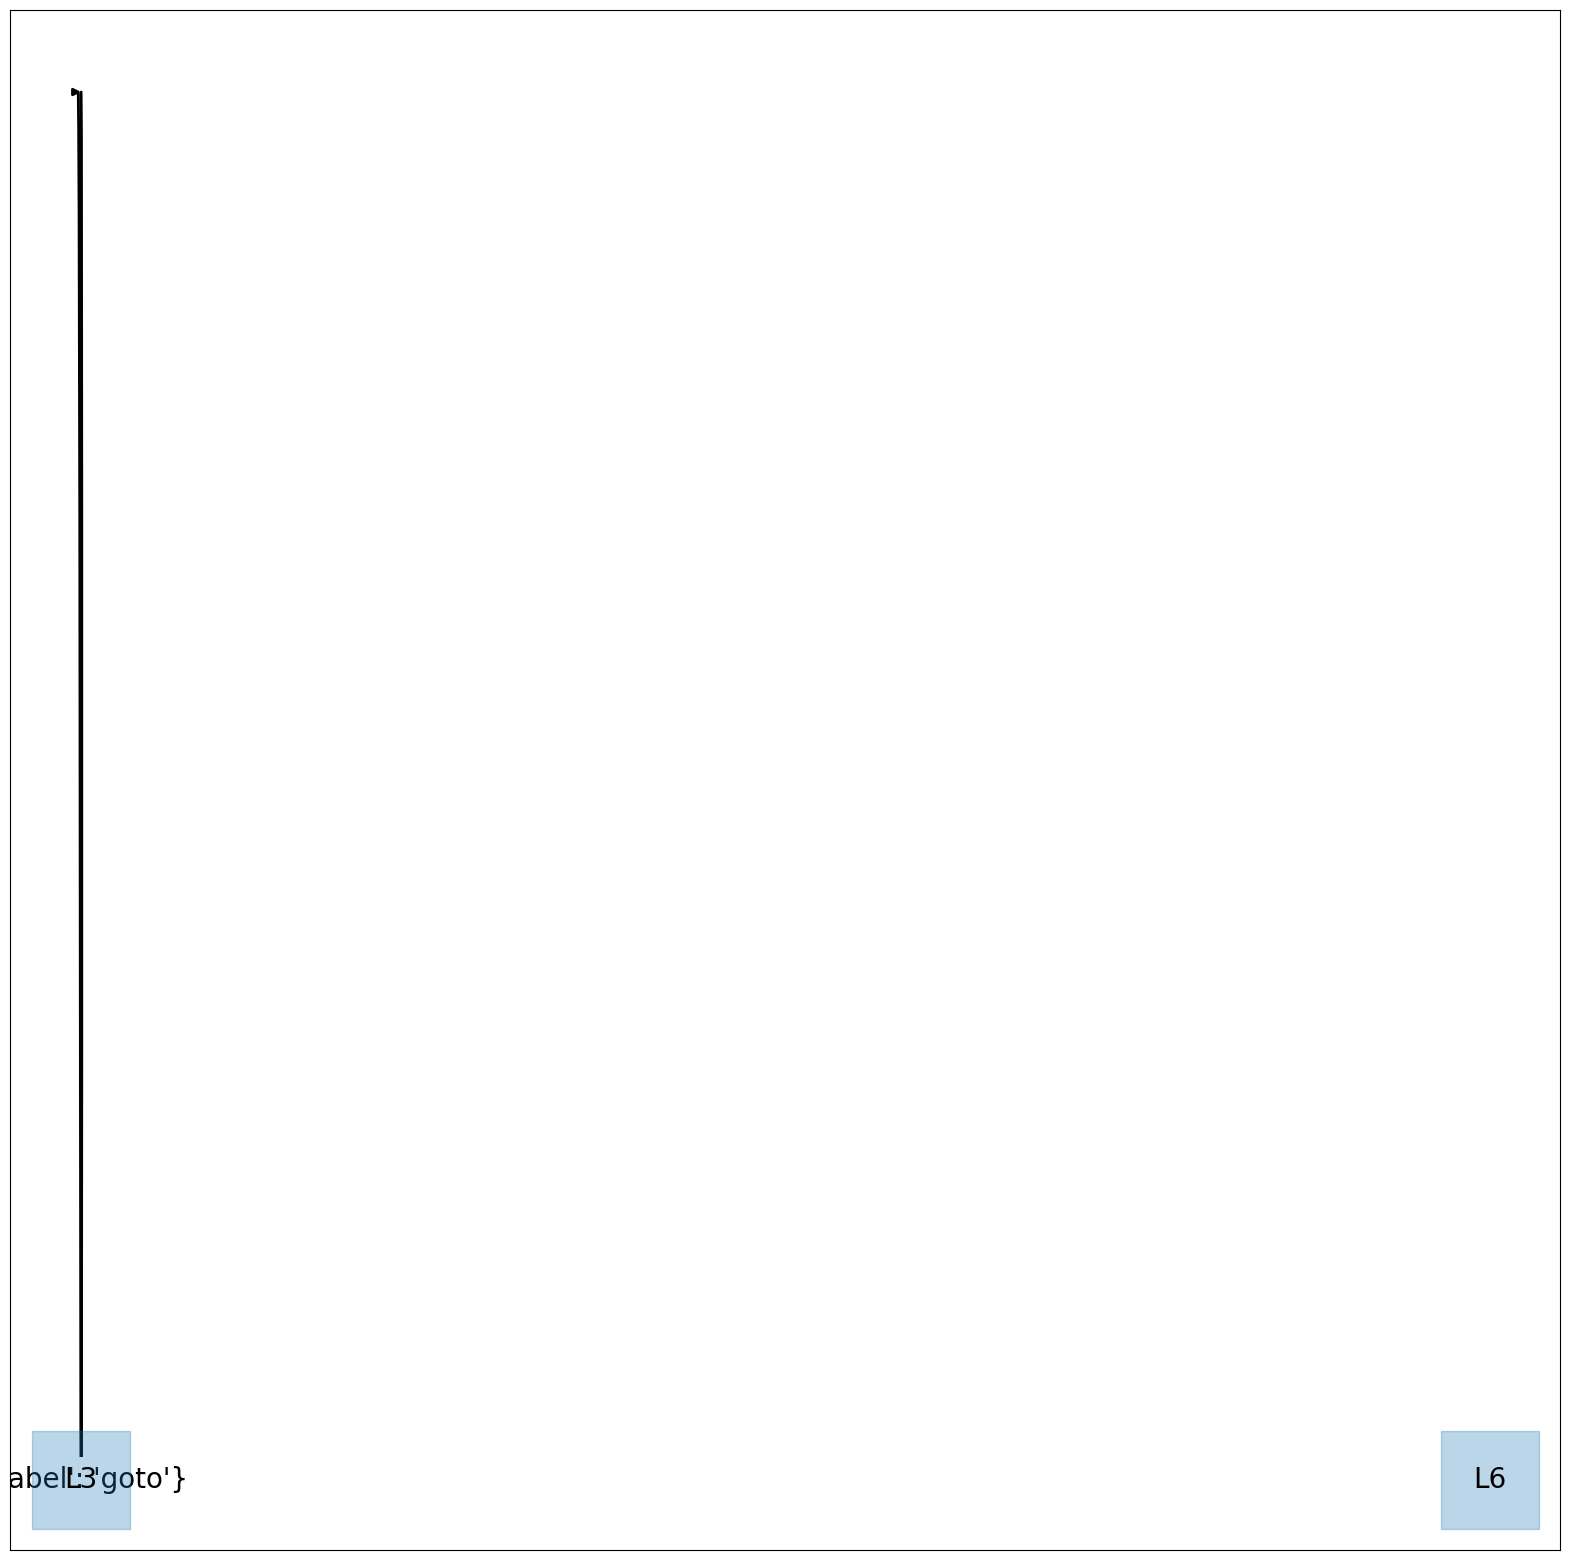

[86: Label, None, None, L4,
 87: ListIndex, array, end, T134,
 88: =, T134, None, temp1,
 89: ListAssign, low, temp1, array,
 90: ListAssign, end, temp, array,
 -1: =, end, None, T145,
 -1: -, T145, 1, T147,
 -1: =, T147, None, idx,
 95: Param, array, None, None,
 96: Param, array, None, None,
 97: Param, start, None, None,
 98: Call, quick_sort, 3, T154,
 -1: +, T155, 1, T157,
 -1: =, T157, None, idx,
 103: Param, array, None, None,
 104: Param, array, None, None,
 105: Param, idx, None, None,
 106: Call, quick_sort, 3, T164,
 107: return, None, None, None,
 108: goto, None, None, L1]
['L4', 'idx', 'low', 'quick_sort', 'T164', 'temp', 'array', 'temp1', 'T134', '1', '3', 'T157', 'T154', 'start', 'T155', 'T145', 'L1', 'T147', 'end']


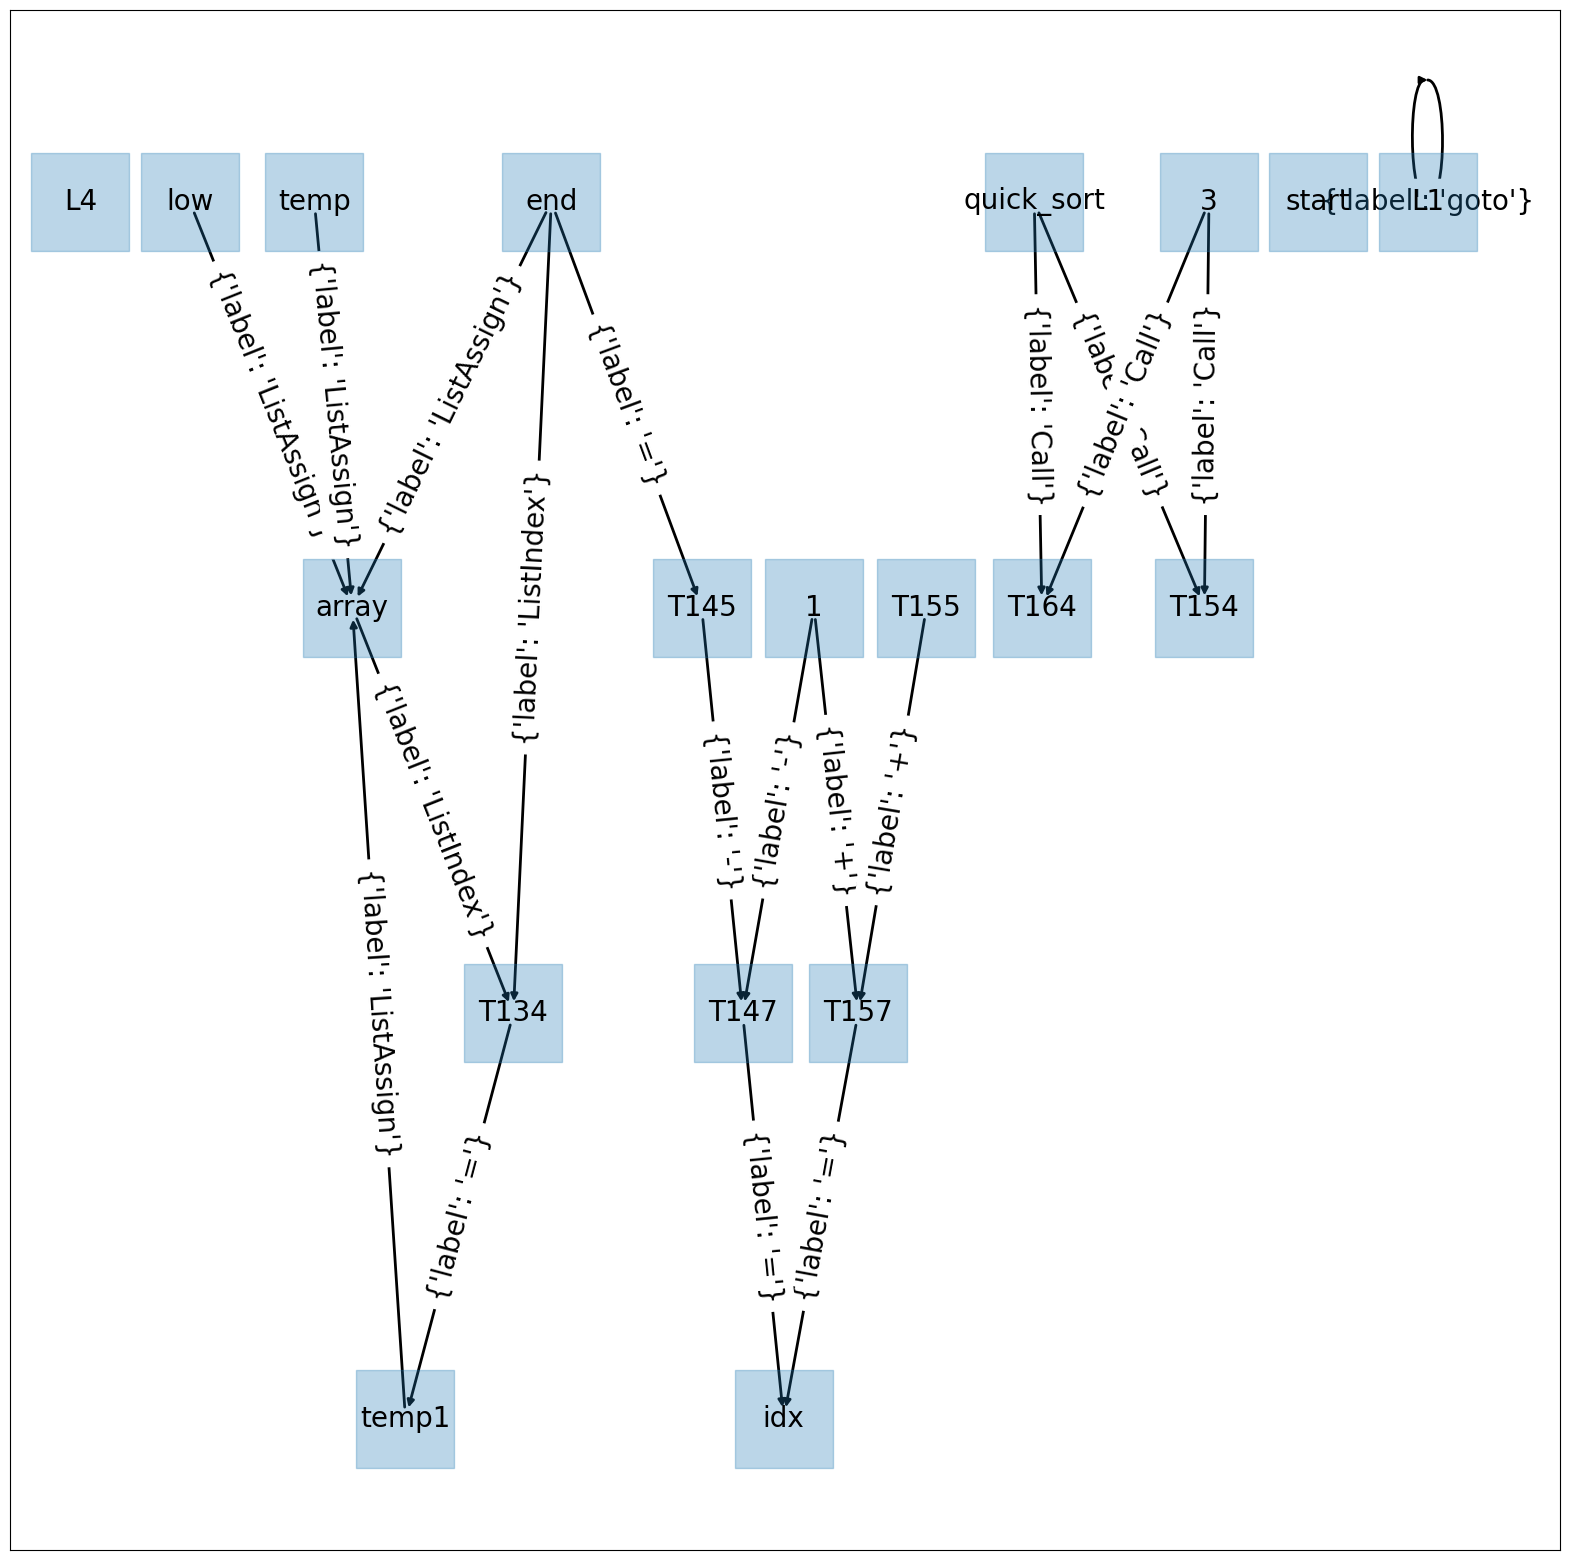

[109: Label, None, None, L2]
['L2']


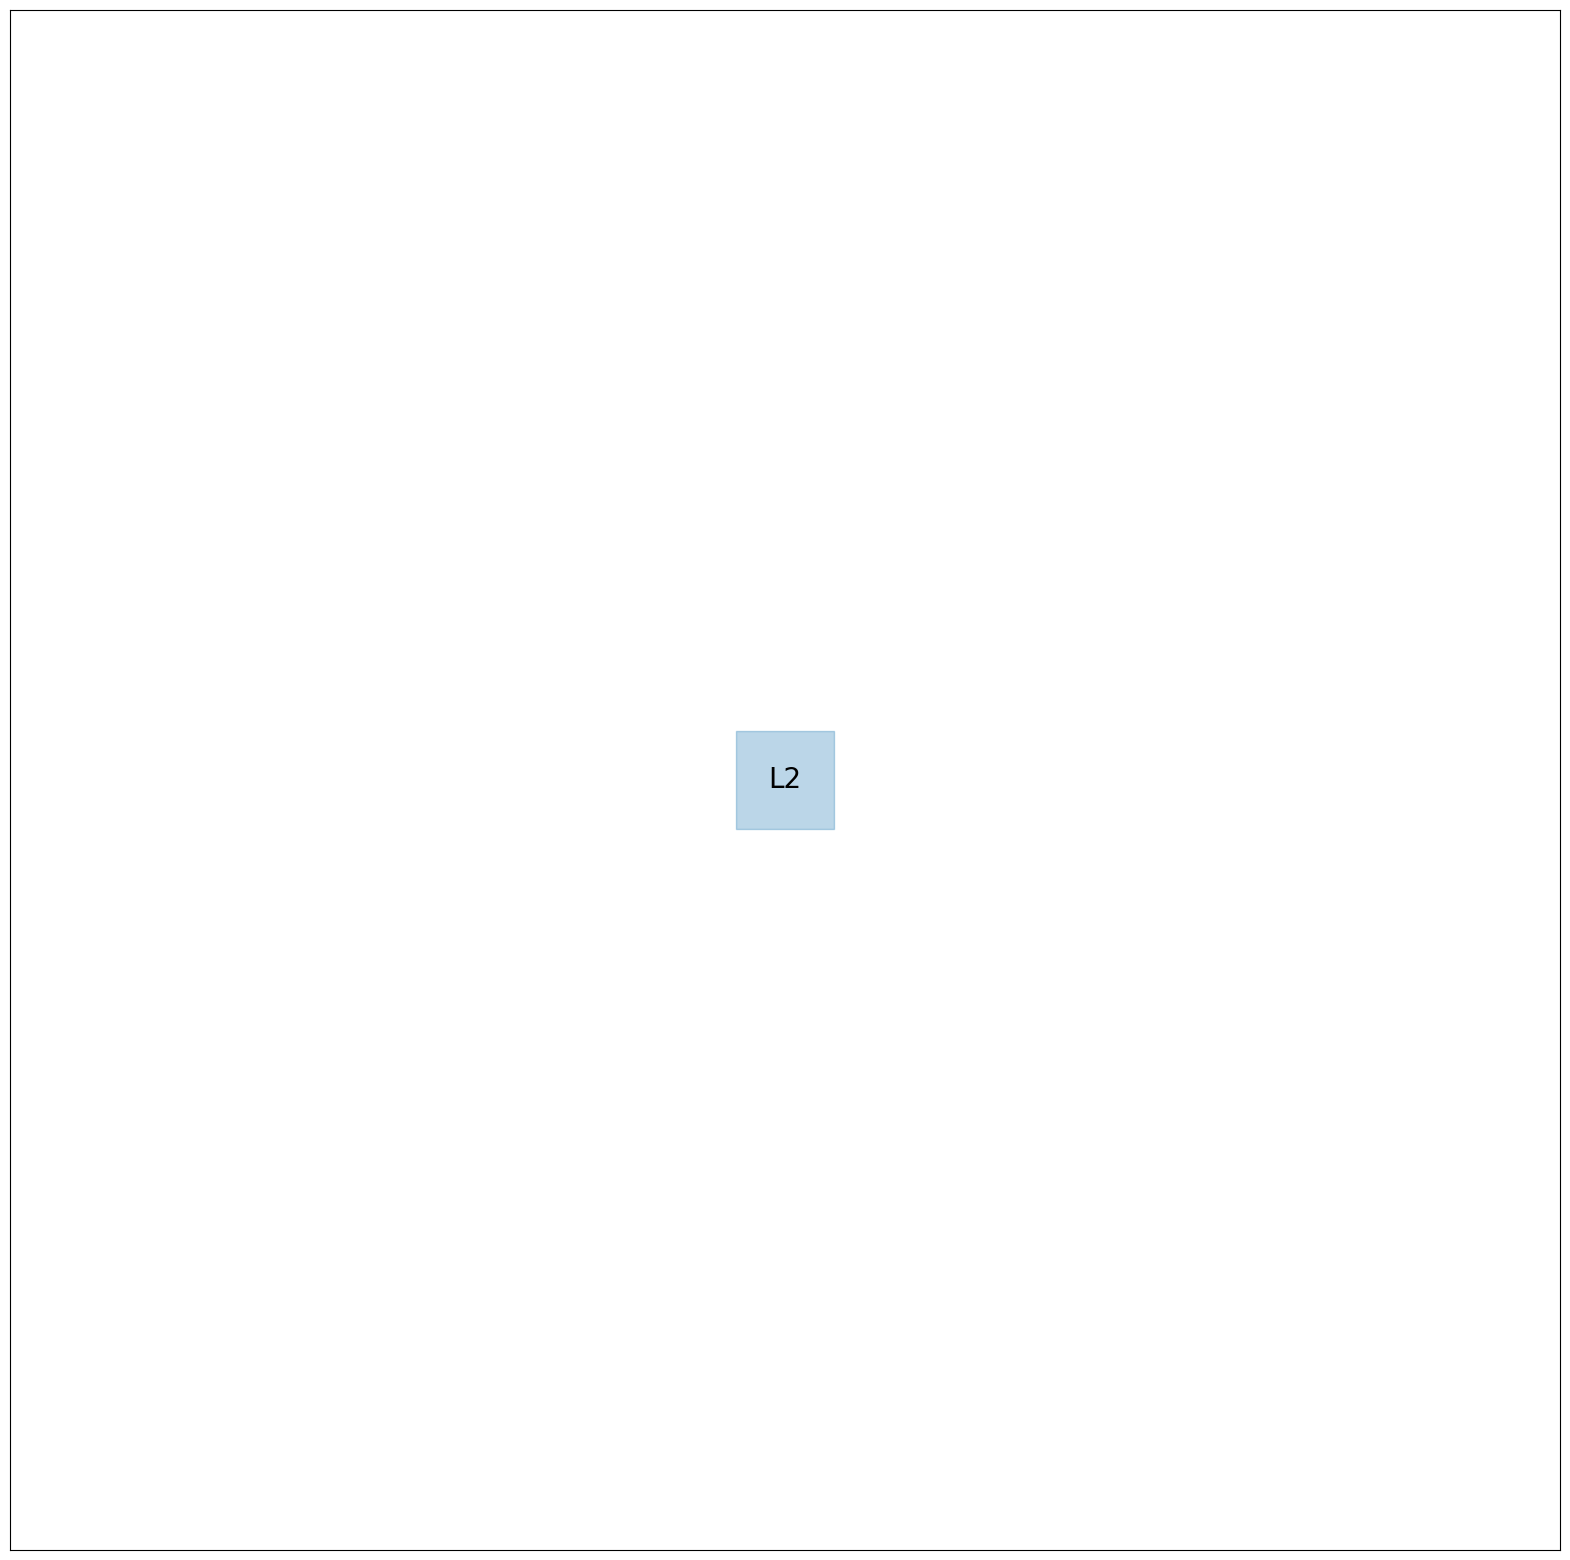

[110: Label, None, None, L0, 111: EndF, quick_sort, None, None]
['quick_sort', 'L0']


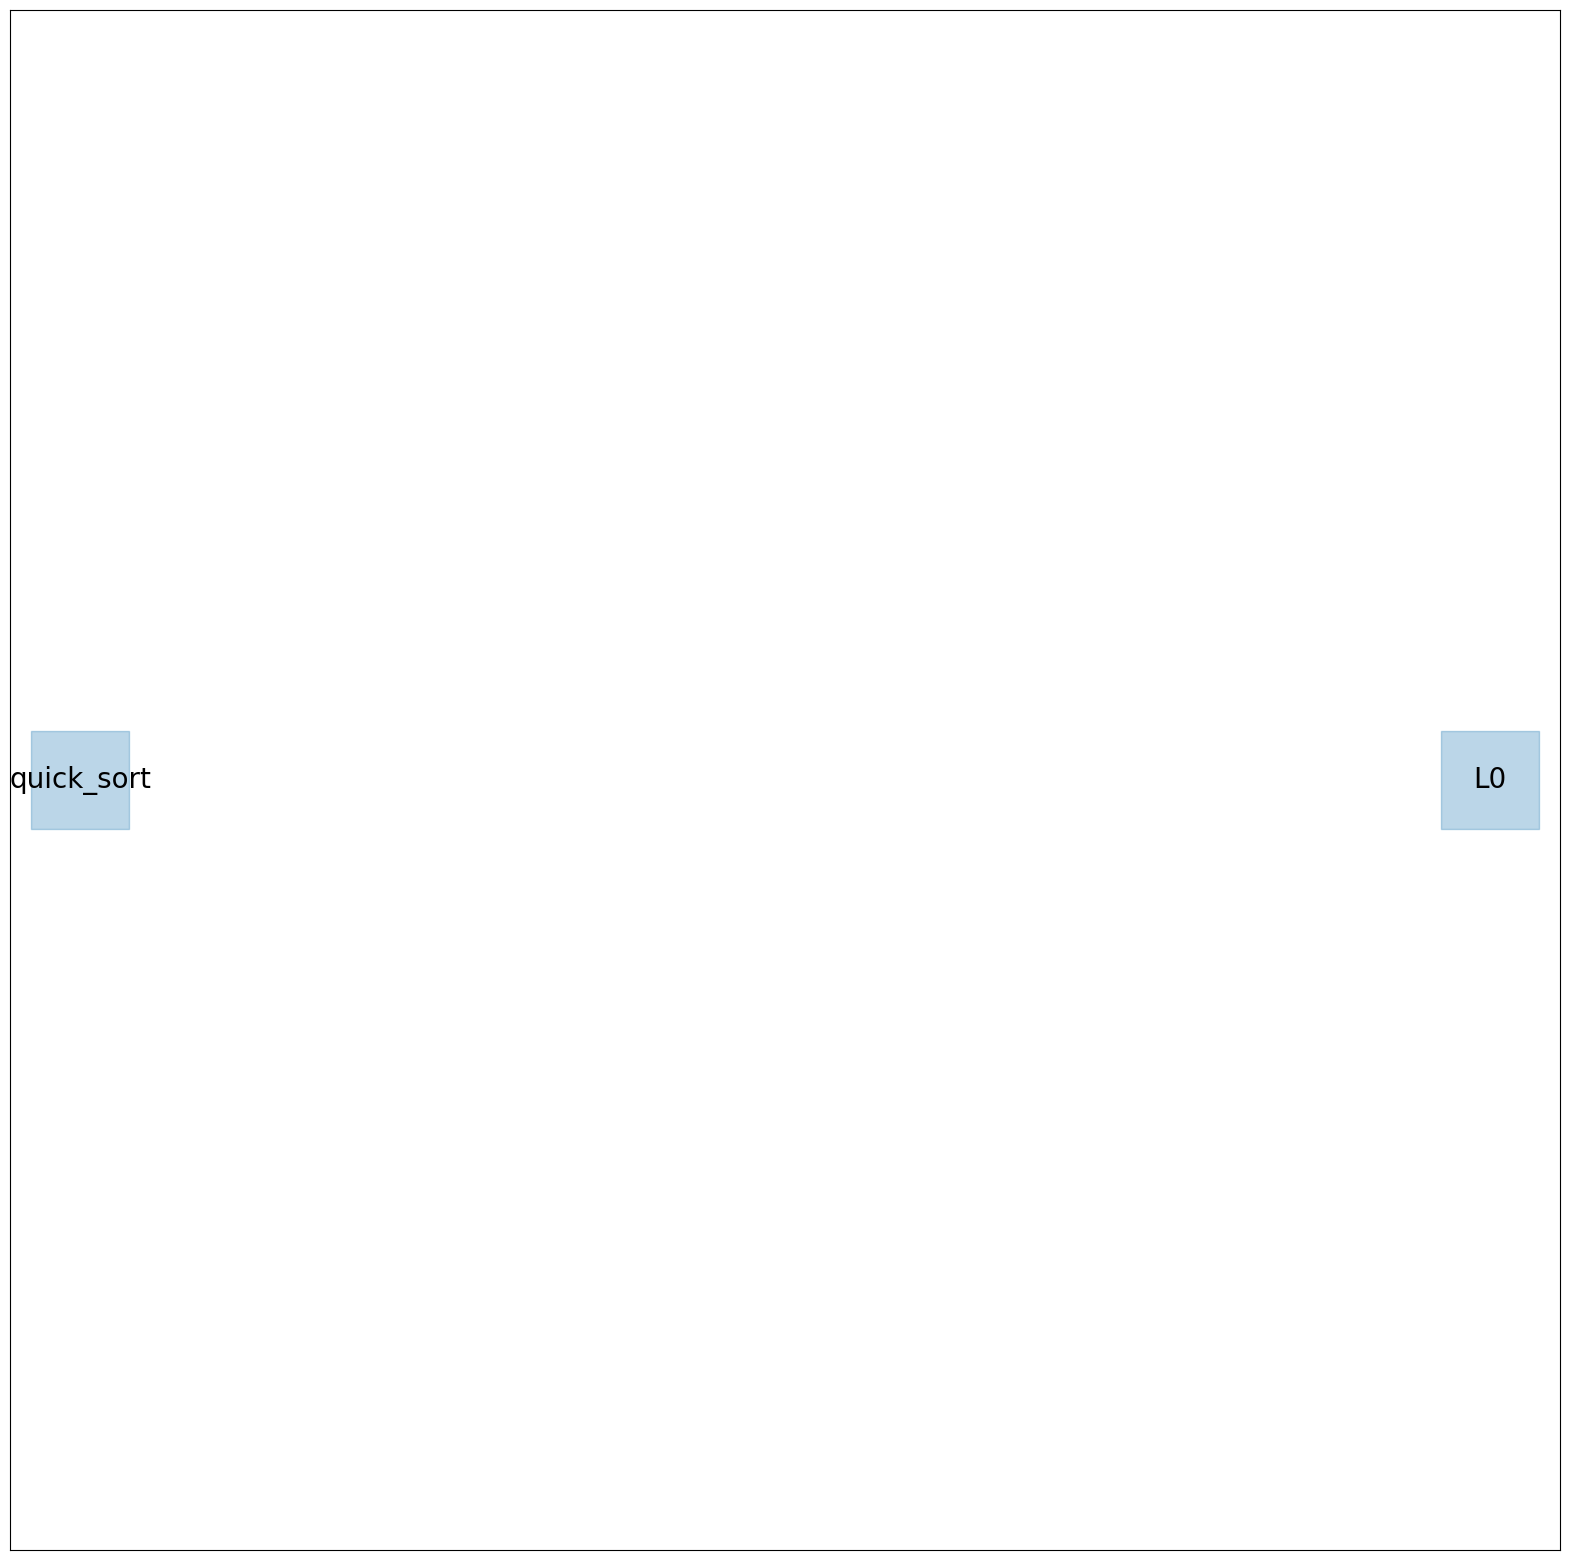

In [43]:
for i in tot_icg:
	pprint(i)
	plot_DAG(i)

In [44]:
blocks

[[['0', '=', '1', None, 'T10'],
  ['1', '-', 'T10', None, 'T11'],
  ['2', '=', 'T11', None, 'low'],
  ['-1', '=', '10', None, 'T14'],
  ['-1', '=', 'T14', None, 'x'],
  ['-1', '=', '10', None, 'T17'],
  ['-1', '=', 'T17', None, 'y'],
  ['7', '=', '1', None, 'T20'],
  ['8', '-', 'T20', None, 'T21'],
  ['9', '=', 'T21', None, 'high'],
  ['10', '=', '1', None, 'T24'],
  ['11', '-', 'T24', None, 'T25'],
  ['12', '=', 'T25', None, 'temp'],
  ['13', '=', '1', None, 'T28'],
  ['14', '-', 'T28', None, 'T29'],
  ['15', '=', 'T29', None, 'temp1'],
  ['-1', '=', '1', None, 'T32'],
  ['-1', '-', 'T32', None, 'T33'],
  ['-1', '=', 'T33', None, 'idx'],
  ['19', '=', '1', None, 'T36'],
  ['20', '-', 'T36', None, 'T37'],
  ['21', '=', 'T37', None, 'start'],
  ['22', '=', '1', None, 'T40'],
  ['23', '-', 'T40', None, 'T41'],
  ['24', '=', 'T41', None, 'end'],
  ['112', 'Param', 'array', None, None],
  ['113', 'Param', 'array', None, None],
  ['114', 'Param', '0', None, None],
  ['115', 'Call', 'quick_s

In [45]:
pprint(tot_icg)

[[1: -, 1, None, T11,
  9: =, 1, None, high,
  15: =, 1, None, temp1,
  23: -, 1, None, T41,
  24: =, 1, None, end,
  112: Param, array, None, None,
  113: Param, array, None, None,
  114: Param, 0, None, None,
  115: Call, quick_sort, 3, T190],
 [25: BeginF, quick_sort, None, None,
  26: =, low, None, T45,
  27: =, high, None, T46,
  28: <, T45, T46, T47,
  29: If False, T47, None, L0],
 [30: ListIndex, array, low, T50,
  31: =, T50, None, pivot,
  32: =, low, None, T53,
  34: +, T53, 1, T55,
  35: =, T55, None, start,
  36: =, high, None, T58,
  37: =, T58, None, end,
  38: =, True, None, T61],
 [39: Label, None, None, L1, 40: If False, T61, None, L2],
 [41: =, start, None, T62,
  42: =, end, None, T63,
  43: <=, T62, T63, T64,
  44: ListIndex, array, end, T67,
  45: =, pivot, None, T68,
  46: >=, T67, T68, T69,
  47: and, T64, T69, T70],
 [48: Label, None, None, L3, 49: If False, T70, None, L4],
 [50: =, end, None, T71,
  52: -, T71, 1, T73,
  53: =, T73, None, end,
  54: =, start, 

In [46]:
def remove_unreachable(tot_icg):
	reachable = {}
	for idx, block in enumerate(tot_icg):
		for idx_l, linel in enumerate(block):
			if linel.op == 'goto':
				reachable[linel.result] = True
			if linel.op == 'If False':
				reachable[linel.result] = True
    
	print(reachable)
	offset = 0
	for idx, block in enumerate(tot_icg):
		if block[0].op == 'Label':
			if block[-1].result not in reachable:
				tot_icg.pop(idx-offset)
				offset+=1
    
	return tot_icg

def peephole(tot_icg):
    
	tot_icg = remove_unreachable(tot_icg)
	for idx, block in enumerate(tot_icg):
		offset = 0
		for idx_l, linel in enumerate(block):
			if linel.op == 'If False':
				if linel.op1 in ['True', 'False']:
					if linel.op1 == 'False':
						block[idx_l] = ICG([linel.lineno, 'goto', linel.result, None, None])
					else:
						block.pop(idx_l-offset)
						offset+=1
      
	tot_icg = remove_unreachable(tot_icg)
			
	return tot_icg

In [47]:
tot_icg = peephole(tot_icg)
tot_icg

{'L0': True, 'L2': True, 'L4': True, 'L6': True, 'L7': True, 'L8': True, 'L5': True, 'L3': True, 'L1': True}
{'L0': True, 'L2': True, 'L4': True, 'L6': True, 'L7': True, 'L8': True, 'L5': True, 'L3': True, 'L1': True}


[[1: -, 1, None, T11,
  9: =, 1, None, high,
  15: =, 1, None, temp1,
  23: -, 1, None, T41,
  24: =, 1, None, end,
  112: Param, array, None, None,
  113: Param, array, None, None,
  114: Param, 0, None, None,
  115: Call, quick_sort, 3, T190],
 [25: BeginF, quick_sort, None, None,
  26: =, low, None, T45,
  27: =, high, None, T46,
  28: <, T45, T46, T47,
  29: If False, T47, None, L0],
 [30: ListIndex, array, low, T50,
  31: =, T50, None, pivot,
  32: =, low, None, T53,
  34: +, T53, 1, T55,
  35: =, T55, None, start,
  36: =, high, None, T58,
  37: =, T58, None, end,
  38: =, True, None, T61],
 [39: Label, None, None, L1, 40: If False, T61, None, L2],
 [41: =, start, None, T62,
  42: =, end, None, T63,
  43: <=, T62, T63, T64,
  44: ListIndex, array, end, T67,
  45: =, pivot, None, T68,
  46: >=, T67, T68, T69,
  47: and, T64, T69, T70],
 [48: Label, None, None, L3, 49: If False, T70, None, L4],
 [50: =, end, None, T71,
  52: -, T71, 1, T73,
  53: =, T73, None, end,
  54: =, start, 

[1: -, 1, None, T11,
 9: =, 1, None, high,
 15: =, 1, None, temp1,
 23: -, 1, None, T41,
 24: =, 1, None, end,
 112: Param, array, None, None,
 113: Param, array, None, None,
 114: Param, 0, None, None,
 115: Call, quick_sort, 3, T190]
['T41', '0', '3', 'quick_sort', 'array', 'T190', 'temp1', 'high', 'T11', '1', 'end']


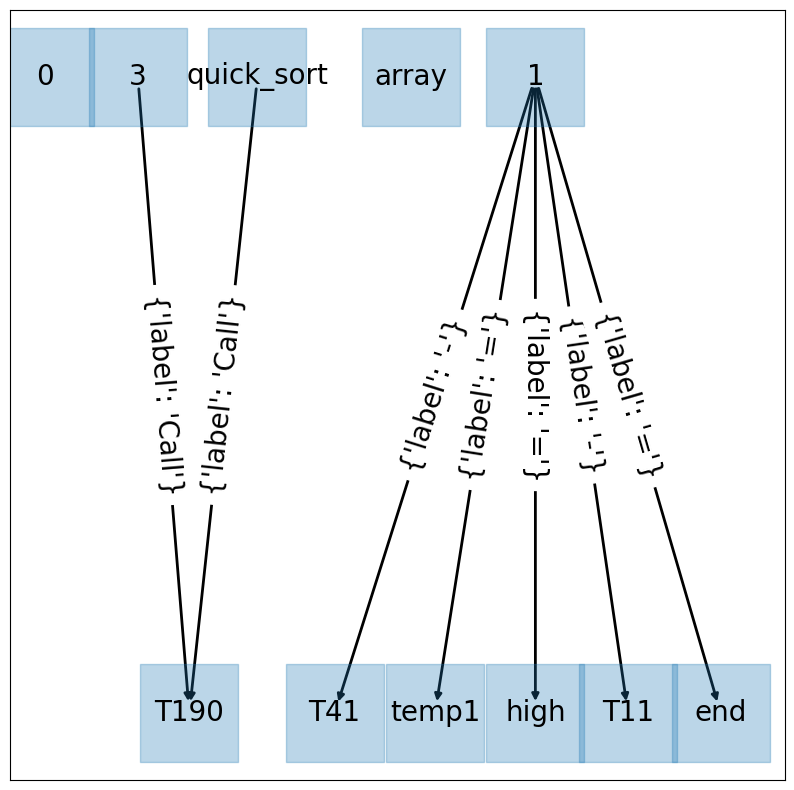

[25: BeginF, quick_sort, None, None,
 26: =, low, None, T45,
 27: =, high, None, T46,
 28: <, T45, T46, T47,
 29: If False, T47, None, L0]
['low', 'quick_sort', 'T45', 'high', 'T46', 'T47', 'L0']


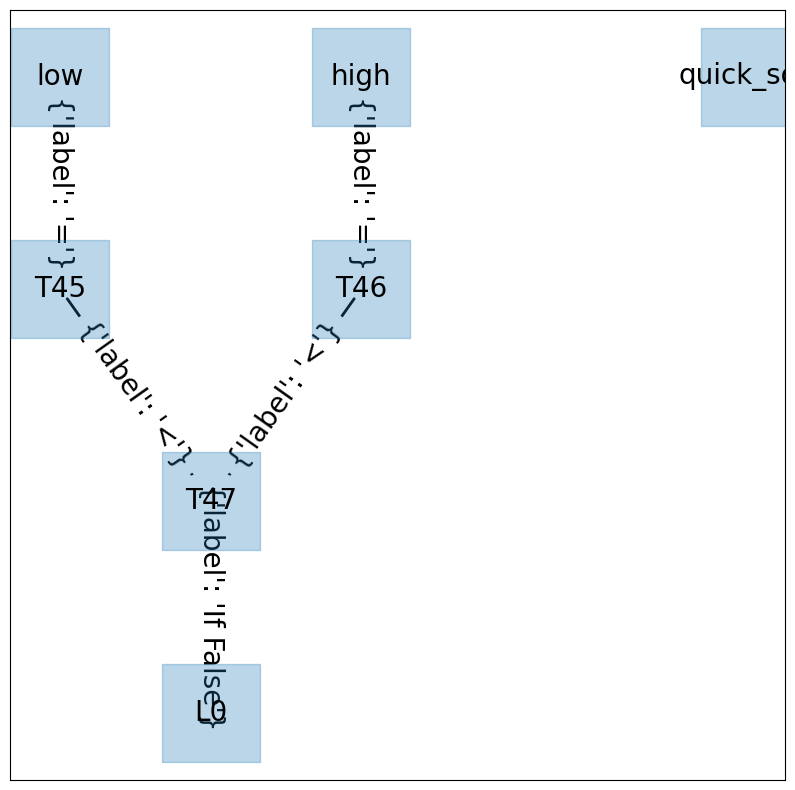

[30: ListIndex, array, low, T50,
 31: =, T50, None, pivot,
 32: =, low, None, T53,
 34: +, T53, 1, T55,
 35: =, T55, None, start,
 36: =, high, None, T58,
 37: =, T58, None, end,
 38: =, True, None, T61]
['low', 'T53', 'T58', 'T50', 'array', 'True', 'T61', 'high', 'end', '1', 'start', 'pivot', 'T55']


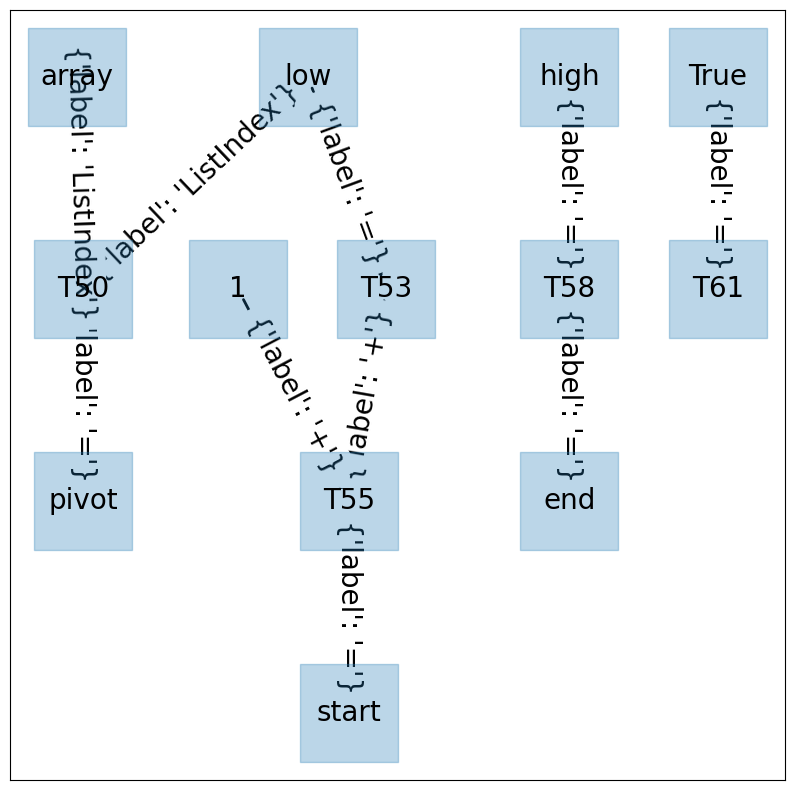

[39: Label, None, None, L1, 40: If False, T61, None, L2]
['L1', 'L2', 'T61']


/tmp/ipykernel_77639/645073614.py:38: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, width=2)


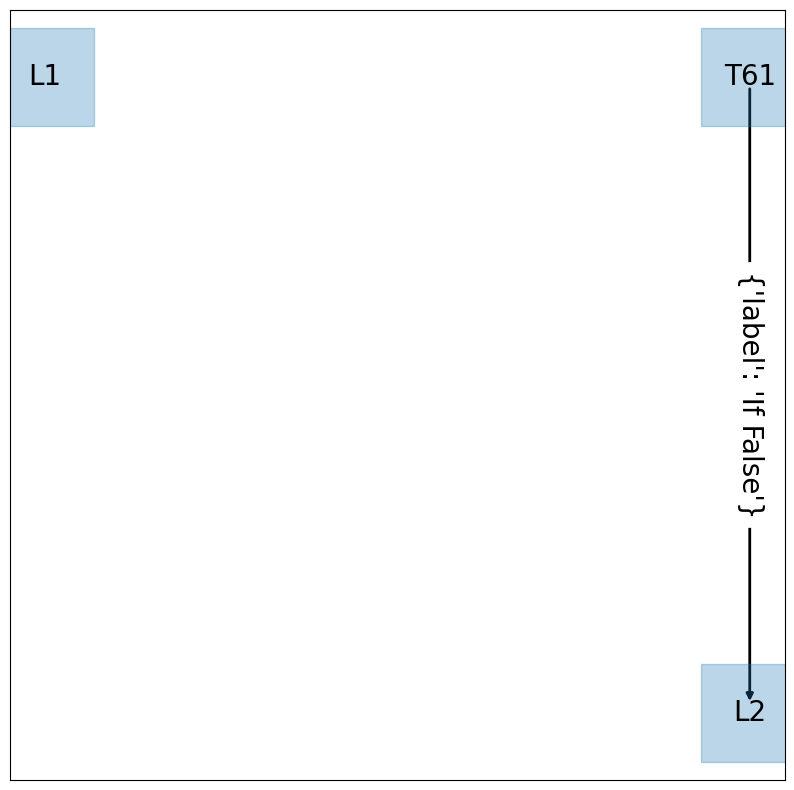

[41: =, start, None, T62,
 42: =, end, None, T63,
 43: <=, T62, T63, T64,
 44: ListIndex, array, end, T67,
 45: =, pivot, None, T68,
 46: >=, T67, T68, T69,
 47: and, T64, T69, T70]
['T64', 'T63', 'T69', 'T67', 'array', 'T62', 'T70', 'start', 'T68', 'pivot', 'end']


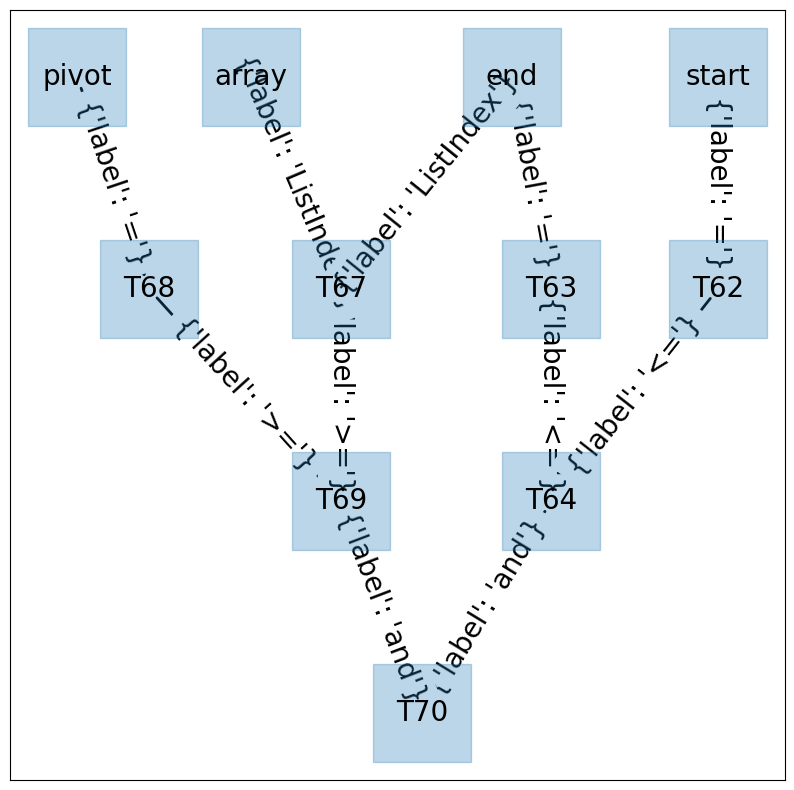

[48: Label, None, None, L3, 49: If False, T70, None, L4]
['L4', 'T70', 'L3']


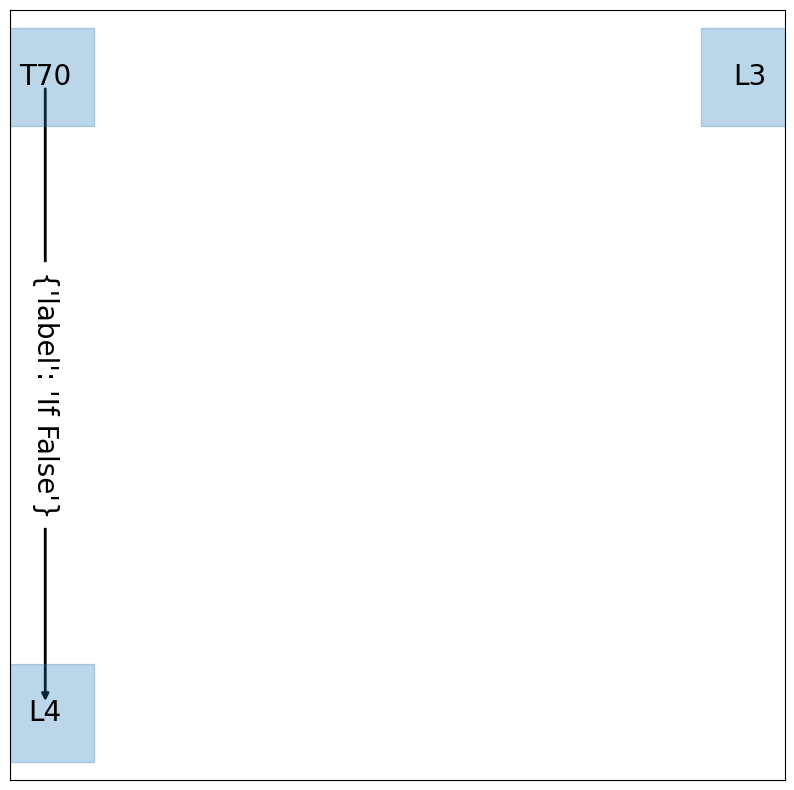

[50: =, end, None, T71,
 52: -, T71, 1, T73,
 53: =, T73, None, end,
 54: =, start, None, T76,
 55: =, end, None, T77,
 56: <=, T76, T77, T78,
 57: ListIndex, array, start, T81,
 58: =, pivot, None, T82,
 59: <=, T81, T82, T83,
 60: and, T78, T83, T84]
['T81', 'T73', 'T83', 'array', 'T84', 'T71', 'T76', '1', 'T77', 'T78', 'start', 'T82', 'pivot', 'end']


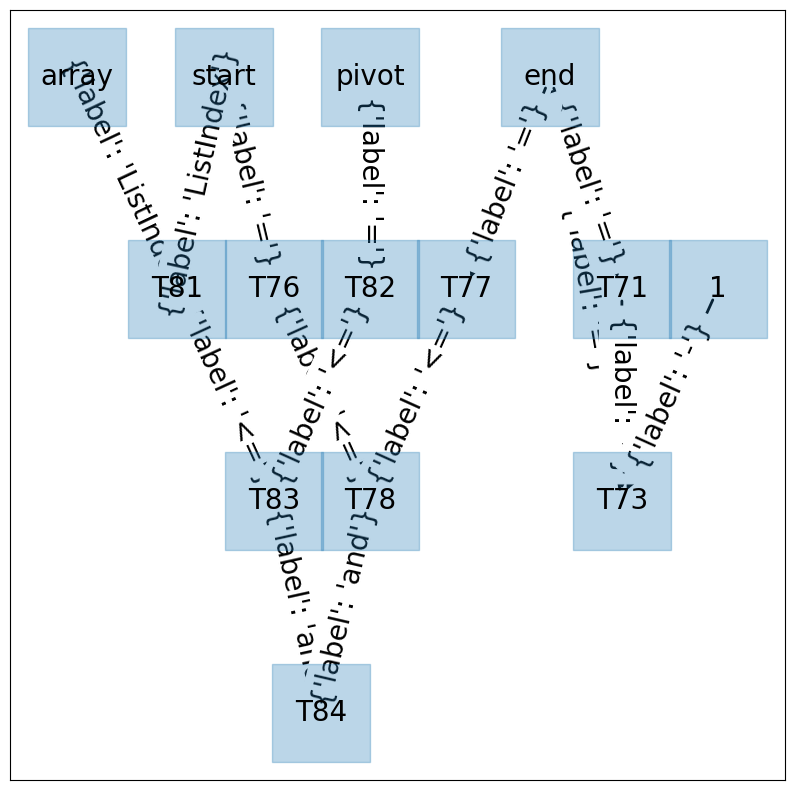

[61: Label, None, None, L5, 62: If False, T84, None, L6]
['T84', 'L5', 'L6']


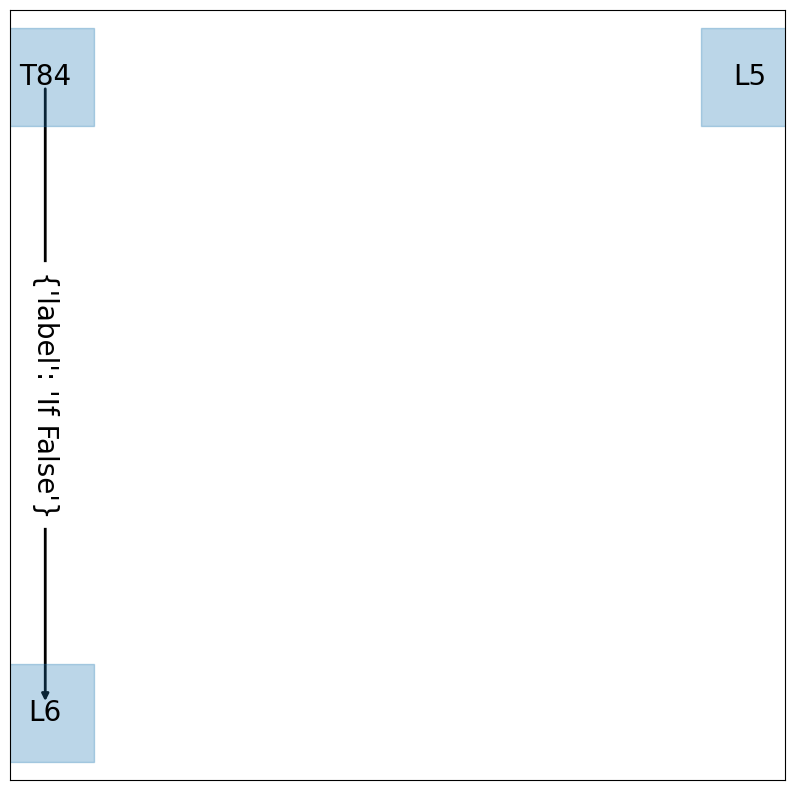

[63: =, start, None, T85,
 65: +, T85, 1, T87,
 66: =, T87, None, start,
 67: =, start, None, T90,
 68: =, end, None, T91,
 69: <=, T90, T91, T92,
 70: If False, T92, None, L7]
['L7', 'T91', 'T92', 'T85', '1', 'start', 'T87', 'end', 'T90']


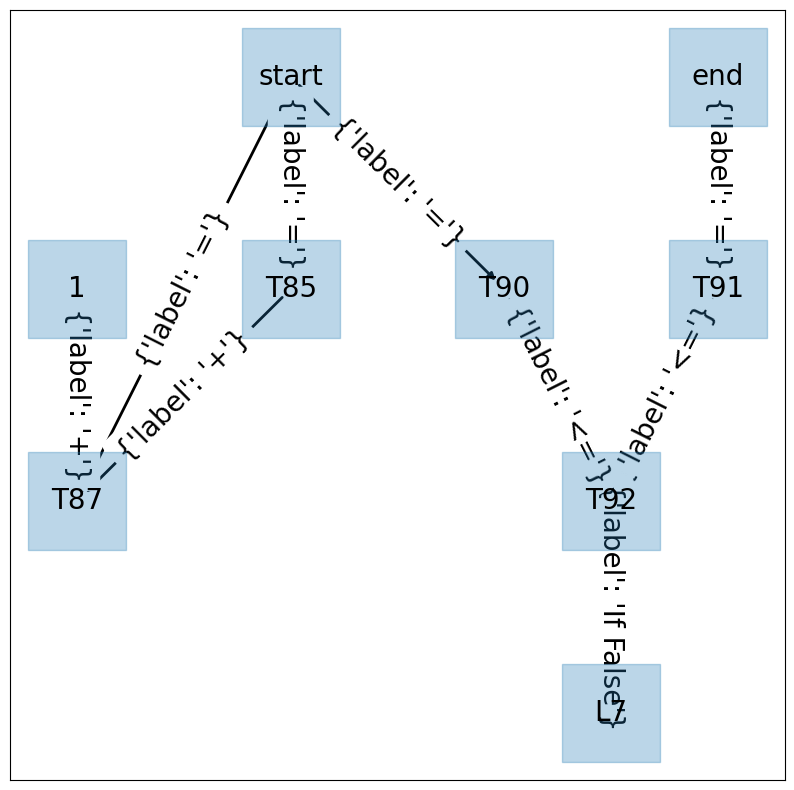

[71: ListIndex, array, start, T95,
 72: =, T95, None, temp,
 73: ListIndex, array, end, T100,
 74: =, T100, None, temp1,
 75: ListAssign, start, temp1, array,
 76: ListAssign, end, temp, array,
 77: goto, None, None, L8]
['T95', 'array', 'temp1', 'L8', 'T100', 'start', 'temp', 'end']


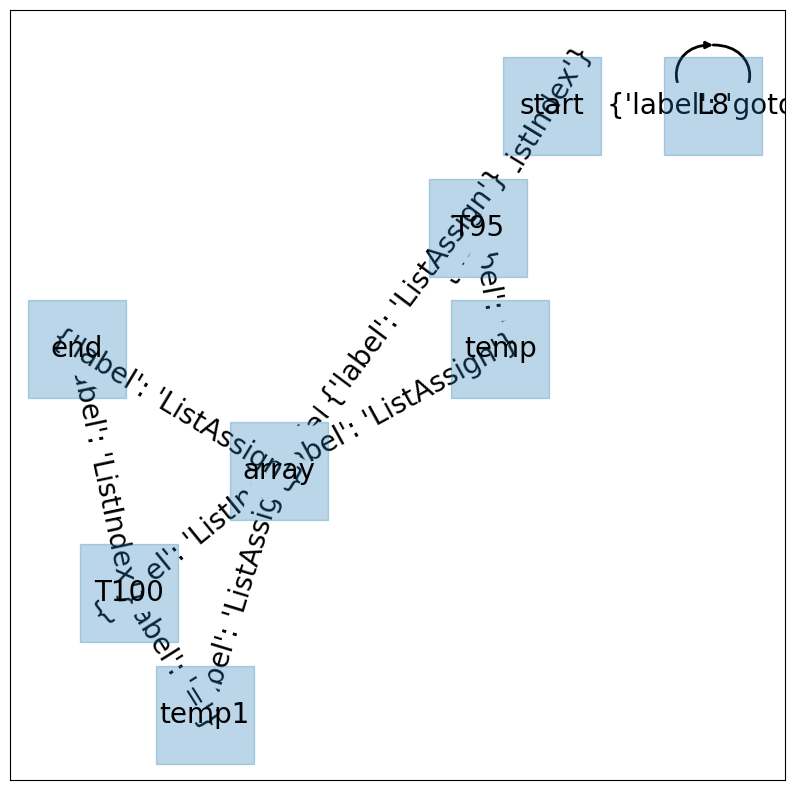

[78: Label, None, None, L7, 79: goto, None, None, L7]
['L7']


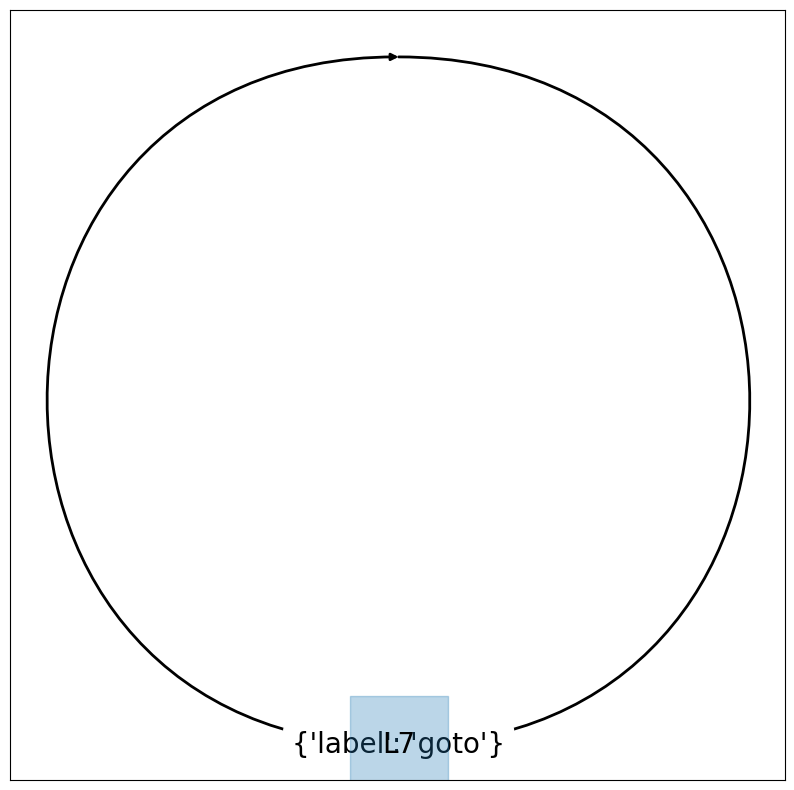

[80: ListIndex, array, low, T119, 81: =, T119, None, temp]
['low', 'T119', 'array', 'temp']


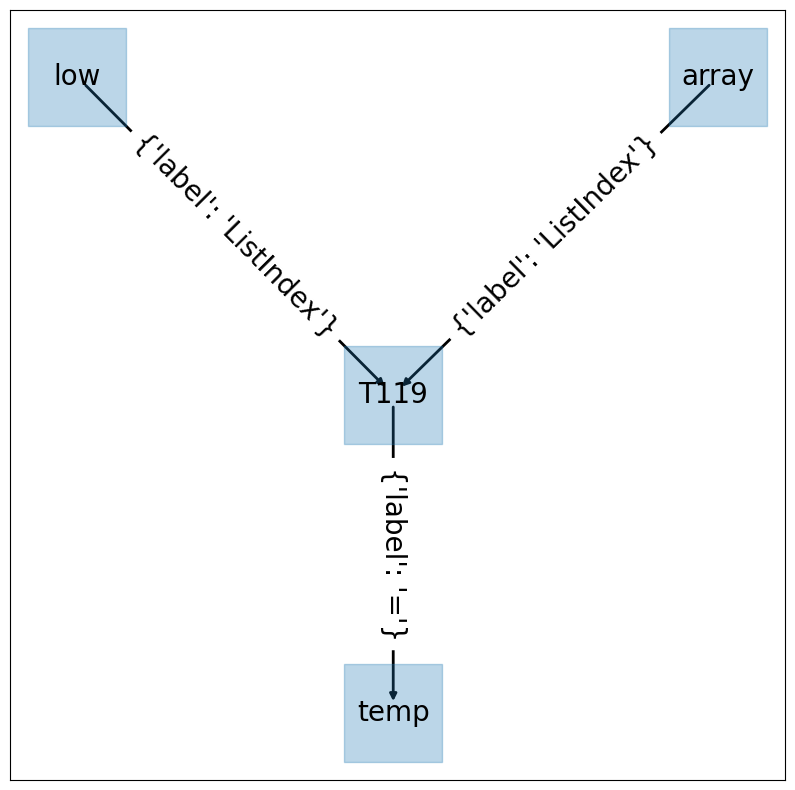

[82: Label, None, None, L8, 83: goto, None, None, L5]
['L8', 'L5']


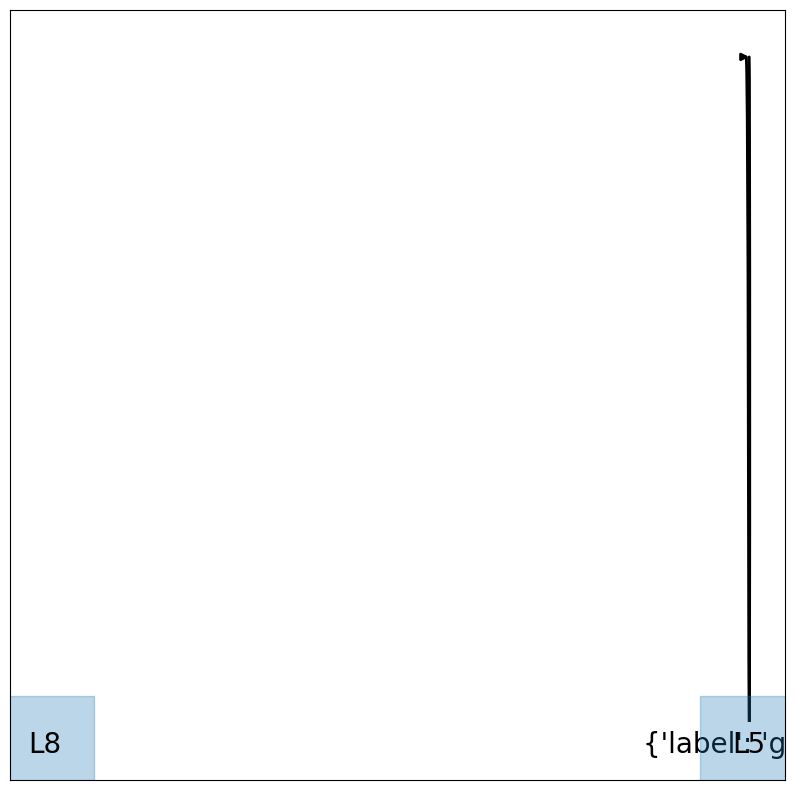

[84: Label, None, None, L6, 85: goto, None, None, L3]
['L3', 'L6']


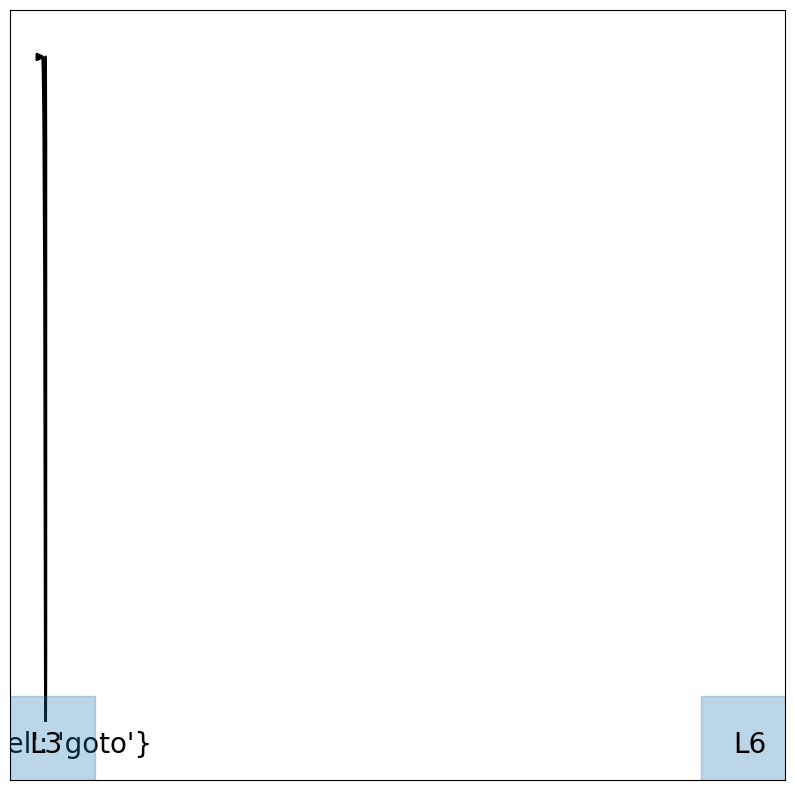

[86: Label, None, None, L4,
 87: ListIndex, array, end, T134,
 88: =, T134, None, temp1,
 89: ListAssign, low, temp1, array,
 90: ListAssign, end, temp, array,
 -1: =, end, None, T145,
 -1: -, T145, 1, T147,
 -1: =, T147, None, idx,
 95: Param, array, None, None,
 96: Param, array, None, None,
 97: Param, start, None, None,
 98: Call, quick_sort, 3, T154,
 -1: +, T155, 1, T157,
 -1: =, T157, None, idx,
 103: Param, array, None, None,
 104: Param, array, None, None,
 105: Param, idx, None, None,
 106: Call, quick_sort, 3, T164,
 107: return, None, None, None,
 108: goto, None, None, L1]
['L4', 'idx', 'low', 'quick_sort', 'T164', 'temp', 'array', 'temp1', 'T134', '1', '3', 'T157', 'T154', 'start', 'T155', 'T145', 'L1', 'T147', 'end']


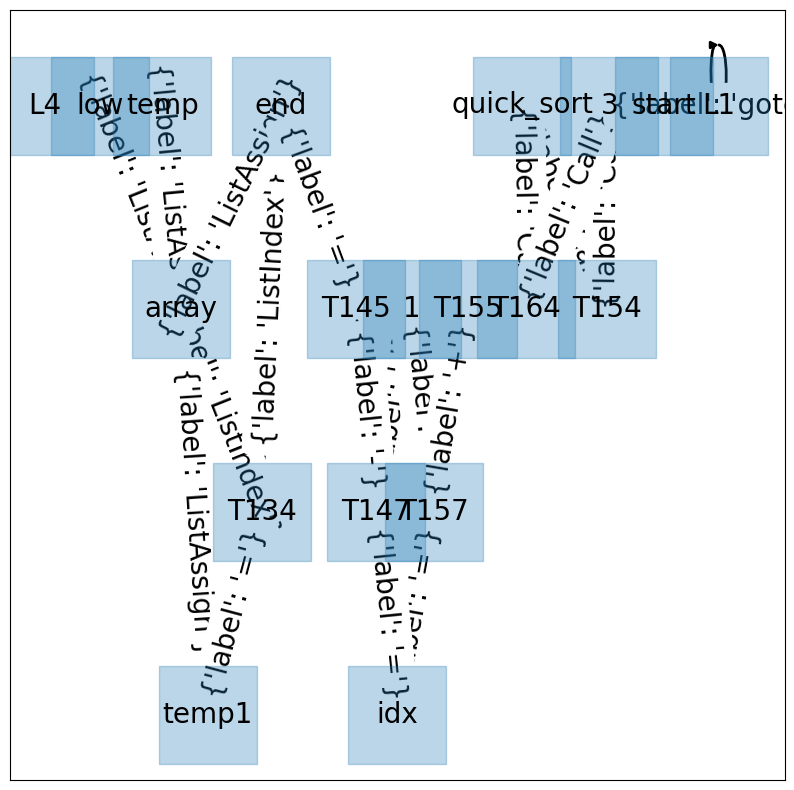

[109: Label, None, None, L2]
['L2']


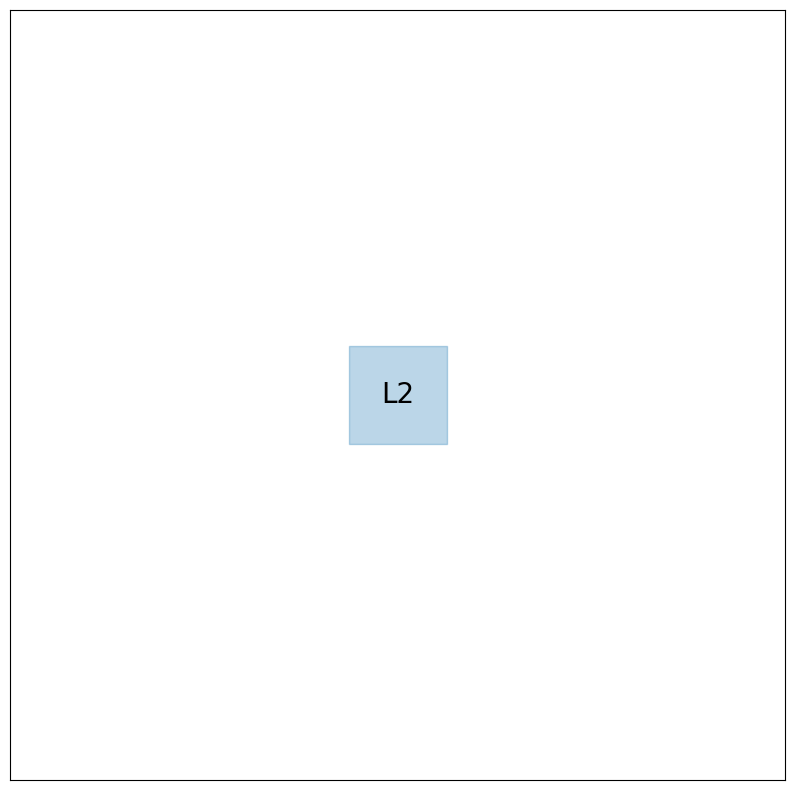

In [48]:
plt.rcParams["figure.figsize"] = (10,10)
for i in tot_icg:
	pprint(i)
	plot_DAG(i)

In [49]:
icg_tolist = []
for i in tot_icg:
	temp = []
	for j in i:
		temp.append([j.op, j.op1, j.op2, j.result])
		for _i in range(len(temp[-1])):
			if temp[-1][_i] == None:
				temp[-1][_i] = '-'
	icg_tolist.append(temp)
blocks = icg_tolist

blocks

[[['-', '1', '-', 'T11'],
  ['=', '1', '-', 'high'],
  ['=', '1', '-', 'temp1'],
  ['-', '1', '-', 'T41'],
  ['=', '1', '-', 'end'],
  ['Param', 'array', '-', '-'],
  ['Param', 'array', '-', '-'],
  ['Param', '0', '-', '-'],
  ['Call', 'quick_sort', '3', 'T190']],
 [['BeginF', 'quick_sort', '-', '-'],
  ['=', 'low', '-', 'T45'],
  ['=', 'high', '-', 'T46'],
  ['<', 'T45', 'T46', 'T47'],
  ['If False', 'T47', '-', 'L0']],
 [['ListIndex', 'array', 'low', 'T50'],
  ['=', 'T50', '-', 'pivot'],
  ['=', 'low', '-', 'T53'],
  ['+', 'T53', '1', 'T55'],
  ['=', 'T55', '-', 'start'],
  ['=', 'high', '-', 'T58'],
  ['=', 'T58', '-', 'end'],
  ['=', 'True', '-', 'T61']],
 [['Label', '-', '-', 'L1'], ['If False', 'T61', '-', 'L2']],
 [['=', 'start', '-', 'T62'],
  ['=', 'end', '-', 'T63'],
  ['<=', 'T62', 'T63', 'T64'],
  ['ListIndex', 'array', 'end', 'T67'],
  ['=', 'pivot', '-', 'T68'],
  ['>=', 'T67', 'T68', 'T69'],
  ['and', 'T64', 'T69', 'T70']],
 [['Label', '-', '-', 'L3'], ['If False', 'T70'

In [51]:
icg_tolist

[[['-', '1', '-', 'T11'],
  ['=', '1', '-', 'high'],
  ['=', '1', '-', 'temp1'],
  ['-', '1', '-', 'T41'],
  ['=', '1', '-', 'end'],
  ['Param', 'array', '-', '-'],
  ['Param', 'array', '-', '-'],
  ['Param', '0', '-', '-'],
  ['Call', 'quick_sort', '3', 'T190']],
 [['BeginF', 'quick_sort', '-', '-'],
  ['=', 'low', '-', 'T45'],
  ['=', 'high', '-', 'T46'],
  ['<', 'T45', 'T46', 'T47'],
  ['If False', 'T47', '-', 'L0']],
 [['ListIndex', 'array', 'low', 'T50'],
  ['=', 'T50', '-', 'pivot'],
  ['=', 'low', '-', 'T53'],
  ['+', 'T53', '1', 'T55'],
  ['=', 'T55', '-', 'start'],
  ['=', 'high', '-', 'T58'],
  ['=', 'T58', '-', 'end'],
  ['=', 'True', '-', 'T61']],
 [['Label', '-', '-', 'L1'], ['If False', 'T61', '-', 'L2']],
 [['=', 'start', '-', 'T62'],
  ['=', 'end', '-', 'T63'],
  ['<=', 'T62', 'T63', 'T64'],
  ['ListIndex', 'array', 'end', 'T67'],
  ['=', 'pivot', '-', 'T68'],
  ['>=', 'T67', 'T68', 'T69'],
  ['and', 'T64', 'T69', 'T70']],
 [['Label', '-', '-', 'L3'], ['If False', 'T70'

In [54]:
print("--------------------------------All Quads---------------------------------")
for i in icg_tolist:
	for j in i:
		print('\t'.join(j))

--------------------------------All Quads---------------------------------
-	1	-	T11
=	1	-	high
=	1	-	temp1
-	1	-	T41
=	1	-	end
Param	array	-	-
Param	array	-	-
Param	0	-	-
Call	quick_sort	3	T190
BeginF	quick_sort	-	-
=	low	-	T45
=	high	-	T46
<	T45	T46	T47
If False	T47	-	L0
ListIndex	array	low	T50
=	T50	-	pivot
=	low	-	T53
+	T53	1	T55
=	T55	-	start
=	high	-	T58
=	T58	-	end
=	True	-	T61
Label	-	-	L1
If False	T61	-	L2
=	start	-	T62
=	end	-	T63
<=	T62	T63	T64
ListIndex	array	end	T67
=	pivot	-	T68
>=	T67	T68	T69
and	T64	T69	T70
Label	-	-	L3
If False	T70	-	L4
=	end	-	T71
-	T71	1	T73
=	T73	-	end
=	start	-	T76
=	end	-	T77
<=	T76	T77	T78
ListIndex	array	start	T81
=	pivot	-	T82
<=	T81	T82	T83
and	T78	T83	T84
Label	-	-	L5
If False	T84	-	L6
=	start	-	T85
+	T85	1	T87
=	T87	-	start
=	start	-	T90
=	end	-	T91
<=	T90	T91	T92
If False	T92	-	L7
ListIndex	array	start	T95
=	T95	-	temp
ListIndex	array	end	T100
=	T100	-	temp1
ListAssign	start	temp1	array
ListAssign	end	temp	array
goto	-	-	L8
Label	-	-	L7
got

In [53]:
i

[['-', '1', '-', 'T11'],
 ['=', '1', '-', 'high'],
 ['=', '1', '-', 'temp1'],
 ['-', '1', '-', 'T41'],
 ['=', '1', '-', 'end'],
 ['Param', 'array', '-', '-'],
 ['Param', 'array', '-', '-'],
 ['Param', '0', '-', '-'],
 ['Call', 'quick_sort', '3', 'T190']]

('Block 0:\n'
 "['-', '1', '-', 'T11']\n"
 "['=', '1', '-', 'high']\n"
 "['=', '1', '-', 'temp1']\n"
 "['-', '1', '-', 'T41']\n"
 "['=', '1', '-', 'end']\n"
 "['Param', 'array', '-', '-']\n"
 "['Param', 'array', '-', '-']\n"
 "['Param', '0', '-', '-']\n"
 "['Call', 'quick_sort', '3', 'T190']")
('Block 1:\n'
 "['BeginF', 'quick_sort', '-', '-']\n"
 "['=', 'low', '-', 'T45']\n"
 "['=', 'high', '-', 'T46']\n"
 "['<', 'T45', 'T46', 'T47']\n"
 "['If False', 'T47', '-', 'L0']")
('Block 2:\n'
 "['ListIndex', 'array', 'low', 'T50']\n"
 "['=', 'T50', '-', 'pivot']\n"
 "['=', 'low', '-', 'T53']\n"
 "['+', 'T53', '1', 'T55']\n"
 "['=', 'T55', '-', 'start']\n"
 "['=', 'high', '-', 'T58']\n"
 "['=', 'T58', '-', 'end']\n"
 "['=', 'True', '-', 'T61']")
"Block 3:\n['Label', '-', '-', 'L1']\n['If False', 'T61', '-', 'L2']"
('Block 4:\n'
 "['=', 'start', '-', 'T62']\n"
 "['=', 'end', '-', 'T63']\n"
 "['<=', 'T62', 'T63', 'T64']\n"
 "['ListIndex', 'array', 'end', 'T67']\n"
 "['=', 'pivot', '-', 'T68']\n"

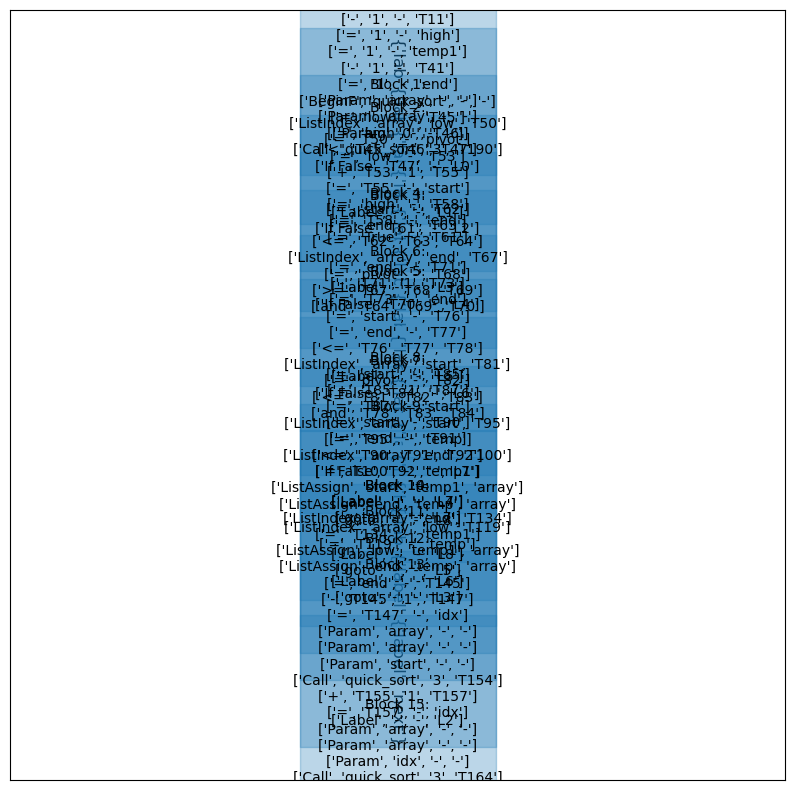

In [50]:
from pyvis.network import Network
plt.rcParams["figure.figsize"] = (10,10)
import networkx as nx

connections = []
edge = []
edge_labels = []
G = nx.DiGraph()
block_names = []
for idx, i in enumerate(blocks):
    block_names.append(f"Block {idx}:\n"+'\n'.join([str(j) for j in i]))
    # block_names.append(f"Block {idx}")
    G.add_node(block_names[-1])
    
for idx, (b_name, code_) in enumerate(zip(block_names, blocks)):
    if 'goto' in  code_[-1][1]:
        l = code_[-1][-1]
        G.add_edge(block_names[idx], block_names[labels[l]], label="goto")
        edge.append((block_names[idx], block_names[labels[l]]))
        edge_labels.append("goto")
        continue
    
    if 'If False' in code_[-1][1]:
        l = code_[-1][-1]
        G.add_edge(block_names[idx], block_names[labels[l]], label="If False")
        edge.append((block_names[idx], block_names[labels[l]]))
        edge_labels.append("If False")
        
    
    if idx+1<len(block_names):
        G.add_edge(block_names[idx], block_names[idx+1], label="next")
        edge.append((block_names[idx], block_names[idx+1]))
        edge_labels.append("next")




for i, j in zip(block_names, blocks):
    pprint(i)
    print("==============")
    
    
        
# nx.draw_networkx(G, with_labels=True,  node_shape="s",  node_color="none", bbox=dict(facecolor="skyblue", edgecolor='black', boxstyle='round'), font_size=10, alpha=1, width=2.)
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
nx.draw_networkx_nodes(G, pos, node_size=20000, alpha=0.3,  node_shape="s")
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_edge_labels(G, pos, font_size=12)

# nx.draw_networkx(G, with_labels=True,  node_shape="s",  node_color="none", bbox=dict(facecolor="skyblue", edgecolor='black', boxstyle='round'), font_size=10, alpha=1, width=2.)
plt.show()